# Bayesian Data Analysis in Python

Bayesian data analysis is an increasingly popular method of statistical inference, used to determine ***conditional probability*** without having to rely on fixed constants such as confidence levels or p-values. 

In this course, we will learn how Bayesian data analysis works, how it differs from the classical approach, and why it’s an indispensable part of any data science toolbox. 

We will get to grips with:

- A/B testing
- decision analysis
- linear regression modeling 

using a Bayesian approach as we analyze real-world advertising, sales, and bike rental data. 

Finally, we'll get hands-on with the **PyMC3** library, which will make it easier to design, fit, and interpret Bayesian models.

## 1. The Bayesian way 

In this section we will introduce the basic concepts of probability and statistical distributions, as well as the famous ***Bayes' Theorem***, the cornerstone of Bayesian methods. Finally, we’ll build a Bayesian model to draw conclusions from randomized coin tosses.

### 1.1 Who is Bayes? What is Bayes?

Bayesian inference means updating one's belief about something as the new information becomes available. This Bayesian approach to statistical inference is quite different from the more common frequentist or classical approach in two major ways :

`Probability`

> **Frequentists**: *probability* is the ***proportion of outcomes***. In 6000 dice rolls, approximately 1000 rolls would come up 6. That's why the probability of rolling a 6 is 1/6.

> **Bayesian**: probability means a ***degree of belief***. A valid Bayesian statement of probability might be ***"I am 90% sure this model's parameter should be larger than 1"***.


`Parameters`

> **Frequentists**: *parameters* are simply ***fixed values**

> **Bayesian**: *parameters* are ***random variables***

This means they can be described by probability distributions and can take many different values with different probabilities. These two differences are what makes the Bayesian approach so appealing!

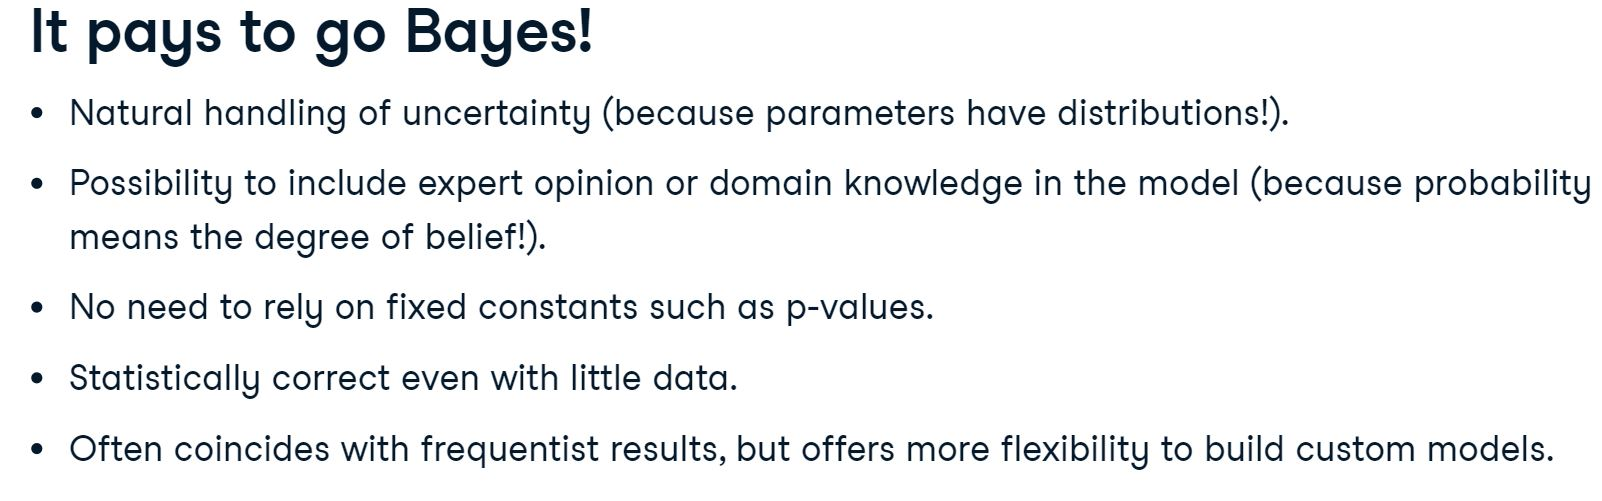

`Probability distributions`

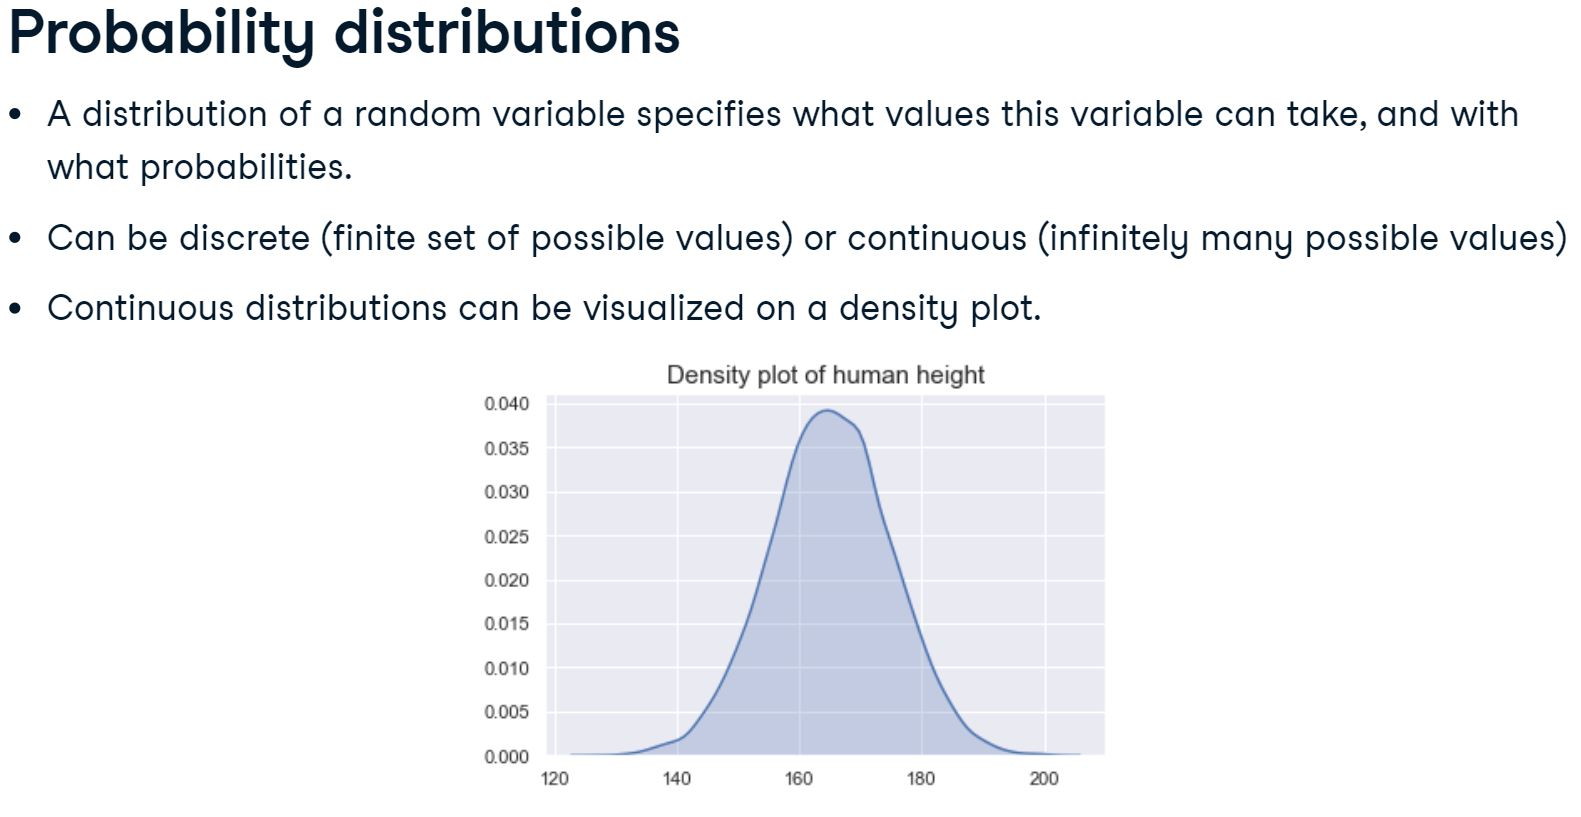

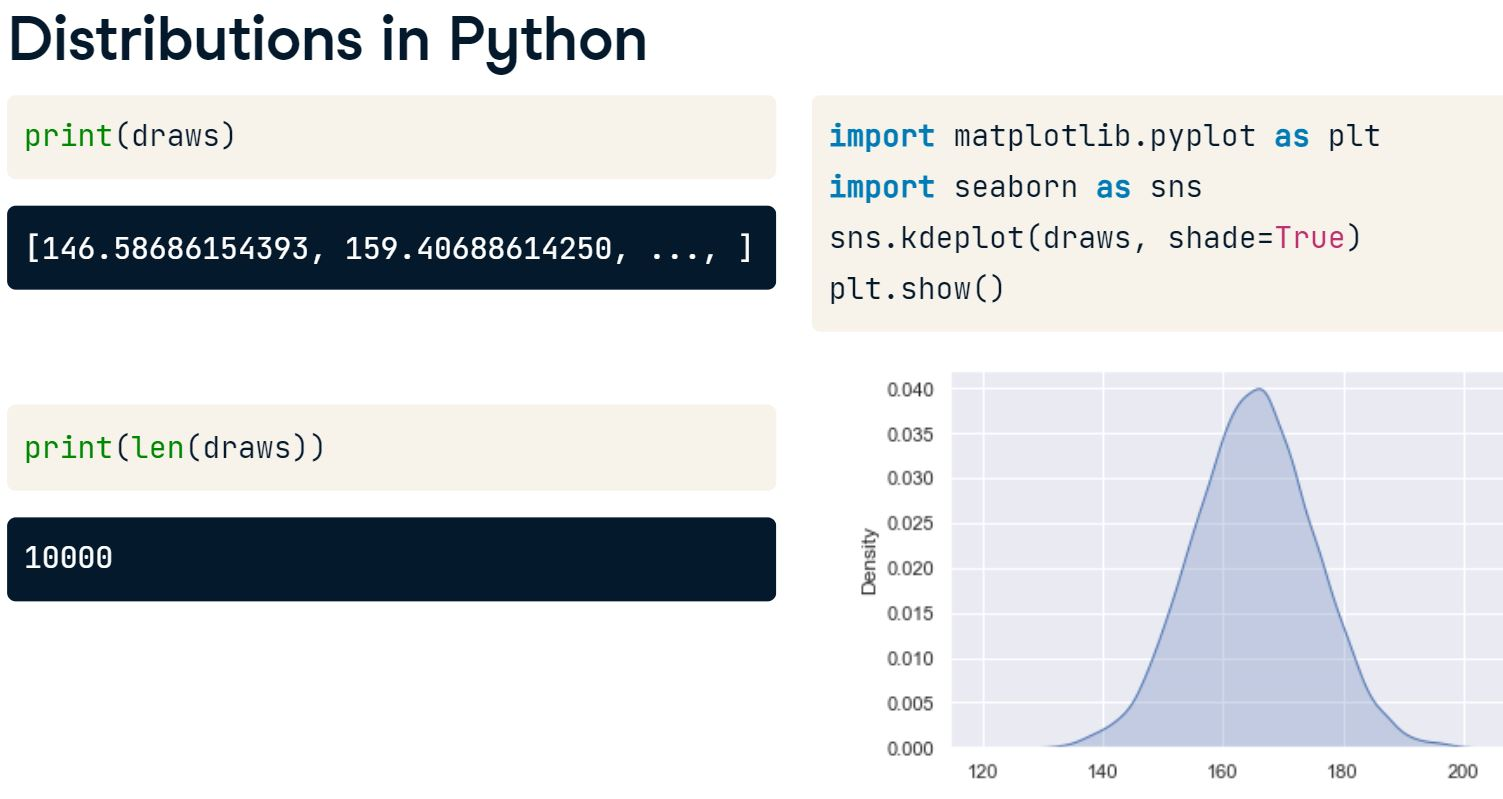

#### 1.1.1 Probability distributions

In [1]:
import pandas as pd

/tmp/ipykernel_9637/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
draws = pd.read_csv('data/draws.csv')
draws

values
0     4.896530
1     2.777368
2    10.090751
3     2.248355
4     4.974454
..         ...
995   1.272942
996   7.520498
997  13.307060
998   0.789700
999  10.674864

[1000 rows x 1 columns]

In [3]:
# Print the list of draws
print(len(draws))

1000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

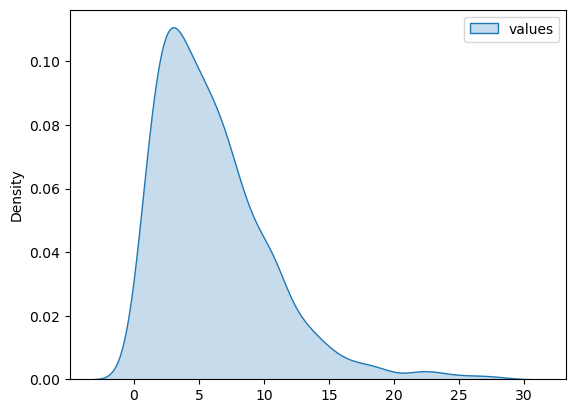

In [6]:
# Plot the density of draws
sns.kdeplot(draws, fill=True)
plt.show()

- It is quite likely for a plant to be 4 centimeters in height
- 15 centimeters plants are less probable than the ones around 10 centimeters
- It is very likely for a plant's height to be between 0 and 20 centimeters, but it is possible that a much larger value will occur

### 1.2 Probability and Bayes' Theorem

Whether we are talking about the frequentist or Bayesian interpretation, probability is always a statement about uncertainty.

`Independent Events = sum and product rules`

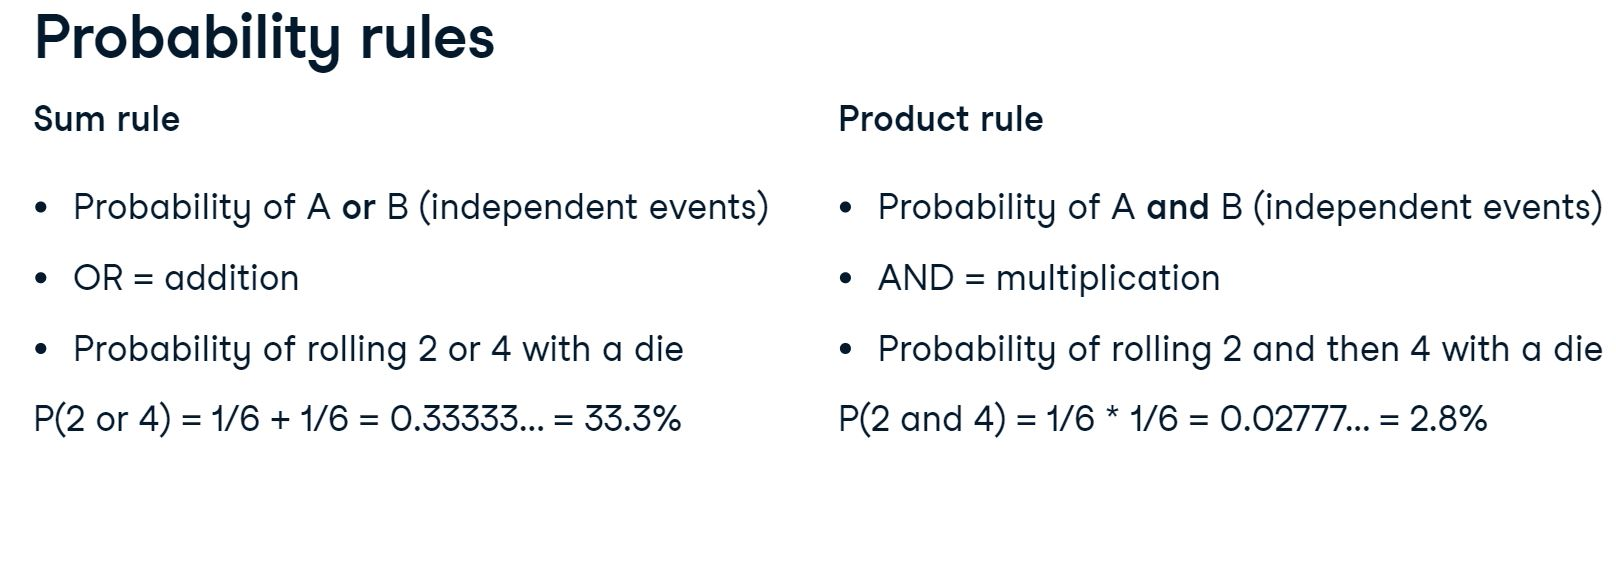

`Conditional Probability`

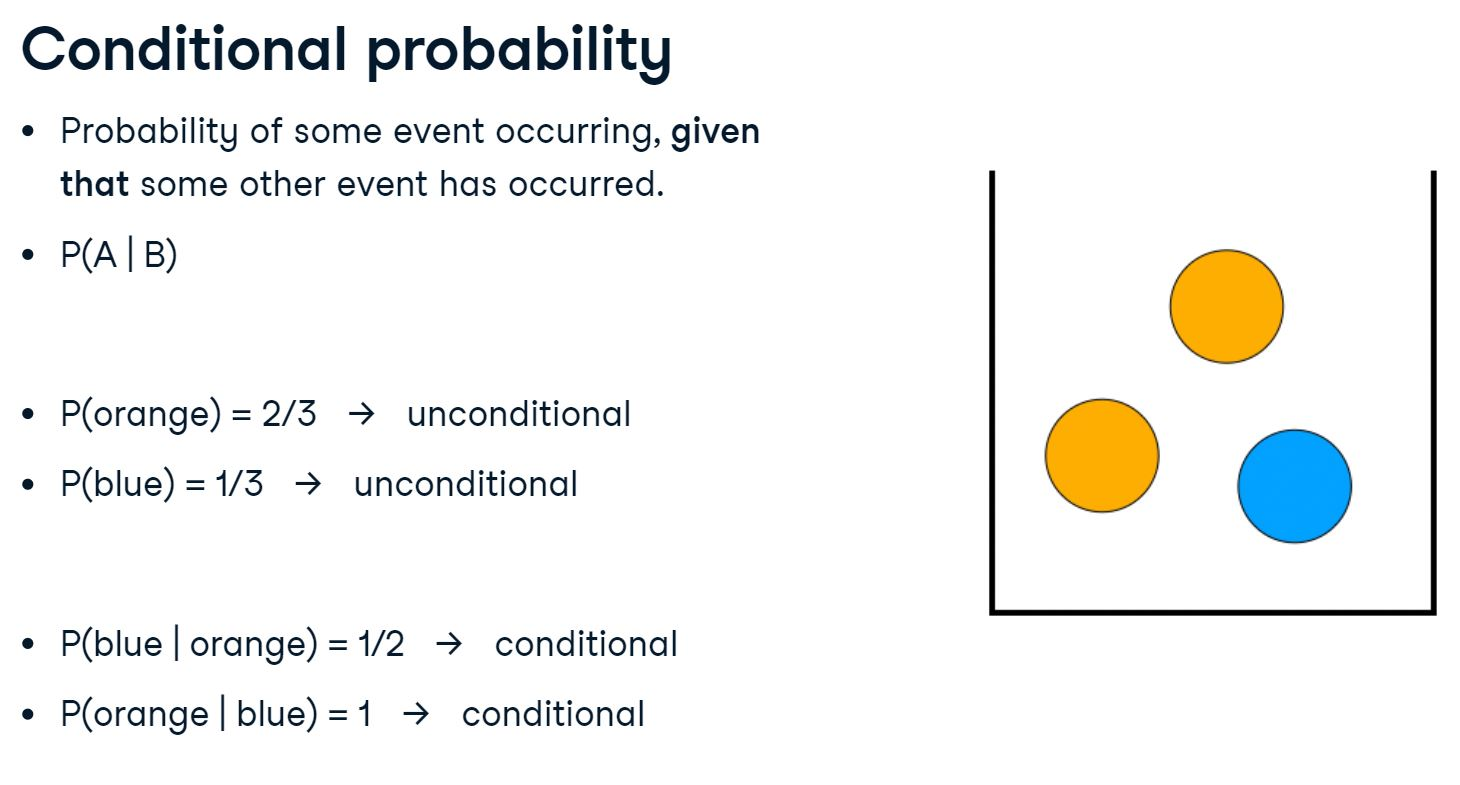


`Bayes Theorem`

We would like to know what's the chance of an accident if it's slippery?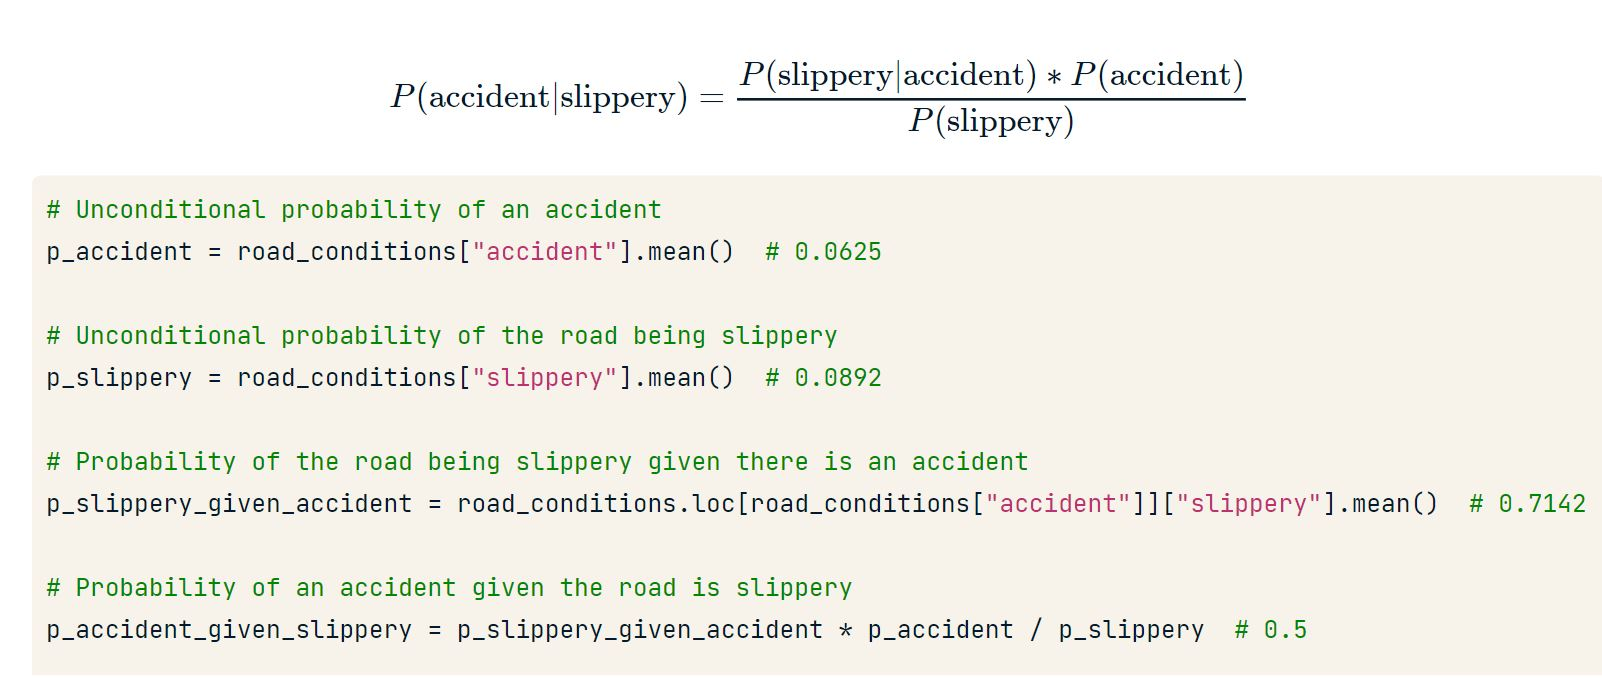

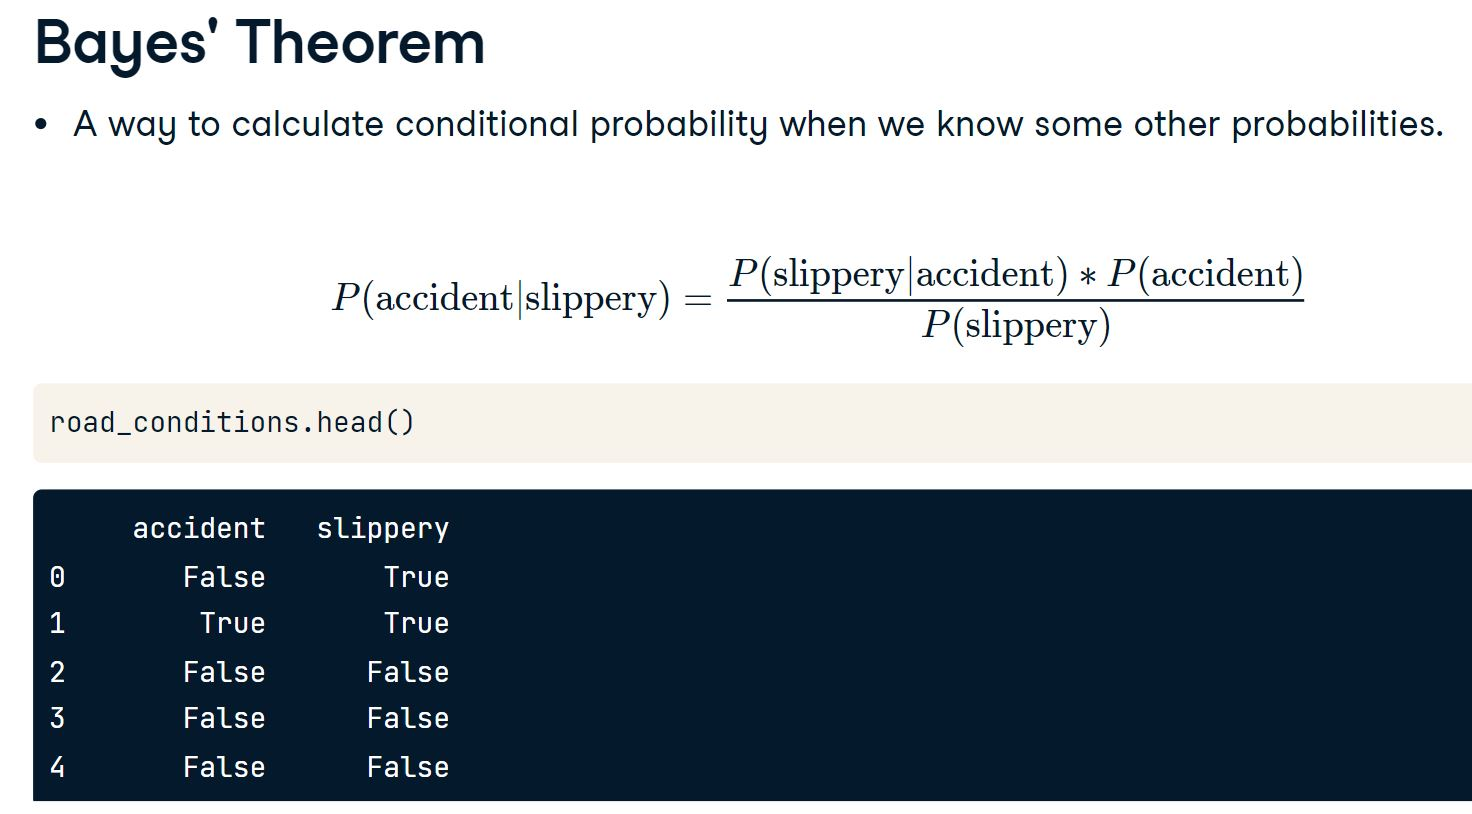

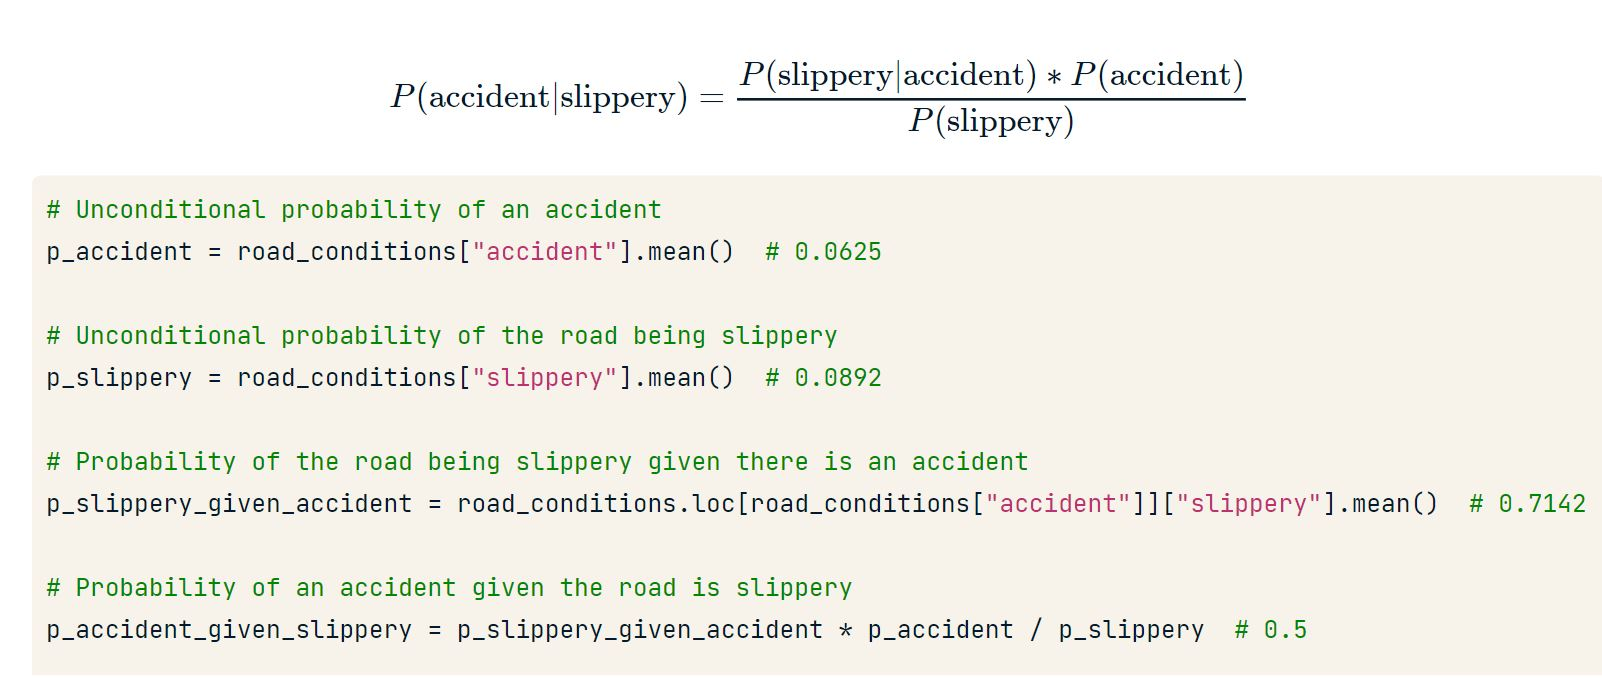

#### 1.2.1 Let's play cards

You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability calculate the probabilities of drawing the combinations of cards, as described below:

In [7]:
# Calculate probability of drawing a king or queen
p_king_or_queen = (4/52 + 4/52)
print(p_king_or_queen)

0.15384615384615385


In [8]:
# Calculate probability of drawing <= 5
p_five_or_less = (4 * 4) / 52
print(p_five_or_less)

0.3076923076923077


In [9]:
# Calculate probability of drawing four aces in a row
p_all_four_aces = (4/52) * (3/51) * (2/50) * (1/49)
print(p_all_four_aces)

3.6937852063902484e-06


The chance of drawing four aces straight is 0.00037%, so don't hope for it too much.

#### 1.2.2 Bayesian spam filter

Let's now tackle the famous Bayes' Theorem and use it for a simple but important task: `spam detection`.

While browsing your inbox, you have figured out that quite a few of the emails you would rather not waste your time on reading contain exclamatory statements, such as "BUY NOW!!!". You start thinking that the presence of three exclamation marks next to each other might be a good spam predictor! 

In [10]:
import pandas as pd

In [11]:
emails = pd.read_csv('data/emails.csv')
emails

spam  contains_3_excl
0    False            False
1    False            False
2     True            False
3    False            False
4    False            False
..     ...              ...
200  False            False
201   True             True
202  False            False
203  False            False
204  False            False

[205 rows x 2 columns]

In [12]:
# Calculate and print the unconditional probability of spam
p_spam = emails['spam'].mean()
print(p_spam)

0.24390243902439024


In [13]:
# Calculate and print the unconditional probability of "!!!"
p_3_excl = emails['contains_3_excl'].mean()
print(p_3_excl)

0.17073170731707318


In [14]:
# Calculate and print the probability of "!!!" given spam
p_3_excl_given_spam = emails.loc[emails['spam']]['contains_3_excl'].mean()
print(p_3_excl_given_spam)

0.6


In [15]:
# Calculate and print the probability of spam given "!!!"
p_spam_given_3_excl = (p_3_excl_given_spam * p_spam) / p_3_excl
print(p_spam_given_3_excl)

0.857142857142857


> **If an email contains '!!!', we can be 85% sure it is spam.**

#### 1.2.3 What does the test say?

A doctor suspects a disease in their patient, so they run a medical test. The test's manufacturer claims that 99% of sick patients test positive, while the doctor has observed that the test comes back positive in 2% of all cases. The suspected disease is quite rare: only 1 in 1000 people suffer from it.

The test result came back positive. What is the probability that the patient is indeed sick?

A doctor suspects a disease in their patient, so they run a medical test. The test's manufacturer claims that 99% of sick patients test positive, while the doctor has observed that the test comes back positive in 2% of all cases. The suspected disease is quite rare: only 1 in 1000 people suffer from it. The test result came back positive.

> **Q. What is the probability that the patient is indeed sick?**

In [16]:
# unconditional probability of being sick
prob_sick = 0.001

In [17]:
# unconditional probability of positive test
prob_test_positive = 0.02

In [18]:
# probability of positive test given sick
prob_positive_test_sick = 0.99

In [19]:
# probability of being sick given positive test
prob_sick_positive_test = (prob_positive_test_sick * prob_sick) / prob_test_positive
prob_sick_positive_test

0.049499999999999995

> **A. The probability that the patient is indeed sick is just under 5%**

### 1.3 Tasting the Bayes

Let's now use a Bayesian model to estimate the parameters of a probability distribution!

In [20]:
def get_heads_prob(tosses):
    num_heads = np.sum(tosses)
    return np.random.beta(num_heads + 1, 
                          len(tosses) - num_heads + 1, 
                          1000)

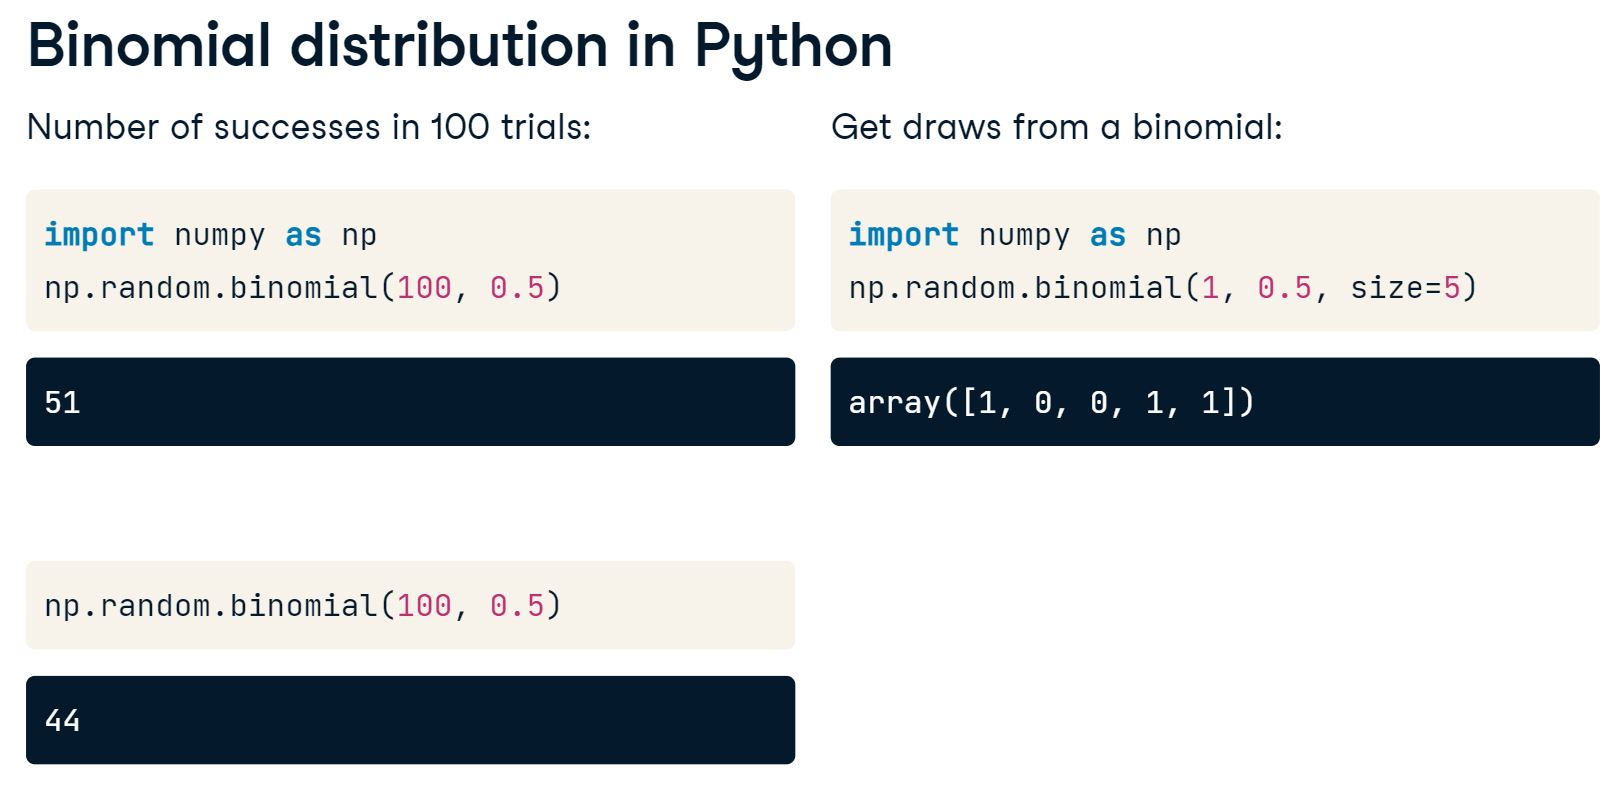

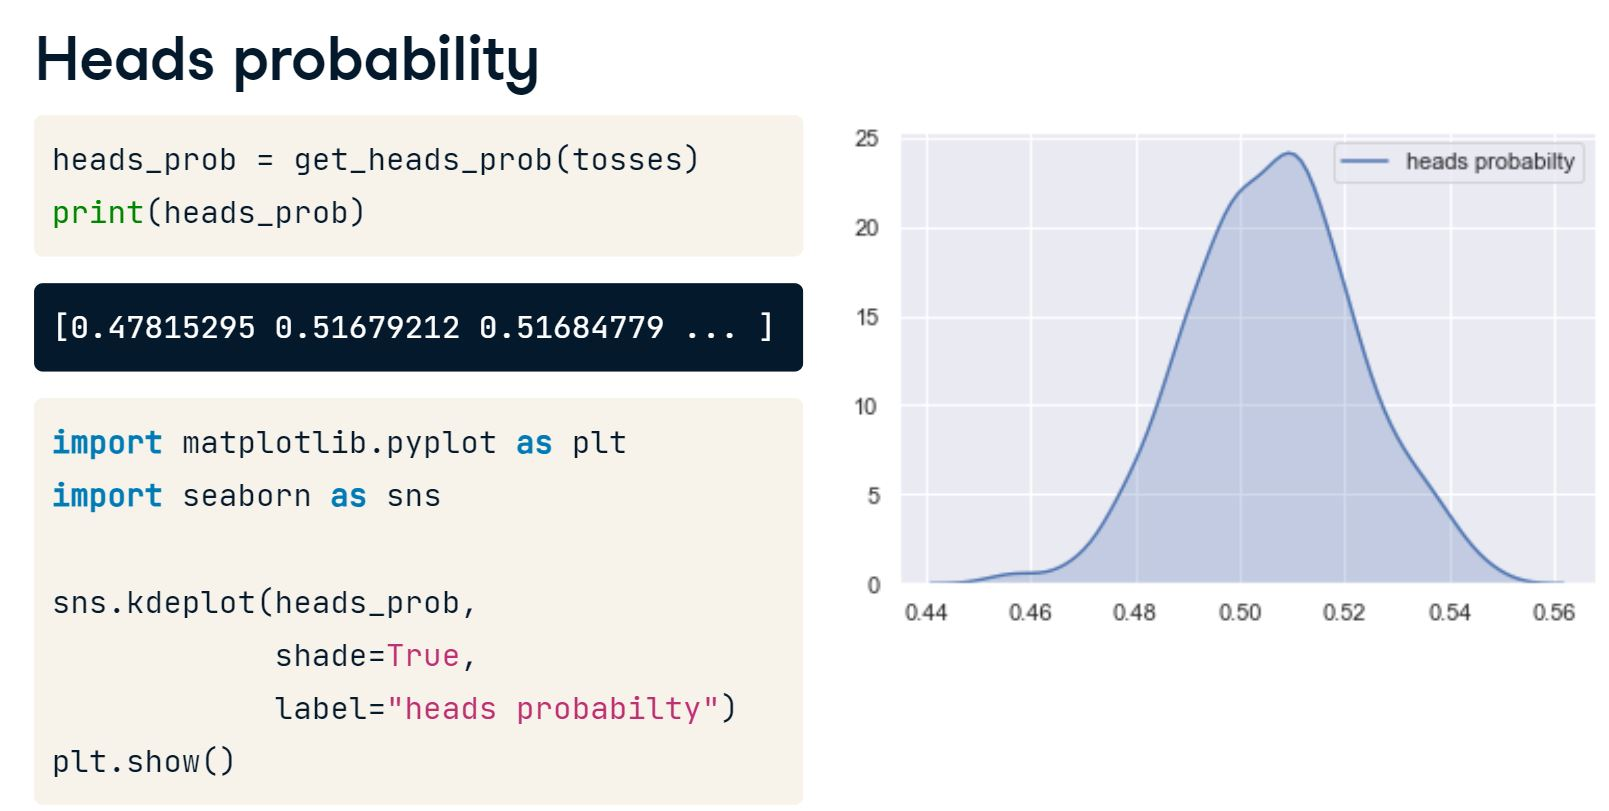

#### 1.3.1 Tossing a coin

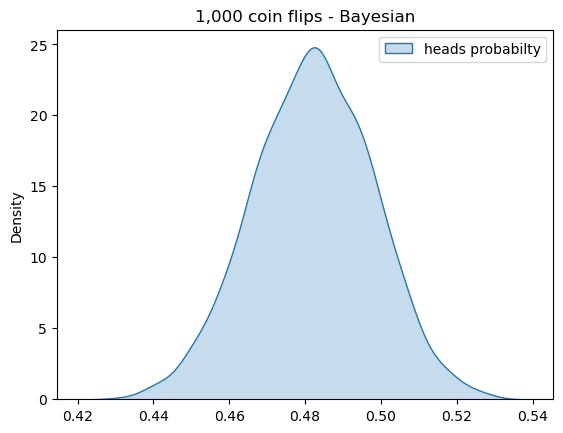

In [21]:
import numpy as np

# Generate 1000 coin tosses
tosses = np.random.binomial(1, 0.5, 1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, fill=True, label="heads probabilty")
plt.legend()
plt.title("1,000 coin flips - Bayesian")
plt.show()

#### 1.3.2 The more you flip, the more you learn

Imagine you are a frequentist (just for a day), and you've been tasked with estimating the probability of tossing heads with a (possibly biased) coin, but without observing any tosses. What would you say? It's impossible, there is no data! Then, you are allowed to flip the coin once. You get tails. What do you say now? Well, if that's all your data, you'd say the heads probability is 0%.

You can probably feel deep inside that these answers are not the best ones. But what would be better? What would a Bayesian say? Let's find out!

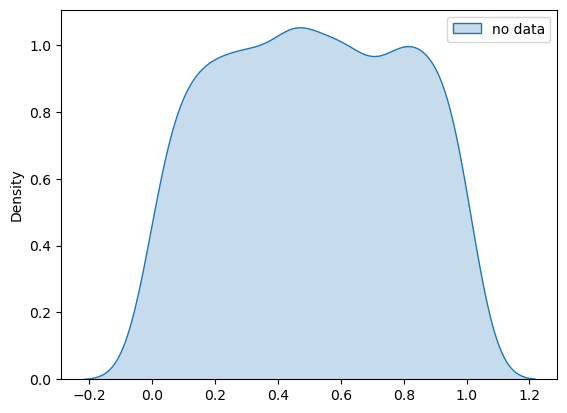

In [22]:
# Estimate and plot heads probability based on no data
heads_prob_nodata = get_heads_prob([])
sns.kdeplot(heads_prob_nodata, fill=True, label="no data")
plt.legend()
plt.show()

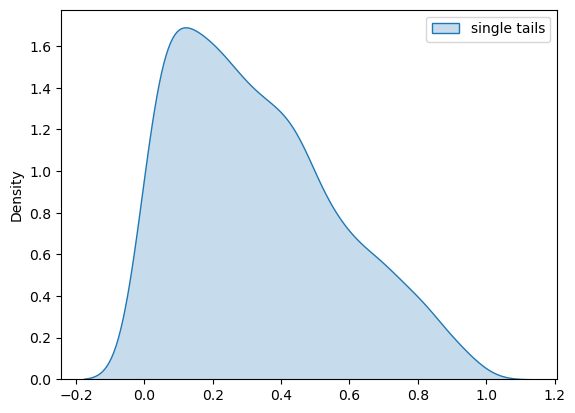

In [23]:
# Estimate and plot heads probability based on a single tails
heads_prob_onetails = get_heads_prob([0])
sns.kdeplot(heads_prob_onetails, fill=True, label="single tails")
plt.legend()
plt.show()

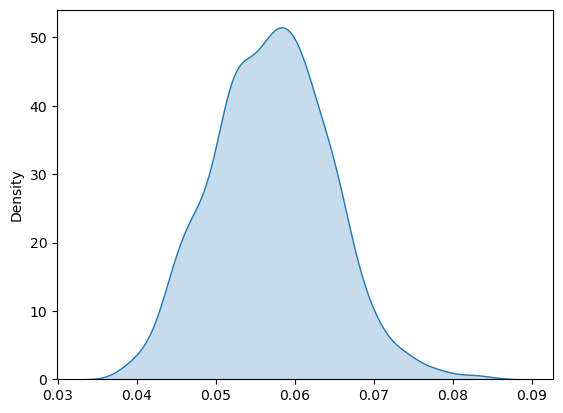

In [24]:
# Estimate and plot heads probability based on 1000 tosses with a biased coin
# that only comes up heads 5% of the time 
biased_tosses = np.random.binomial(1, 0.05, size=1000) # number of trials (coins) , prob_success, number of tests (flips)  
heads_prob_biased = get_heads_prob(biased_tosses)
sns.kdeplot(heads_prob_biased, fill=True, label="biased coin")
plt.show()

> With **no data**, each possible value of the heads probabilty is **equally likely**. That's the Bayesian way of saying ***'we don't know'***. 

> Having seen a single tails, the model suspects that tails is **more likely** than heads, but since there is so little data, it is not very sure about it, so ***other values are possible***, too. 

> Having seen 1000 tosses, 5% of them heads, the model is **certain**: the heads probability is ***around 5%***. 

**As more data come in, we update our belief about the parameter, and with more data we become more certain about our estimate.**

#### 1.3.3 Hey, is this coin fair?

In [25]:
tosses = pd.read_csv('data/tosses.csv')
tosses.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
tosses

tosses
0         1
1         1
2         1
3         1
4         1
..      ...
995       1
996       1
997       1
998       1
999       1

[1000 rows x 1 columns]

In [26]:
tosses_all = tosses.tosses
# Assign first 10 and 100 tosses to separate variables
tosses_first_10 = tosses.tosses[0:10]
tosses_first_100 = tosses.tosses[0:100]

In [27]:
# Get head probabilities for first 10, first 100, and all tossses
heads_prob_first_10 = get_heads_prob(tosses_first_10)
heads_prob_first_100 = get_heads_prob(tosses_first_100)
heads_prob_all = get_heads_prob(tosses_all)

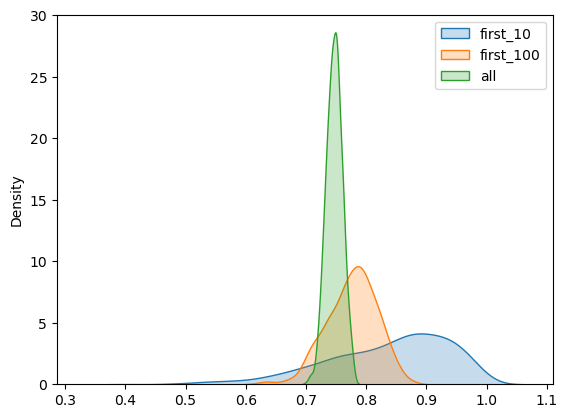

In [28]:
# Plot density of head probability for each subset of tosses
_ = sns.kdeplot(heads_prob_first_10, fill=True, label="first_10")
_ = sns.kdeplot(heads_prob_first_100, fill=True, label="first_100")
_ = sns.kdeplot(heads_prob_all, fill=True, label="all")
plt.legend()
plt.show()

You would be wise to refuse to play with this particular coin. The chance it comes up heads is 75% to be precise, and the model got it right - having seen all 1000 tosses, the estimated distribution peaks at 0.75. With smaller data samples, however, the model didn't have the chance to learn the true value. You can see how uncertain it is from the width of the corresponding distributions.

## 2. Bayesian estimation

It’s time to look under the Bayesian hood. We will learn how to apply Bayes' Theorem to drug-effectiveness data to estimate the parameters of probability distributions using the `grid approximation` technique, and update these estimates as new data become available. Next, we'll learn how to incorporate `prior knowledge` into the model before finally practicing the important skill of reporting results to a non-technical audience.

### 2.1 Under the Bayesian hood

Here is Bayes' formula which we previously used to calculate conditional probabilities of events. 

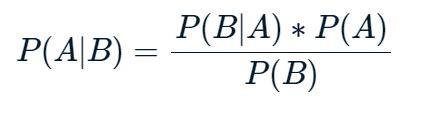

However, it can also be used to estimate model parameters! Let's replace A with parameters and B with data.

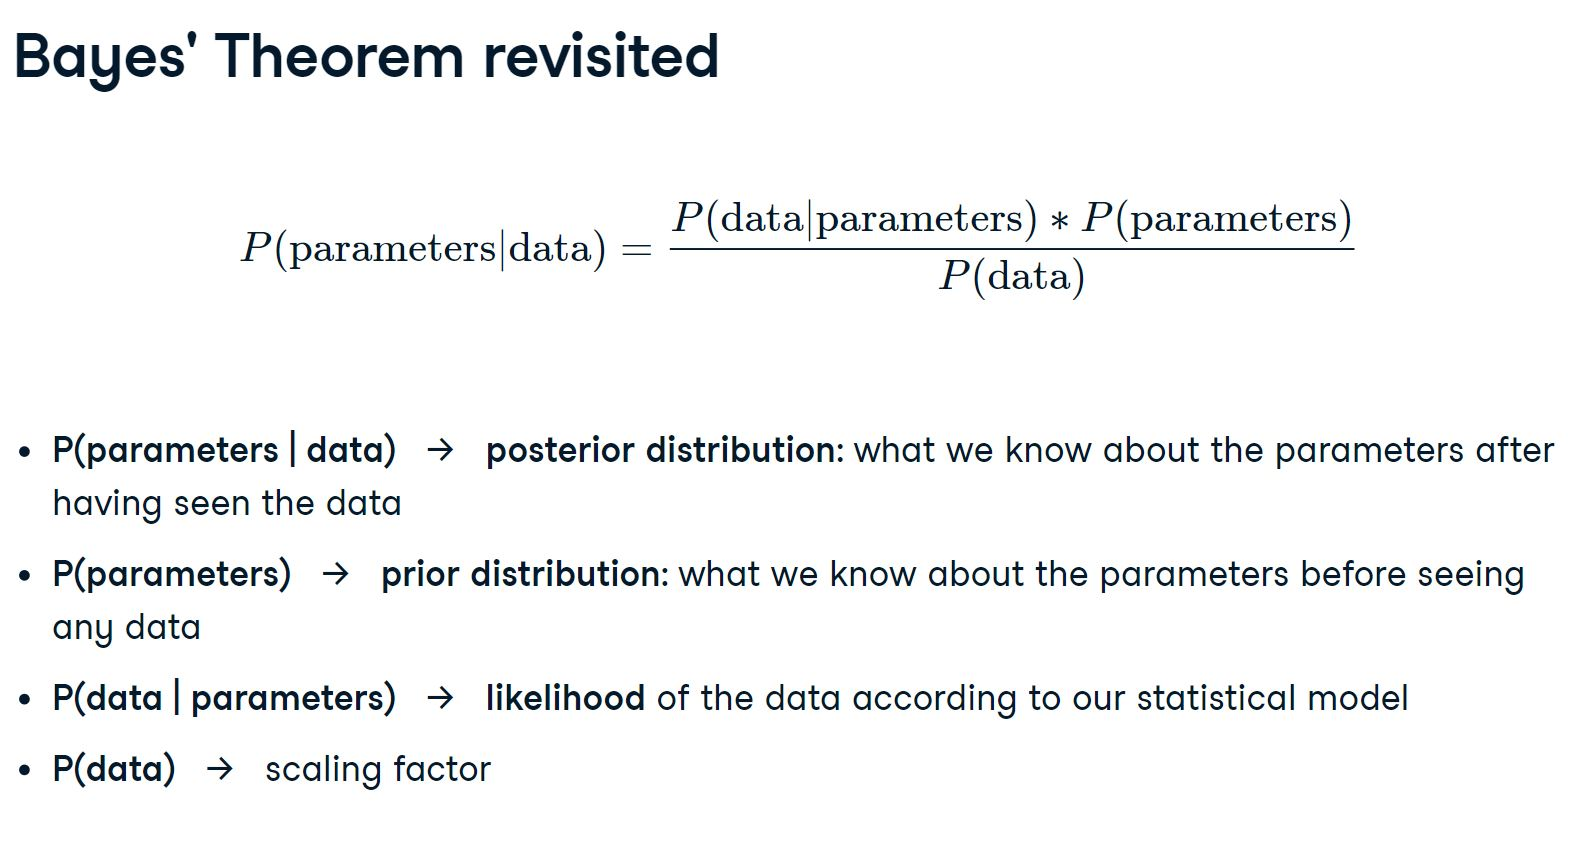

Here, each of the probabilities in the formula denotes a probability distribution rather then a single number. The term on the left-hand side is what we are interested in: the ***posterior distribution***, reflecting our knowledge about the parameters given the data we have.

On the right-hand side, we have the ***prior distribution***, which is what we know about the parameters before seeing any data, multiplied with the likelihood, which says how likely the data is given the parameters. 

The whole thing is divided by a scaling factor to make sure it is a proper distribution that sums up to one.

Consider this question :

> **Q. What's the probability of tossing heads with a coin, if we observed 75 heads in 100 tosses?**

We start the **grid approximation** by creating a grid of all possible combinations of the number of heads in 100 tosses and the probability of tossing heads. Obviously, we cannot list all probabilities from 0 to 1, so we'll make a grid by 1 percentage point.

We can create the grids with `numpy.arange()` and list all combinations of the two using a list comprehension that loops over both arrays. Finally, we make it a DataFrame and call it "coin".

Now, we need a **prior**: what we know about the probability of tossing heads before seeing any data. Say we know nothing, it could be anything between 0 and 1. In that case, ***uniform distribution*** is the right prior choice. We can import it from `scipy.stats`, and then use its pdf method (which stands for ***probability density function***) to get the prior probability for each head-prob value in the "coin" DataFrame.

Since under the uniform distribution all head-prob values are equally likely, we'll get ones everywhere.

Next, the **likelihood**. We will model coin flips using a binomial distribution, so we import it from `scipy.stats`. It has a pmf method which stands for ***probability mass function***. It's like a pdf for discrete distributions. It takes three arguments:

- number of heads
- total number of tosses
- heads probability. 

We compute the likelihood for each row in the DataFrame.

In [29]:
from scipy.stats import binom
from scipy.stats import uniform

num_heads = np.arange(0, 101, 1)
head_prob = np.arange(0, 1.01, 0.01)

# list comprehension
coin = pd.DataFrame([(x,y) for x in num_heads for y in head_prob])
coin.columns = ["num_heads", "head_prob"]

coin["prior"] = uniform.pdf(coin["head_prob"])
coin["likelihood"] = binom.pmf(coin["num_heads"], 100, coin["head_prob"])

coin["posterior_prob"] = coin["prior"] * coin["likelihood"]
coin["posterior_prob"] /= coin["posterior_prob"].sum()

coin

num_heads  head_prob  prior  likelihood  posterior_prob
0              0       0.00    1.0    1.000000        0.009901
1              0       0.01    1.0    0.366032        0.003624
2              0       0.02    1.0    0.132620        0.001313
3              0       0.03    1.0    0.047553        0.000471
4              0       0.04    1.0    0.016870        0.000167
...          ...        ...    ...         ...             ...
10196        100       0.96    1.0    0.016870        0.000167
10197        100       0.97    1.0    0.047553        0.000471
10198        100       0.98    1.0    0.132620        0.001313
10199        100       0.99    1.0    0.366032        0.003624
10200        100       1.00    1.0    1.000000        0.009901

[10201 rows x 5 columns]

Consider the first row. The likelihood is 1 because if the heads probability is 0, then observing 0 heads in 100 tosses is 100% likely.

In the second row, the heads probability is only slightly above zero. In this scenario, the likelihood of observing 0 heads in 100 tosses is almost 37%.

Finally, we can answer our question! We take only rows with num-heads equal to 75 and scale the posterior again to make sure it sums up to one. We can use the seaborn-lineplot function to plot different probabilities of tossing heads on the horizontal axis against their posterior probabilities on the vertical axis.

In [30]:
heads75 = coin.loc[coin["num_heads"] == 75]
heads75["posterior_prob"] /= heads75["posterior_prob"].sum()
heads75

/tmp/ipykernel_9637/262905728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heads75["posterior_prob"] /= heads75["posterior_prob"].sum()


num_heads  head_prob  prior     likelihood  posterior_prob
7575         75       0.00    1.0   0.000000e+00    0.000000e+00
7576         75       0.01    1.0  1.886367e-127   1.905230e-127
7577         75       0.02    1.0  5.529016e-105   5.584306e-105
7578         75       0.03    1.0   6.888644e-92    6.957530e-92
7579         75       0.04    1.0   1.247459e-82    1.259934e-82
...         ...        ...    ...            ...             ...
7671         75       0.96    1.0   1.278170e-13    1.290951e-13
7672         75       0.97    1.0   2.092463e-16    2.113387e-16
7673         75       0.98    1.0   1.788347e-20    1.806231e-20
7674         75       0.99    1.0   1.141263e-27    1.152676e-27
7675         75       1.00    1.0   0.000000e+00    0.000000e+00

[101 rows x 5 columns]

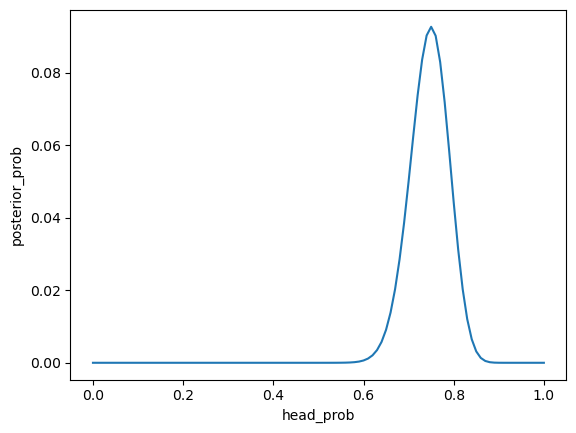

In [31]:
sns.lineplot(x=heads75["head_prob"], y=heads75["posterior_prob"])
plt.show()

We get this posterior density plot of the probability of tossing heads.

> **A.  The estimated probability of tossing heads with a coin, if we observed 75 heads in 100 tosses, is likely around 75%, with the values between more or less 60% and 85% being possible.**

#### 2.1.1 Towards grid approximation

You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the ***percentage of patients cured by the drug***.

An experiment was quickly set up in which `10` sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.

In [32]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0,11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0, 1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


So now we have a grid of possible values for the parameter we want to estimate (the efficacy rate), for all possible results of the experiment (the number of patients cured by the drug).

#### 2.1.2 Grid approximation without prior knowledge

According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.

In [33]:
# Calculate the prior efficacy rate and the likelihood
# Prior - i.e. without knowing the fact that 9 out of 10 sick patients have been cured
df["prior"] = uniform.pdf(df['efficacy_rate'])
df["likelihood"] = binom.pmf(df['num_patients_cured'], 10, df['efficacy_rate'])
df

num_patients_cured  efficacy_rate  prior  likelihood
0                      0           0.00    1.0    1.000000
1                      0           0.01    1.0    0.904382
2                      0           0.02    1.0    0.817073
3                      0           0.03    1.0    0.737424
4                      0           0.04    1.0    0.664833
...                  ...            ...    ...         ...
1106                  10           0.96    1.0    0.664833
1107                  10           0.97    1.0    0.737424
1108                  10           0.98    1.0    0.817073
1109                  10           0.99    1.0    0.904382
1110                  10           1.00    1.0    1.000000

[1111 rows x 4 columns]

In [34]:
# Calculate the posterior efficacy rate and scale it to sum up to one
# Posterior - i.e knowing that 9 out of 10 sick patients were cured
df["posterior_prob"] = df["prior"] * df["likelihood"]

# scale so that the values sum to 1
df["posterior_prob"] /= df["posterior_prob"].sum()
df

num_patients_cured  efficacy_rate  prior  likelihood  posterior_prob
0                      0           0.00    1.0    1.000000        0.009901
1                      0           0.01    1.0    0.904382        0.008954
2                      0           0.02    1.0    0.817073        0.008090
3                      0           0.03    1.0    0.737424        0.007301
4                      0           0.04    1.0    0.664833        0.006583
...                  ...            ...    ...         ...             ...
1106                  10           0.96    1.0    0.664833        0.006583
1107                  10           0.97    1.0    0.737424        0.007301
1108                  10           0.98    1.0    0.817073        0.008090
1109                  10           0.99    1.0    0.904382        0.008954
1110                  10           1.00    1.0    1.000000        0.009901

[1111 rows x 5 columns]

In [35]:
# Compute the posterior probability of observing 9 cured patients
# i.e. after knowing that 9 out of 10 were cured
df_9_of_10_cured = df.loc[df['num_patients_cured'] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()
df_9_of_10_cured

/tmp/ipykernel_9637/1459029450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


num_patients_cured  efficacy_rate  prior    likelihood  posterior_prob
909                    9           0.00    1.0  0.000000e+00    0.000000e+00
910                    9           0.01    1.0  9.900000e-18    1.089999e-18
911                    9           0.02    1.0  5.017600e-15    5.524422e-16
912                    9           0.03    1.0  1.909251e-13    2.102102e-14
913                    9           0.04    1.0  2.516582e-12    2.770780e-13
...                  ...            ...    ...           ...             ...
1005                   9           0.96    1.0  2.770136e-01    3.049944e-02
1006                   9           0.97    1.0  2.280693e-01    2.511063e-02
1007                   9           0.98    1.0  1.667496e-01    1.835927e-02
1008                   9           0.99    1.0  9.135172e-02    1.005791e-02
1009                   9           1.00    1.0  0.000000e+00    0.000000e+00

[101 rows x 5 columns]

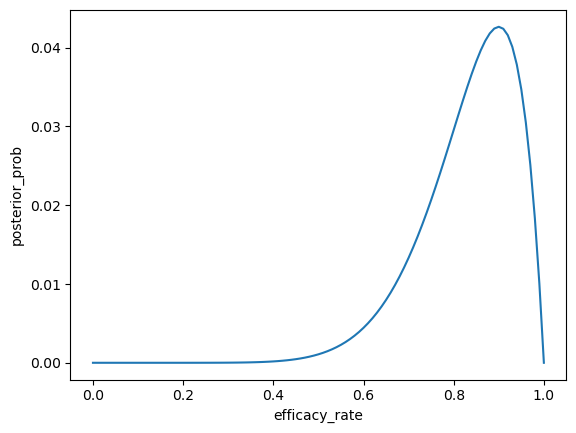

In [36]:
# Plot the drug's posterior efficacy rate
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], y=df_9_of_10_cured["posterior_prob"])
plt.show()

As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!

#### 2.1.3 Updating posterior belief

Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to **update** our ***posterior distribution*** with these new data.

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior :

- we can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a ***new prior***
- then recompute the likelihood for the new data, and get the ***new posterior***

In [37]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])
df

num_patients_cured  efficacy_rate  prior  likelihood  posterior_prob  \
0                      0           0.00    1.0    1.000000        0.009901   
1                      0           0.01    1.0    0.904382        0.008954   
2                      0           0.02    1.0    0.817073        0.008090   
3                      0           0.03    1.0    0.737424        0.007301   
4                      0           0.04    1.0    0.664833        0.006583   
...                  ...            ...    ...         ...             ...   
1106                  10           0.96    1.0    0.664833        0.006583   
1107                  10           0.97    1.0    0.737424        0.007301   
1108                  10           0.98    1.0    0.817073        0.008090   
1109                  10           0.99    1.0    0.904382        0.008954   
1110                  10           1.00    1.0    1.000000        0.009901   

      new_prior  new_likelihood  
0      0.009901        1.000000  
1      0.008954        0.886385  
2      0.008090        0.784717  
3      0.007301        0.693842  
4      0.006583        0.612710  
...         ...             ...  
1106   0.006583        0.070206  
1107   0.007301        0.043803  
1108   0.008090        0.021571  
1109   0.008954        0.005969  
1110   0.009901        0.000000  

[1111 rows x 7 columns]

In [38]:
# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()
df                               

num_patients_cured  efficacy_rate  prior  likelihood  posterior_prob  \
0                      0           0.00    1.0    1.000000        0.009901   
1                      0           0.01    1.0    0.904382        0.008954   
2                      0           0.02    1.0    0.817073        0.008090   
3                      0           0.03    1.0    0.737424        0.007301   
4                      0           0.04    1.0    0.664833        0.006583   
...                  ...            ...    ...         ...             ...   
1106                  10           0.96    1.0    0.664833        0.006583   
1107                  10           0.97    1.0    0.737424        0.007301   
1108                  10           0.98    1.0    0.817073        0.008090   
1109                  10           0.99    1.0    0.904382        0.008954   
1110                  10           1.00    1.0    1.000000        0.009901   

      new_prior  new_likelihood  new_posterior_prob  
0      0.009901        1.000000            0.050946  
1      0.008954        0.886385            0.040840  
2      0.008090        0.784717            0.032665  
3      0.007301        0.693842            0.026067  
4      0.006583        0.612710            0.020753  
...         ...             ...                 ...  
1106   0.006583        0.070206            0.002378  
1107   0.007301        0.043803            0.001646  
1108   0.008090        0.021571            0.000898  
1109   0.008954        0.005969            0.000275  
1110   0.009901        0.000000            0.000000  

[1111 rows x 8 columns]

In [39]:
# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df["num_patients_cured"] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()
df_10_of_12_cured

/tmp/ipykernel_9637/4195989229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


num_patients_cured  efficacy_rate  prior    likelihood  posterior_prob  \
1010                  10           0.00    1.0  0.000000e+00    0.000000e+00   
1011                  10           0.01    1.0  1.000000e-20    9.900990e-23   
1012                  10           0.02    1.0  1.024000e-17    1.013861e-19   
1013                  10           0.03    1.0  5.904900e-16    5.846436e-18   
1014                  10           0.04    1.0  1.048576e-14    1.038194e-16   
...                  ...            ...    ...           ...             ...   
1106                  10           0.96    1.0  6.648326e-01    6.582501e-03   
1107                  10           0.97    1.0  7.374241e-01    7.301229e-03   
1108                  10           0.98    1.0  8.170728e-01    8.089830e-03   
1109                  10           0.99    1.0  9.043821e-01    8.954278e-03   
1110                  10           1.00    1.0  1.000000e+00    9.900990e-03   

         new_prior  new_likelihood  new_posterior_prob  
1010  0.000000e+00    0.000000e+00        0.000000e+00  
1011  9.900990e-23    6.468660e-19        5.207317e-39  
1012  1.013861e-19    6.490767e-16        5.350517e-33  
1013  5.846436e-18    3.666907e-14        1.743060e-29  
1014  1.038194e-16    6.378026e-13        5.383763e-27  
...            ...             ...                 ...  
1106  6.582501e-03    7.020633e-02        3.757407e-02  
1107  7.301229e-03    4.380299e-02        2.600284e-02  
1108  8.089830e-03    2.157072e-02        1.418813e-02  
1109  8.954278e-03    5.968922e-03        4.345578e-03  
1110  9.900990e-03    0.000000e+00        0.000000e+00  

[101 rows x 8 columns]

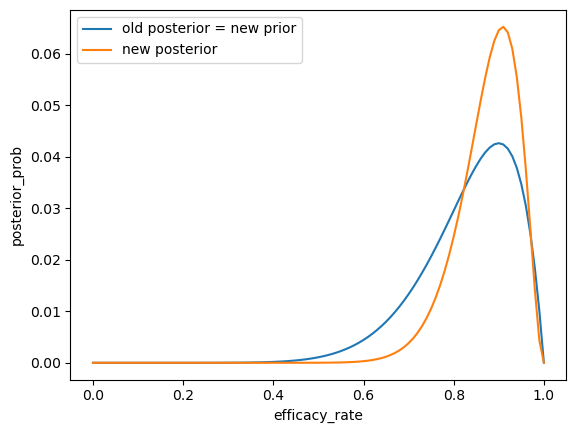

In [40]:
# without prior knowledge, after seeing 9 out of 10 cured
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], 
             y=df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")

# after seeing another 10 out of 12 cured
sns.lineplot(x=df_10_of_12_cured["efficacy_rate"], 
             y=df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")

plt.show()

Based on the above plot we can see that:
    
- the new posterior is higher and narrower than the old one, which means there is less uncertainty in the estimation
- adding the data on the new 12 patients increase our estimate of the drug's effectiveness against the virus

The difference between these two distributions actually reflects what we have learned only from the data on the 12 new patients. The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.

Instead of using the old posterior as a new prior, we could have come up with our own prior belief about the efficacy rate in the first place.

### 2.2 Prior belief

Prior distribution reflects what we know about the parameters we want to estimate before observing any data. We could know nothing and choose the uniform prior, where all parameter values are equally likely. A posterior from a previous analysis can also be used as a new prior to update the posterior as more data came in. In general, however, one can choose any probability distribution as a prior. This allows us to include external information in the model, such as expert opinion, common knowledge, previous research results, or even our own beliefs.

We should choose the prior distribution before we see the data. As we've just seen, with little data, the prior strongly impacts the shape of the posterior distribution. Even with more data, the prior choice can still impact the posterior results. To avoid accusations that we have cherry-picked a prior to produce desired results, we must follow two rules :

- the prior choice should be clearly stated 
- the prior choice should be explainable based on previous research, sensible assumptions, expert opinion etc

But how to make this choice? Imagine we believe for some reason that tossing heads is unlikely. We could capture such a belief in many different distributions. Consider these two: beta and log normal. 

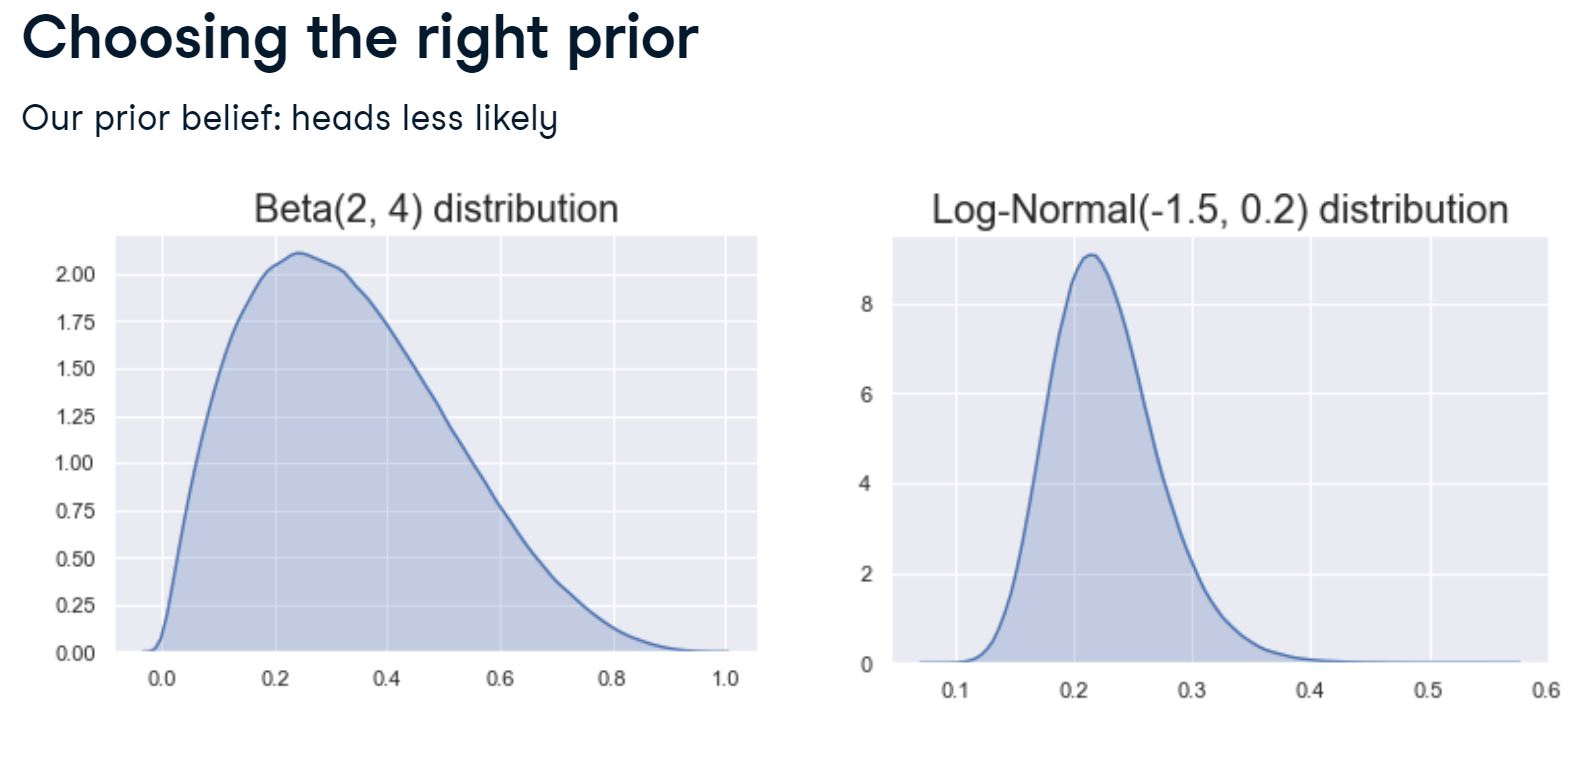

Yhey are pretty similar. According to both, probability of heads is likely around 25%. However, one of them is a better choice than the other.

Some priors, multiplied with specific likelihoods, yield posteriors of a known form. They are known as conjugate priors.

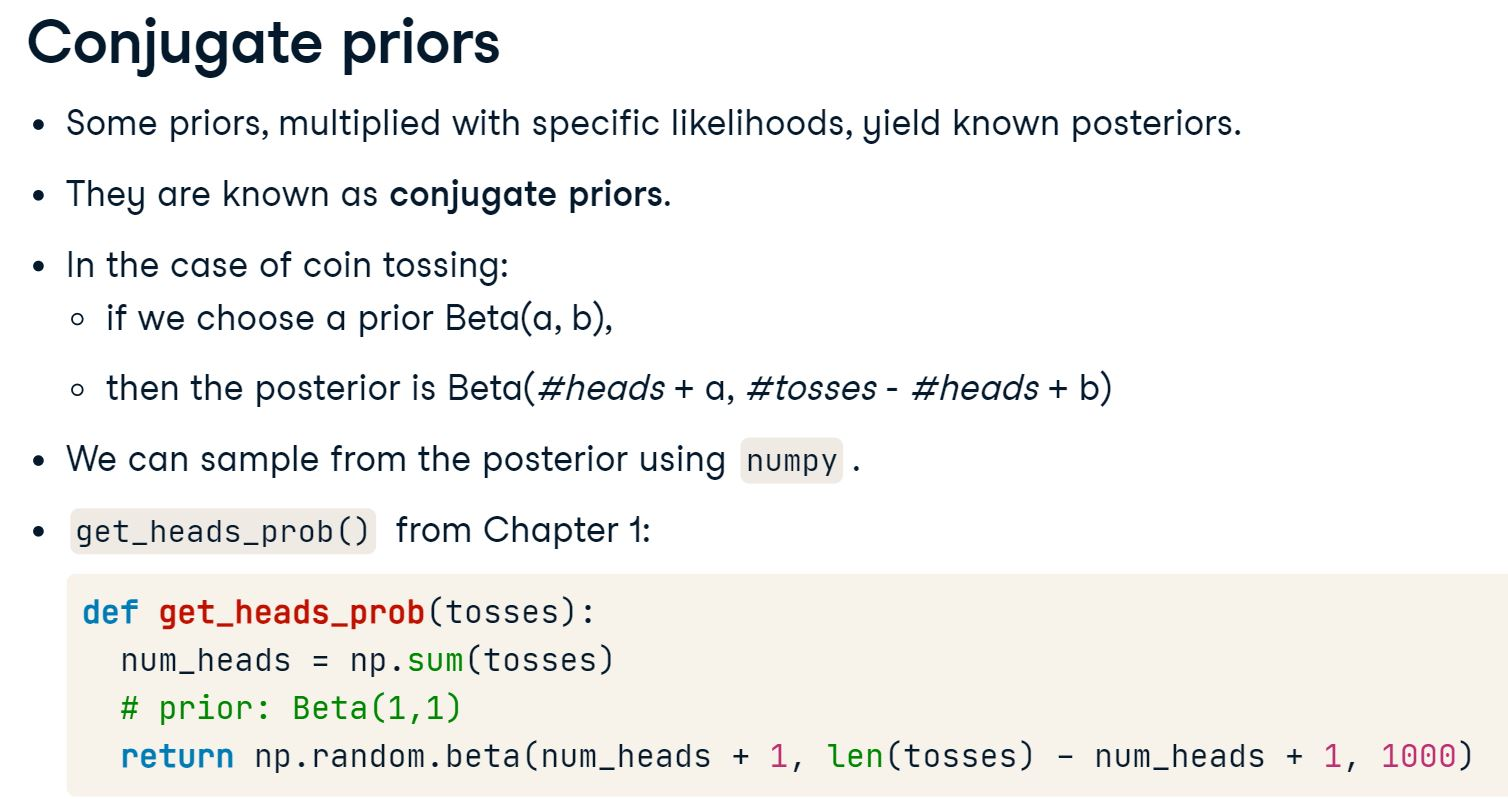

So, we have two ways to get the posterior: we can simulate or calculate. 

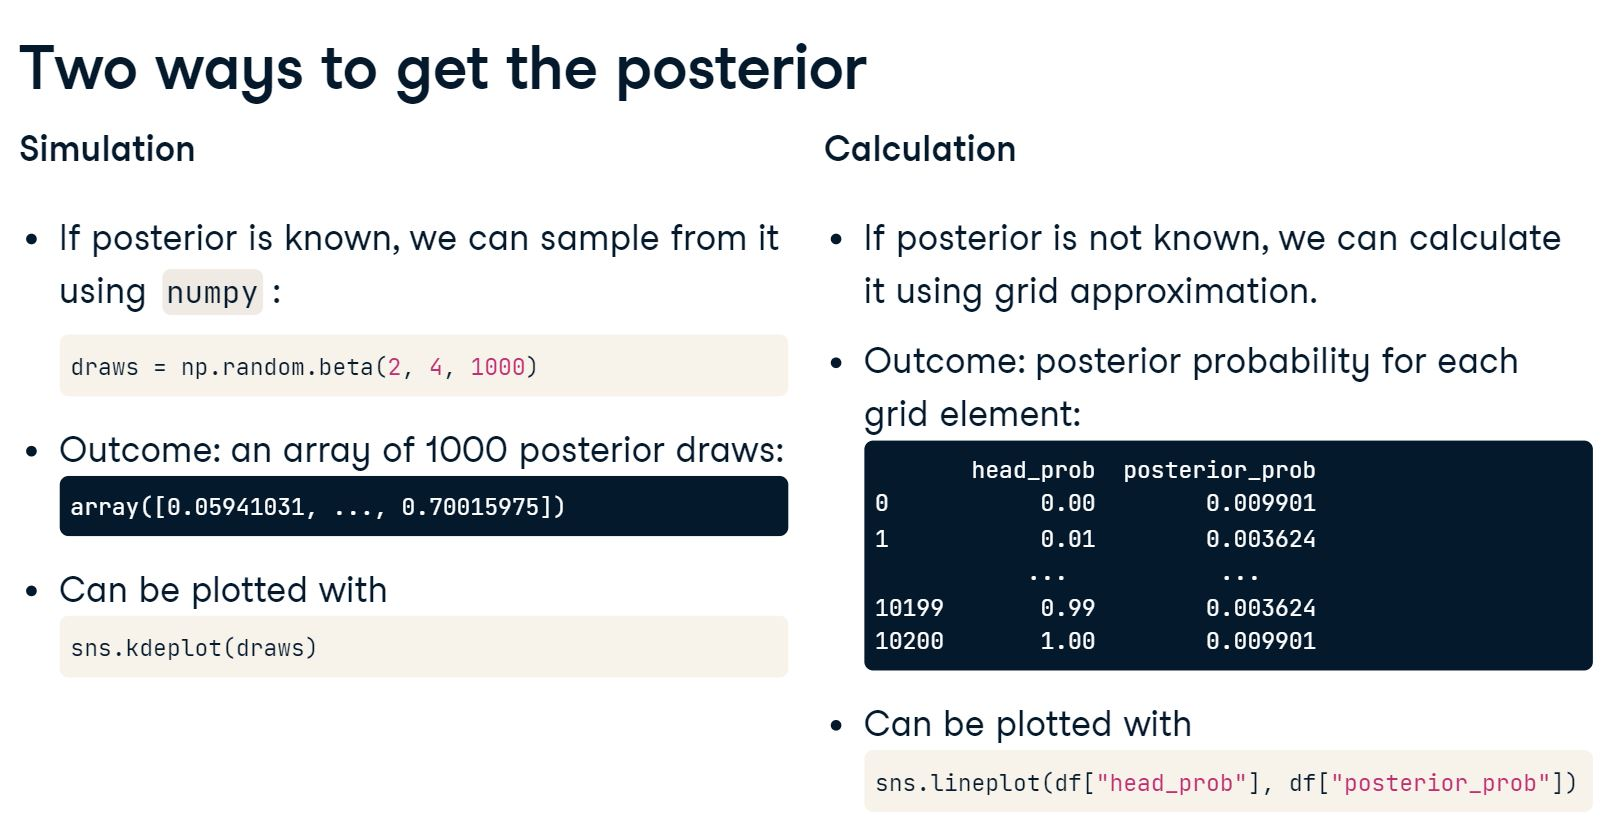

The two methods give exactly the same results. Previously, we calculated using grid approximation to understand what's happening under the hood. In practice, however, simulation is easier and faster.


#### 2.2.1 The truth of the prior

> **The prior distribtion should be chosen before one sees any data**

> **If you don't explain your prior choice, you might be accused of cherry-picking a prior that results in the posterior that you want**


> **A prior distribution is what makes Bayesian inference possible even with little data**

#### 2.2.2 Picking the right prior

You continue working on your task to estimate the new drug's efficacy, but with the small data sample you had, you know there is a lot of uncertainty in your estimate. Luckily, a couple of neighboring countries managed to conduct more extensive experiments and have just published their results. You can use them as priors in your analysis!

Having browsed all the publications, you conclude that the reported efficacy rates are mostly between 70% and 90%. A couple of results below 50% were recorded too, but not many.

> **Q. Which of the following distributions captures this prior information best?**

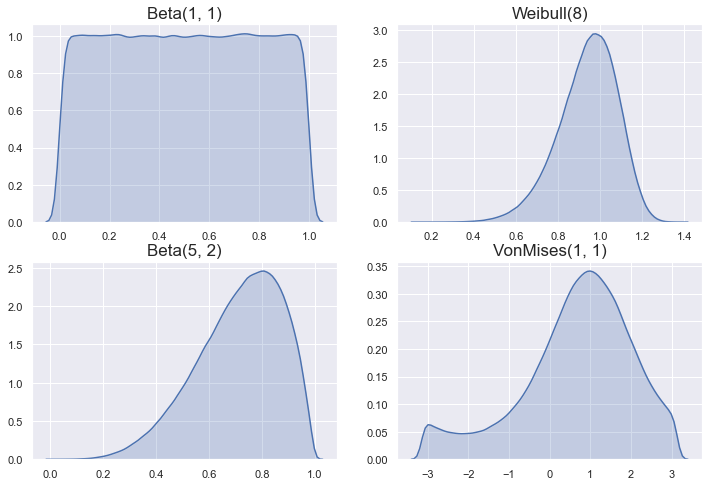

> **A. Beta(5,2) seems to be a good prior: it captures the external information about our parameter of interest and is based on previous scientific research**

#### 2.2.3 Simulating posterior draws

Say we decided to use a Beta (5, 2) distribution prior for the efficacy rate. We will also use the binomial distribution to model the data (curing a sick patient is a "success", remember?). 

Since the beta distribution is a `conjugate prior` for the binomial likelihood, we can simply simulate the posterior.

We know that if the prior is *Beta(a,b)*, then the posterior is *Beta(x,y)* with :

    x = NumberOfSuccesses + a
    y = NumberofObservations - NumberOfSuccesses + b
    
Let's simulate the posterior distribution - we have data on 22 patients, 19 of whom have been cured.

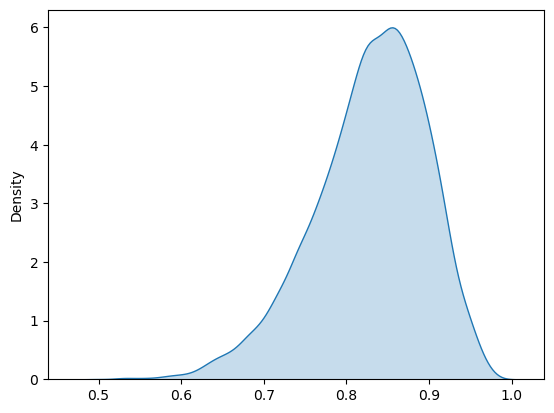

In [41]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribution
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, fill=True)
plt.show()

Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in your data you observe 86% (19 out of 22). 

> **This is the impact of the prior: we learn not only from our own small data, but also from other countries' experience**

### 2.3 Reporting Bayesian results

The truly honest way of reporting Bayesian parameter estimates is to present the prior and the posterior of each parameter. Assuming you have the draws from the prior and posterior distributions in a numpy array, you can plot the two distributions with seaborn's kdeplot function. 

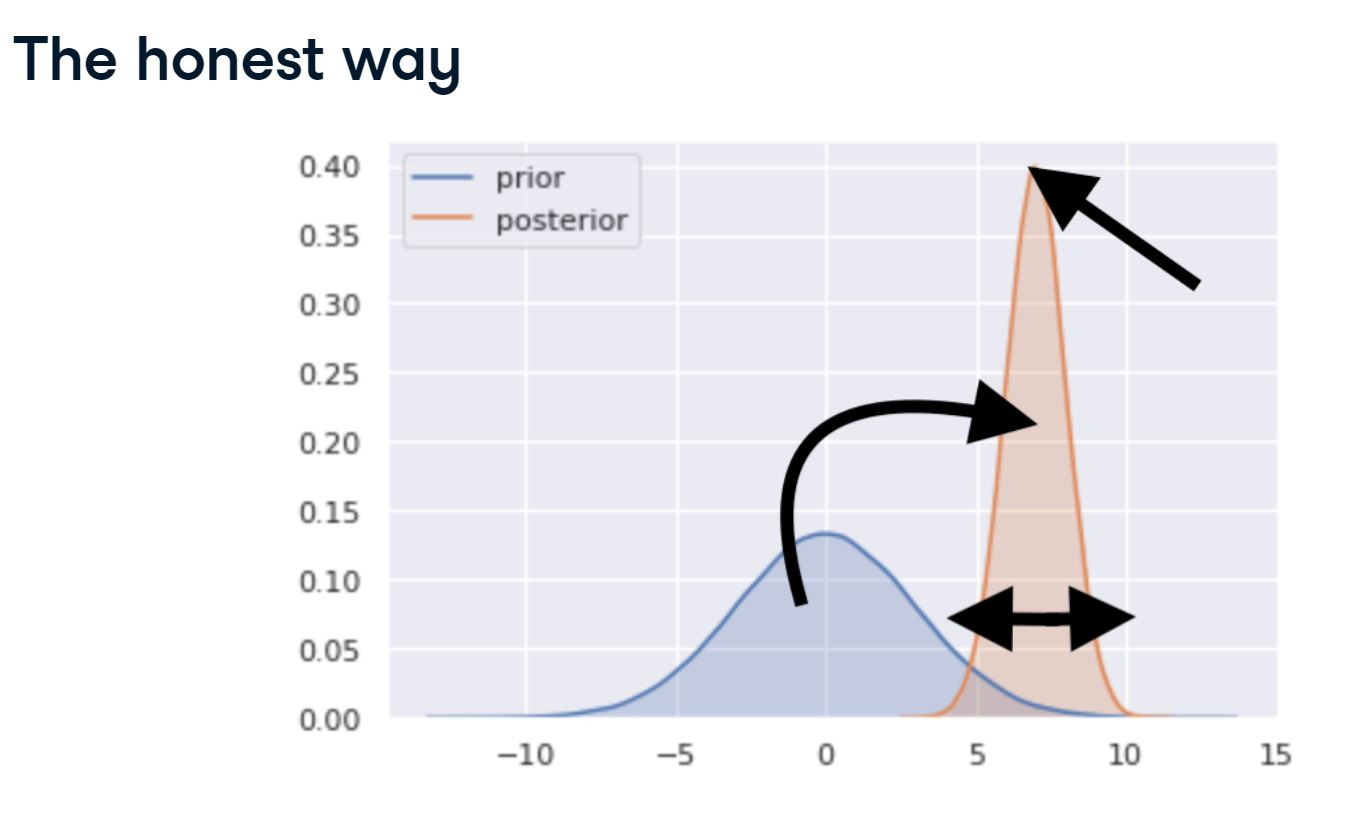

This provides your audience with full information: 

- what are the most likely posterior values
- what is the range of possible values
- how the prior influences the posterior

Unfortunately, with many parameters in the model, this approach becomes infeasible, so the information has to be summarized. No single number can fully convey the complete information contained in a distribution. Yet, sometimes such information compression is necessary and we need a single number called a **point estimate**.

There are many different point estimates you can calculate. One is the ***expected value (or mean)***, of the posterior distribution. You can also summarize the posterior distribution by its median, a number we are 50% sure the parameter's value is at least this. The mean and the median can be easily computed with the corresponding numpy functions `np.mean(`), `np.median()`. You can also calculate percentiles based on the posterior draws. The 75th percentile, computed with `np.percentile(posterior_draws, 75)` is such a value that 75% of the distribution mass is below it, which means we are 75% sure the parameter's value is at most this.

In addition to providing a point estimate, it is a good practice to provide **a measure of uncertainty** in the estimation. This can be achieved by computing a ***credible interval***.

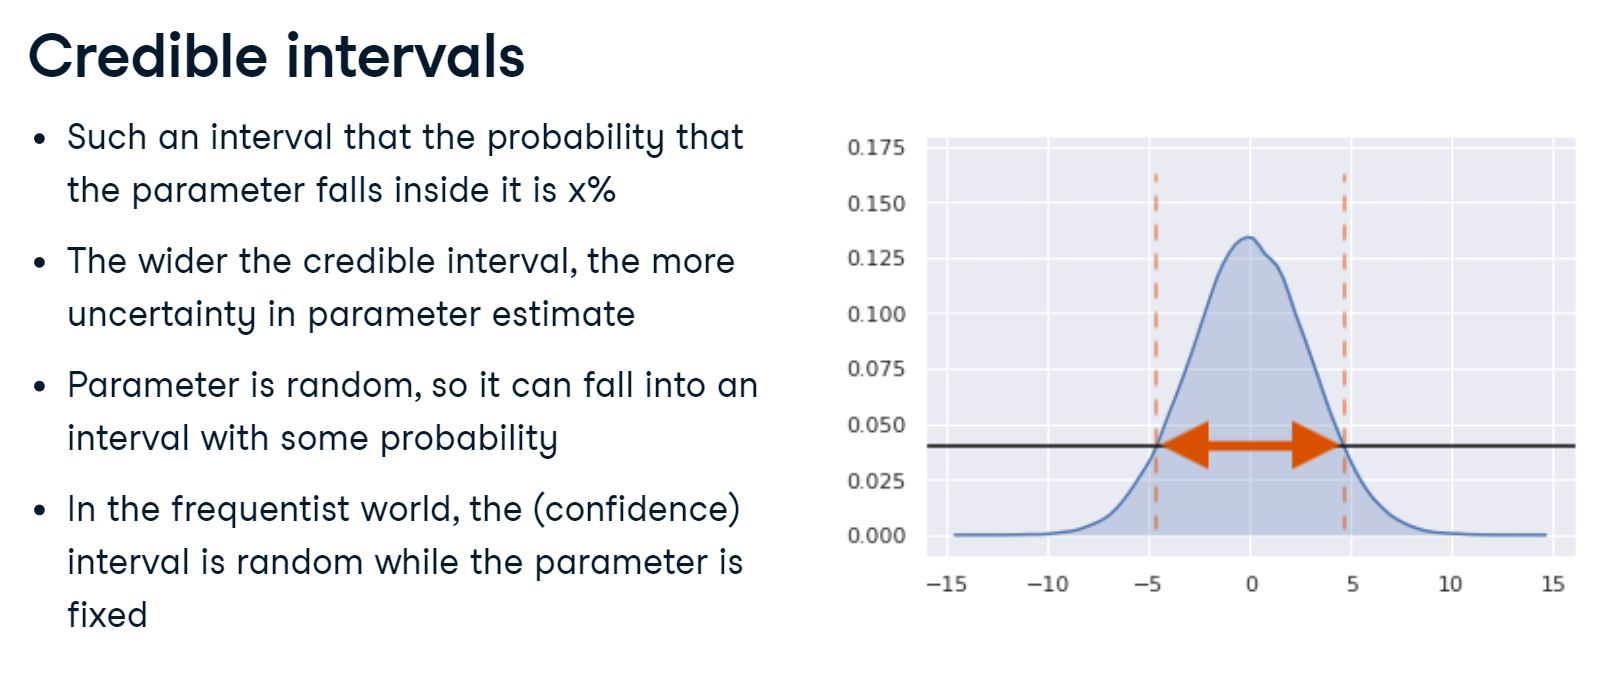

> **In the Bayesian world, a parameter is a random variable, so we can talk about the probability it falls into some interval. This is in contrast to the frequentist world, where it is the interval (called a confidence interval) that is random while the parameter is a fixed value. They can only make probabilistic statements about the interval, not the parameter. It is a subtle but important distinction**

One way to compute a credible interval is by `Highest Posterior Density`, or HPD. To calculate it, we can use the `hdi()` function from the `arviz` package. arviz is a package for exploratory analysis of Bayesian models. 

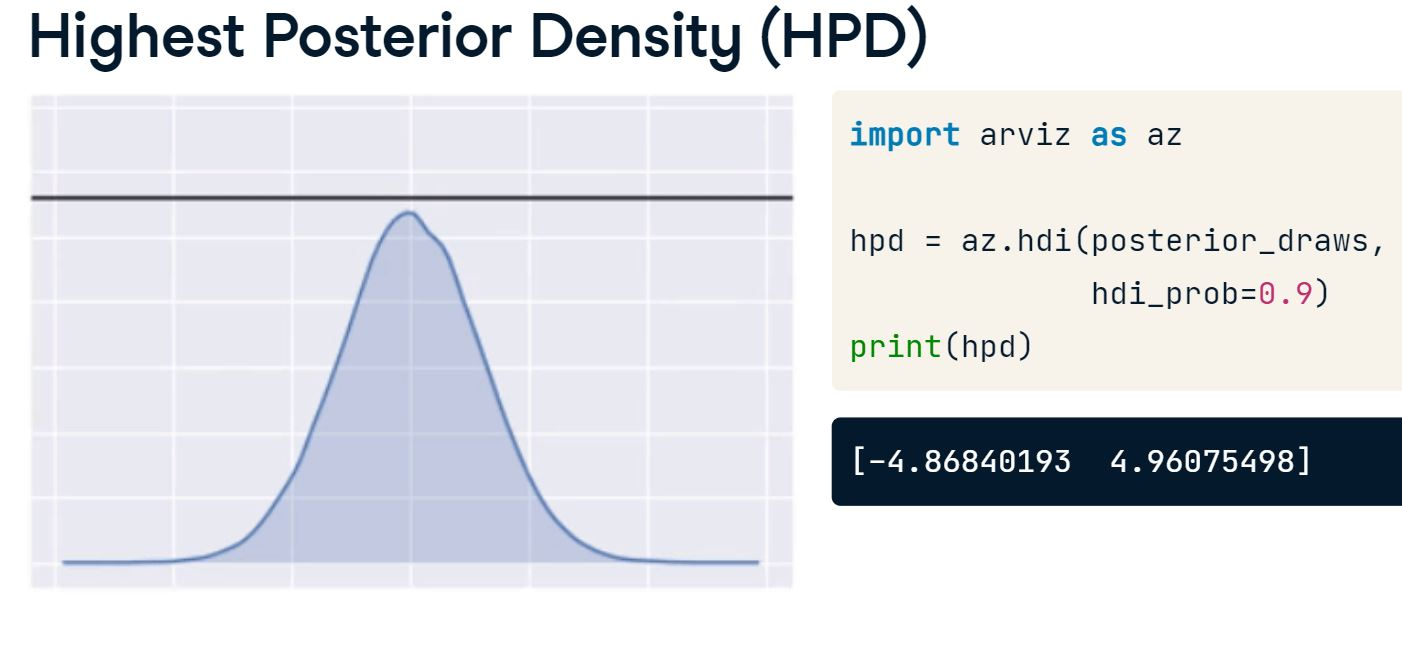

We can interpret the plot as follows: 

>**the probability that the parameter lies between negative 4.86 and 4.96 is 90%**

#### 2.3.1 Point estimates

You continue working at your government's Department of Health. You have been tasked with filling the following memo with numbers, before it is sent to the secretary.

>**Based on the experiments carried out by ourselves and neighboring countries, should we distribute the drug, we can expect ___ infected people to be cured. There is a 50% probability the number of cured infections will amount to at least ___, and with 90% probability it will not be less than ___.**

Calculate the three numbers needed to fill in the memo, knowing there are 100,000 infections at the moment.

In [42]:
drug_efficacy_posterior_draws = pd.read_csv('data/drug_efficacy_posterior_draws.csv')
drug_efficacy_posterior_draws

values
0     0.876038
1     0.907057
2     0.874889
3     0.737039
4     0.766044
...        ...
9995  0.850909
9996  0.890111
9997  0.881313
9998  0.853661
9999  0.803728

[10000 rows x 1 columns]

In [43]:
# Calculate the expected number of people cured (i.e mean) by multiplying the drug's expected efficacy rate
# by the number of infected people (100,000)
cured_expected = np.mean(drug_efficacy_posterior_draws) * 100000
cured_expected

82777.39539679998

In [44]:
# Calculate the minimum number of people cured with 50% probability (i.e median)
min_cured_50_perc = np.median(drug_efficacy_posterior_draws) * 100000
min_cured_50_perc

83484.975

In [45]:
# Calculate the minimum number of people cured with 90% probability (i.e only 10% below this -10th percentile)
min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100000
min_cured_90_perc

73485.086

In [46]:
# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 82777 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 83484, and with 90% probability 
it will not be less than 73485.


These numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next.

#### 2.3.2 Highest Posterior Density credible intervals

We know that reporting bare point estimates is not enough. It would be great to provide a measure of uncertainty in the drug's efficacy rate estimate, and so we decide to add the following to the memo:

> **The experimental results indicate that with a 90% probability the new drug's efficacy rate is between ___ and ___, and with a 95% probability it is between ___ and ___.**

In [47]:
# Import arviz as az
#!pip install arviz
import arviz as az

In [48]:
drug_efficacy_posterior_draws_array = np.array(drug_efficacy_posterior_draws.values)
drug_efficacy_posterior_draws_array

array([[0.87603807],
       [0.9070567 ],
       [0.87488893],
       ...,
       [0.88131286],
       [0.8536615 ],
       [0.80372828]])

In [49]:
drug_efficacy_posterior_draws_array.shape

(10000, 1)

In [50]:
# Calculate HPD credible interval of 90%
ci_90 = az.hdi(drug_efficacy_posterior_draws_array, hdi_prob=0.9)

# Calculate HPD credible interval of 95%
ci_95 = az.hdi(drug_efficacy_posterior_draws_array, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0][0], 2)} and {np.round(ci_90[0][1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0][0], 2)} and {np.round(ci_95[0][1], 2)}.")

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.72 and 0.94, 
and with a 95% probability it is between 0.7 and 0.95.


/tmp/ipykernel_9637/2635903360.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci_90 = az.hdi(drug_efficacy_posterior_draws_array, hdi_prob=0.9)
/tmp/ipykernel_9637/2635903360.py:5: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  ci_95 = az.hdi(drug_efficacy_posterior_draws_array, hdi_prob=0.95)


Since the drug's true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: ***"the probability that it takes a particular value or that it lies in a particular interval is X%"***

Following on from this, the proper Bayesian interpretation of our credible intervals in the context of the drug's efficacy is:

>**The probability that the drug's true efficacy rate lies in the interval (0.72,0.94) is 90%.**

>**The probability that the drug's true efficacy rate lies in the interval (0.70,0.95) is 95%.**

## 3. Bayesian inference

Let's now apply your newly acquired Bayesian data analysis skills to solve real-world business challenges. We will work with online sales marketing data to conduct A/B tests, decision analysis, and forecasting with linear regression models.

### 3.1 A/B testing

A/B testing is a method for assessing user experience based on a randomized experiment, in which we divide our users into two groups. We expose each group to a different version of something, for instance, we show each group a different version of a website layout

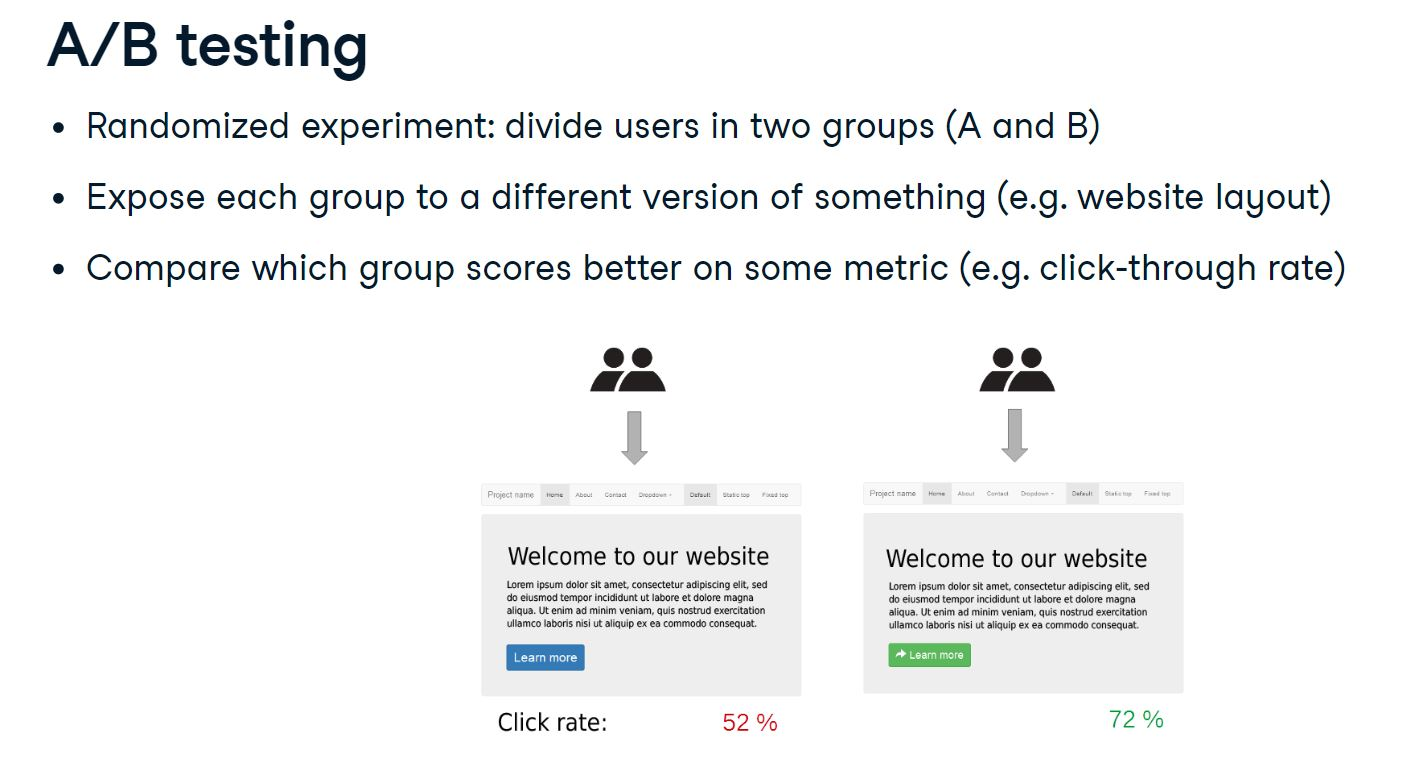

Then, we compare the two groups based on some metric, such as which website version generated a higher click-through rate. Such an A/B test allows us to choose the better version of the website that would subsequently be shown to all users.

The typical, frequentist approach to A/B testing is based on a statistical procedure known as hypothesis testing. The main drawback of this approach is that we can only conclude ***which*** group is better, but NOT ***how much better*** it is.

Alternatively, the Bayesian approach allows us to calculate the posterior click-through rates for websites A and B, compare them directly, and calculate the ***probability that one is better*** than the other. We can also **quantify** how much better it is, and even estimate the **expected loss** in case we make a wrong decision and deploy the worse website version.

To model whether a user clicks or doesn't click you can use the binomial distribution, with a click being a success, and the click rate being the probability of success. We've seen that for binomial data, a **beta** prior would generate a **beta posterior** according to these formulas:

    x = NumberOfSuccesses + a
    y = NumberofObservations - NumberOfSuccesses + b

This allows us to simply sample the posterior draws from the appropriate beta distribution. Here is a custom function that implements the above formula.

In [51]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    posterior_draws = np.random.beta(
        num_successes + beta_prior_a,
        len(trials) - num_successes + beta_prior_b,
        10000
    )
    return posterior_draws

The only difference from the `get_heads_prob()` function we used before, is that next to the 0-1 data, you can pass the two beta prior parameters as arguments. As a result, we get 10,000 posterior draws, just like before.

Imagine we have a list of 1s (clicks) and 0s (no-clicks) based on the website traffic for two website layouts: A and B. We can use the `simulate_beta_posterior()` function to simulate posterior draws. Here, we are using a ***beta-1-1 prior***. We can plot the two posteriors to see that B seems to be better, although the two overlap :

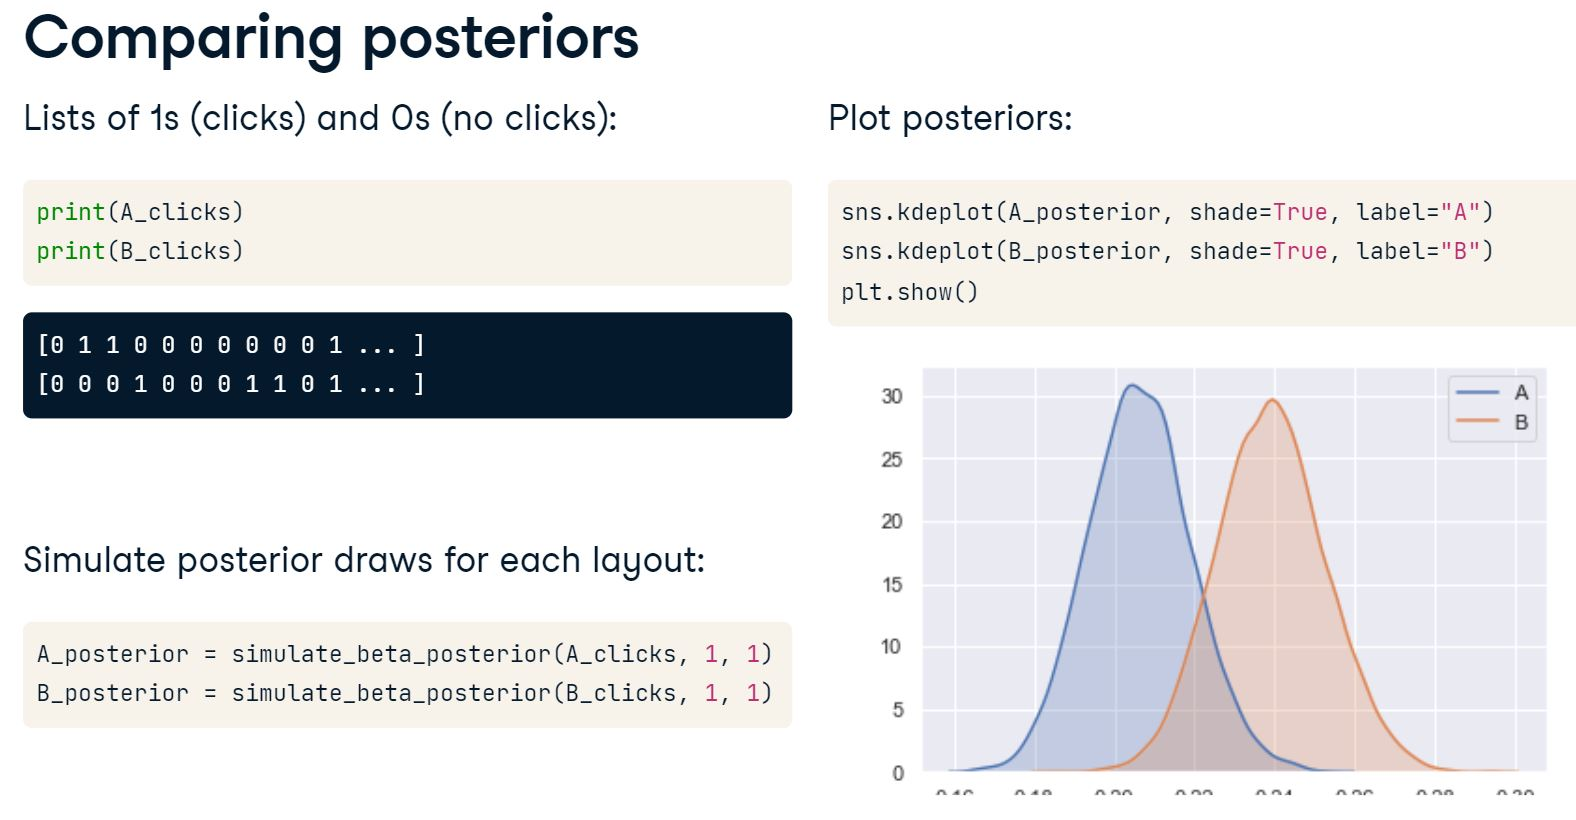

We can subtract one from the other to calculate the posterior difference between click rates. It's very likely to be positive, which corresponds to B being better. To get the explicit probability of B being better than A, we can create a Boolean array that is True when B is better and False otherwise, and compute its mean. Here, there is a 96% probability that the B website layout is better!

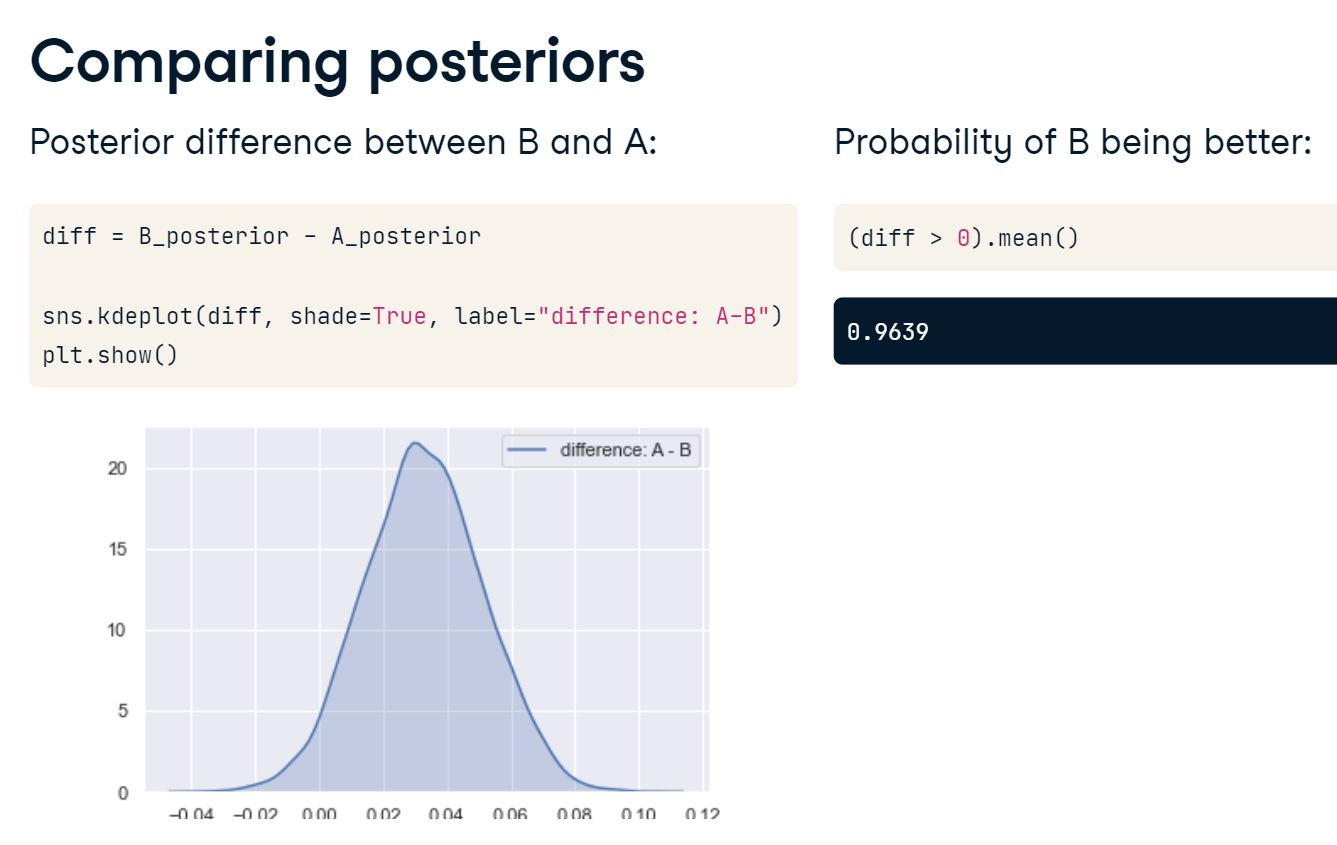

We can also estimate the expected loss resulting from accidentally deploying a worse version. First, we slice the difference between the two posteriors to take only the rare cases where A is better. This is our loss. Then, we take the average to get the expected loss.

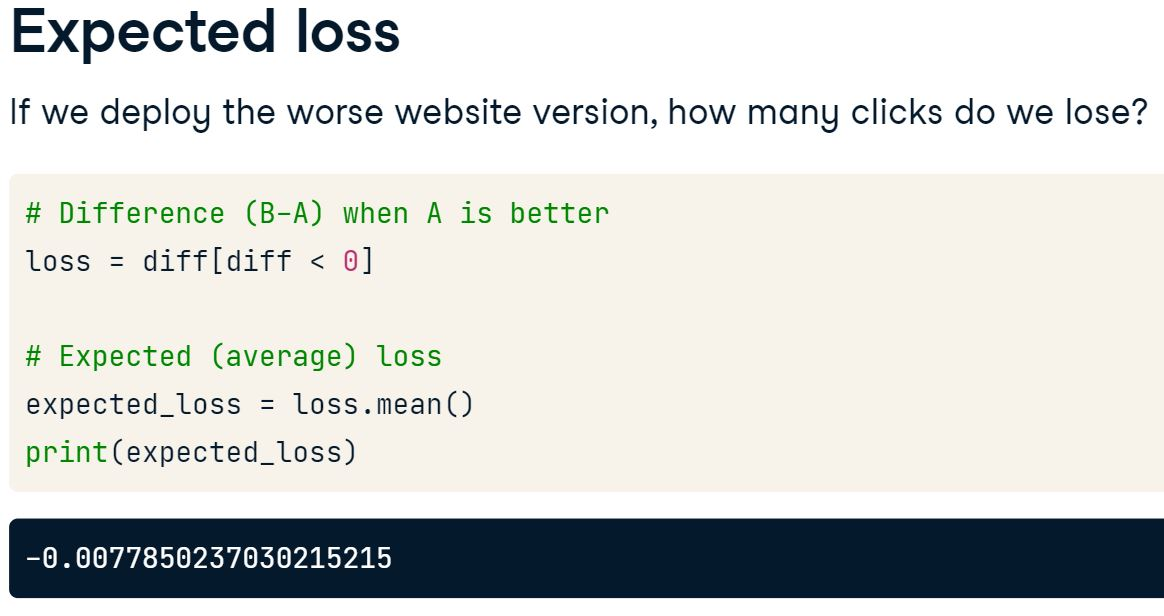

 If we deploy version B, which we know is better with 96% probability, but the 4% risk materializes and it turns out A was better, we will only lose 0.7% in the click-through rate.


#### 3.1.1 Simulate beta posterior

Given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, we will use a beta prior.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]

<Axes: ylabel='Density'>

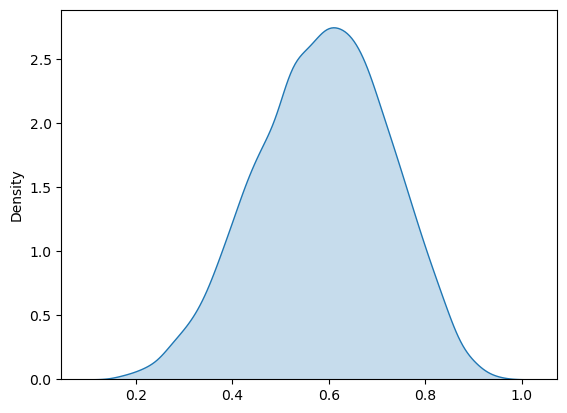

In [54]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)

<Axes: ylabel='Density'>

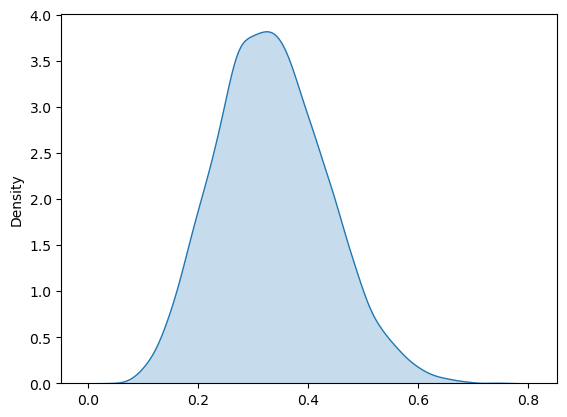

In [55]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)

Now we can see what simulate_beta_posterior() is doing. Based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!

#### 3.1.2 Posterior click rates

After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that 
 would be a good prior for the click-through rate.

In [56]:
ads = pd.read_csv('data/ads.csv')
ads.head()

user_id   product site_version  \
0  f500b9f27ac611426935de6f7a52b71f   clothes      desktop   
1  cb4347c030a063c63a555a354984562f  sneakers       mobile   
2  89cec38a654319548af585f4c1c76b51   clothes       mobile   
3  1d4ea406d45686bdbb49476576a1a985  sneakers       mobile   
4  d14b9468a1f9a405fa801a64920367fe   clothes       mobile   

                  time  banner_clicked  
0  2019-01-28 16:47:08               0  
1  2019-03-31 17:34:59               0  
2  2019-02-06 09:22:50               0  
3  2019-05-23 08:07:07               0  
4  2019-01-28 08:16:37               0

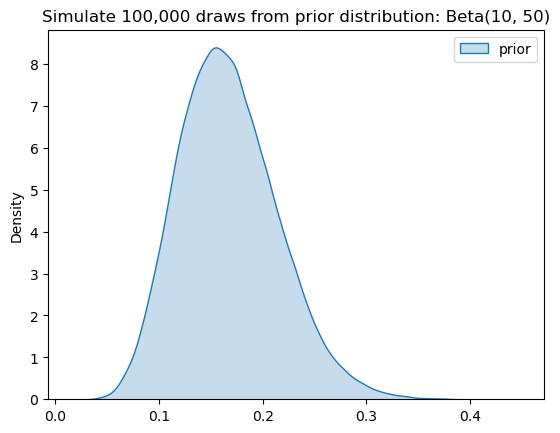

In [57]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
_ = sns.kdeplot(prior_draws, fill=True, label="prior")
plt.legend()
plt.title ("Simulate 100,000 draws from prior distribution: Beta(10, 50)")
plt.show()

In [58]:
# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads['product'] == 'clothes']['banner_clicked']

sneakers_clicked = ads.loc[ads['product'] == 'sneakers']['banner_clicked']

In [59]:
# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

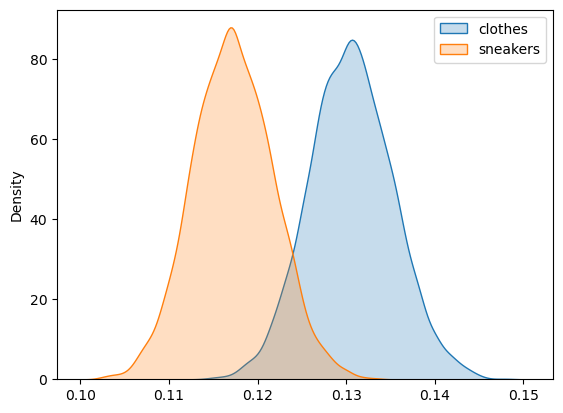

In [60]:
# plot the two posteriors
_ = sns.kdeplot(clothes_posterior, fill=True, label="clothes")
_ = sns.kdeplot(sneakers_posterior, fill=True, label="sneakers")
plt.legend()
#plt.title("Posterior 
plt.show()

>**Bassed on the above plot, both campaigns are rather average when compared with the previous campaigns (which typically averaged around 15%, varying between 5% and 30%)**

>**It is more probable that clothes ads are better, but we are not completely sure about it.**

>**It is more probable that clothes ads are better, but we are not completely sure about it.**

>**We are more certain about the click rate estimate for sneakers than for clothes.**

#### 3.1.3 A or B, and how sure are we?

You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher.

In [61]:
import arviz as az

Text(0.5, 1.0, 'Posterior density plot of difference in click rate: clothes v sneakers')

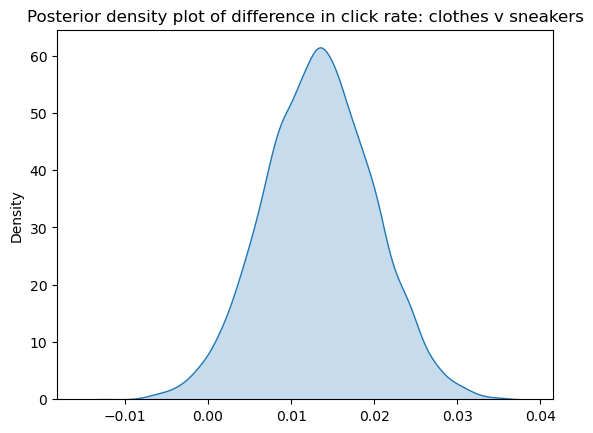

In [62]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
_ = sns.kdeplot(diff, fill=True)
plt.title("Posterior density plot of difference in click rate: clothes v sneakers")

> **Based on the plot above, the indication is that clothes are likely better, as the difference is very likely positive.**

In [63]:
# Calculate and print 90% credible interval of posterior difference
interval = az.hdi(diff, 0.90)
print(interval)

[0.00316561 0.02472141]


> **The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers.**

In [64]:
# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff>0).mean()
print(clothes_better_prob)

0.9782


>**Finally, the probability that the clothes click rate is higher is 98%. Great! But that still leaves a 2% chance that sneakers ads are actually better. How great is that risk? Let's find out.**

#### How bad can it be?

Now that we have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads, we are giving some serious thought to rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the `expected loss:` the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, we only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

In [65]:
# Slice diff to take only cases where it is negative
loss = diff[diff<0]

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

-0.0023448115402430357


>**Based on the above, we can safely roll out the clothes campaign to a larger audience. We are 98% sure it has a higher click rate, and even if the 2% risk of this being a wrong decision materializes, we will only lose 0.27% in the click rate, which is a very small risk.**

### 3.2 Decision analysis

Most often, decision-makers don't care about the parameters of statistical models. What they do care about is maximizing profit, reducing costs, or saving lives. However, it is also expensive and with limited budget the government cannot afford enough doses.

Now, consider another drug, with slightly lower efficacy, but much cheaper. This other drug might allow the government to save many more lives! This is the role of decision analysis: to translate the parameters of statistical models into relevant metrics in order to inform decision-making.

Businesses and government agencies alike constantly operate under uncertainty. To make strategic decisions, it helps to know the probabilities of different scenarios playing out. Bayesian methods allow us to translate posterior distributions of the parameters that capture this uncertainty into relevant metrics very easily. 

Imagine you have just sampled from the posterior distribution of a model parameter, say: a click-through rate. Your company, however, is not very interested in the rate itself, but rather in the ***revenue the clicks generate***.

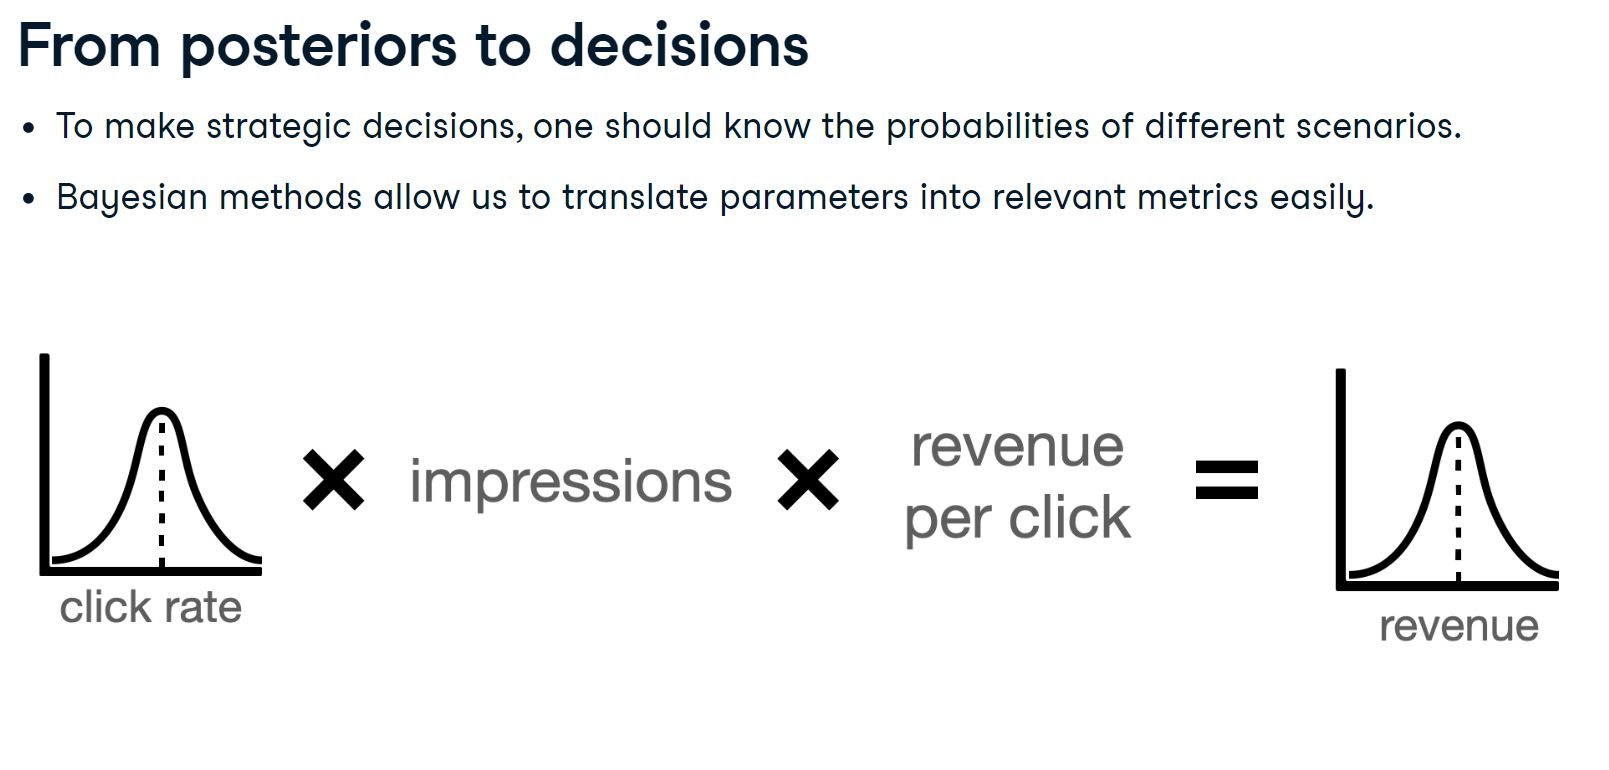

You can multiply each draw from the posterior with the number of impressions, that is the number of people to whom the ad will be displayed. This way, you get a ***distribution*** of the number of clicks instead of the click-through rate. You can then multiply the result with the expected revenue per click, a metric the company already knows. As a result, you obtain a posterior distribution of the revenue generated by the clicks.

Notice how capturing uncertainty via probability distributions has been translated from model parameters to a business-relevant metric! Based on the outcome, the decision-makers know what revenue to expect, as well as what's the worst-case scenario and how probable it is, and they can decide accordingly.

Say you have simulated posterior draws of the click rates for two ads: A and B. You are going to display the ads to 1000 users. The expected revenue from one click, however, is different for each ad, as they advertise different products. For ad A, it's $3-point-6 and for ad B it's $3. To get the distribution of the number of clicks for both ads, you can multiply the posterior with the number of impressions. Then, multiply the outcome with the revenue per click to get the distribution of the total revenue.

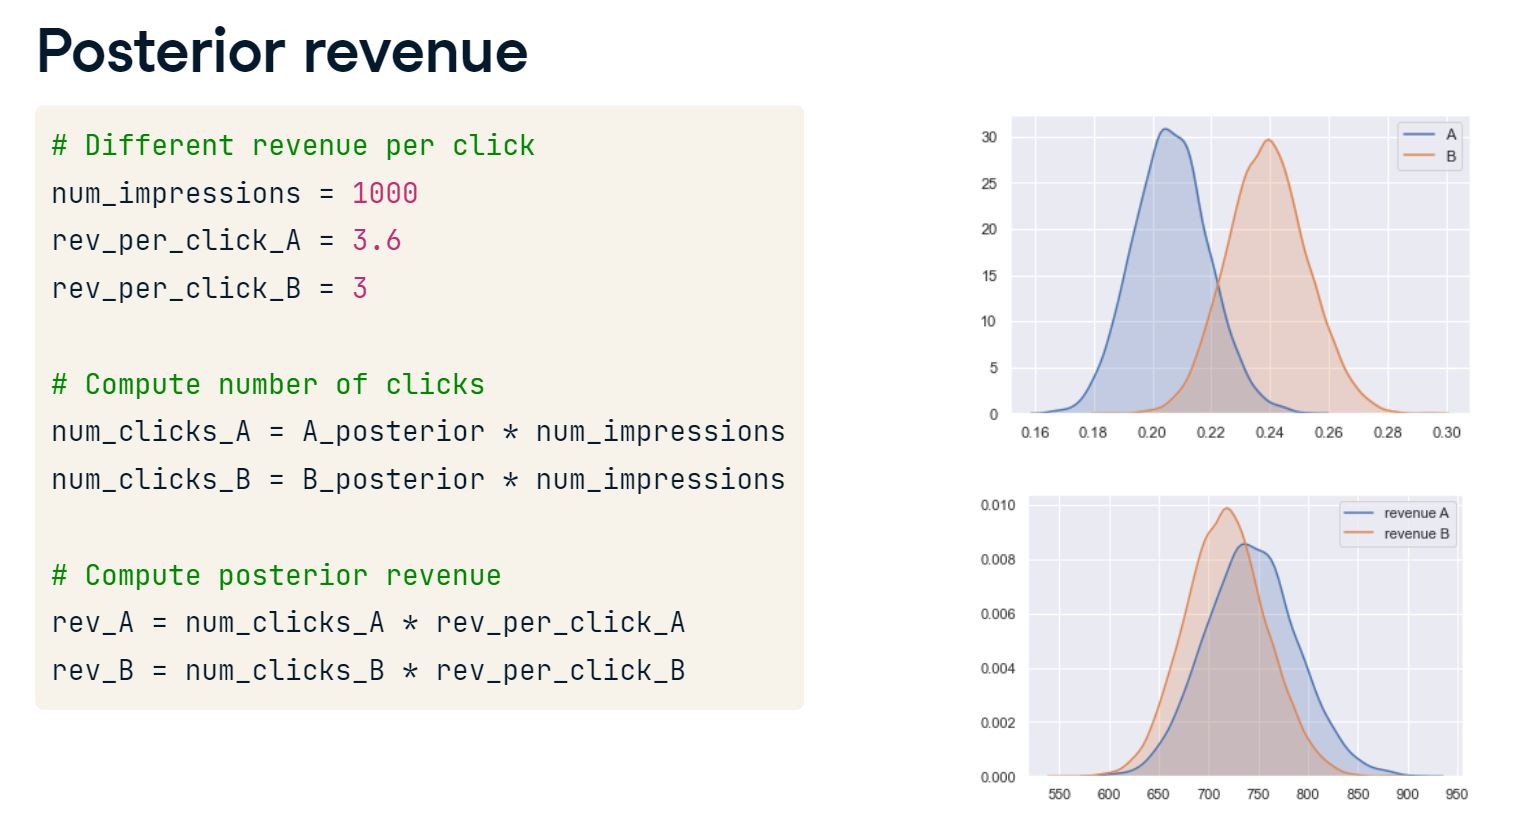

`Forest plot`
 
 Plotting multiple density plots using Seaborn is not very convenient and gets crowded. The solution is to use a [forest plot](https://pymc3-testing.readthedocs.io/en/rtd-docs/api/plots.html#pymc3.plots.forestplot) which is included with **pymc3**. 
 
 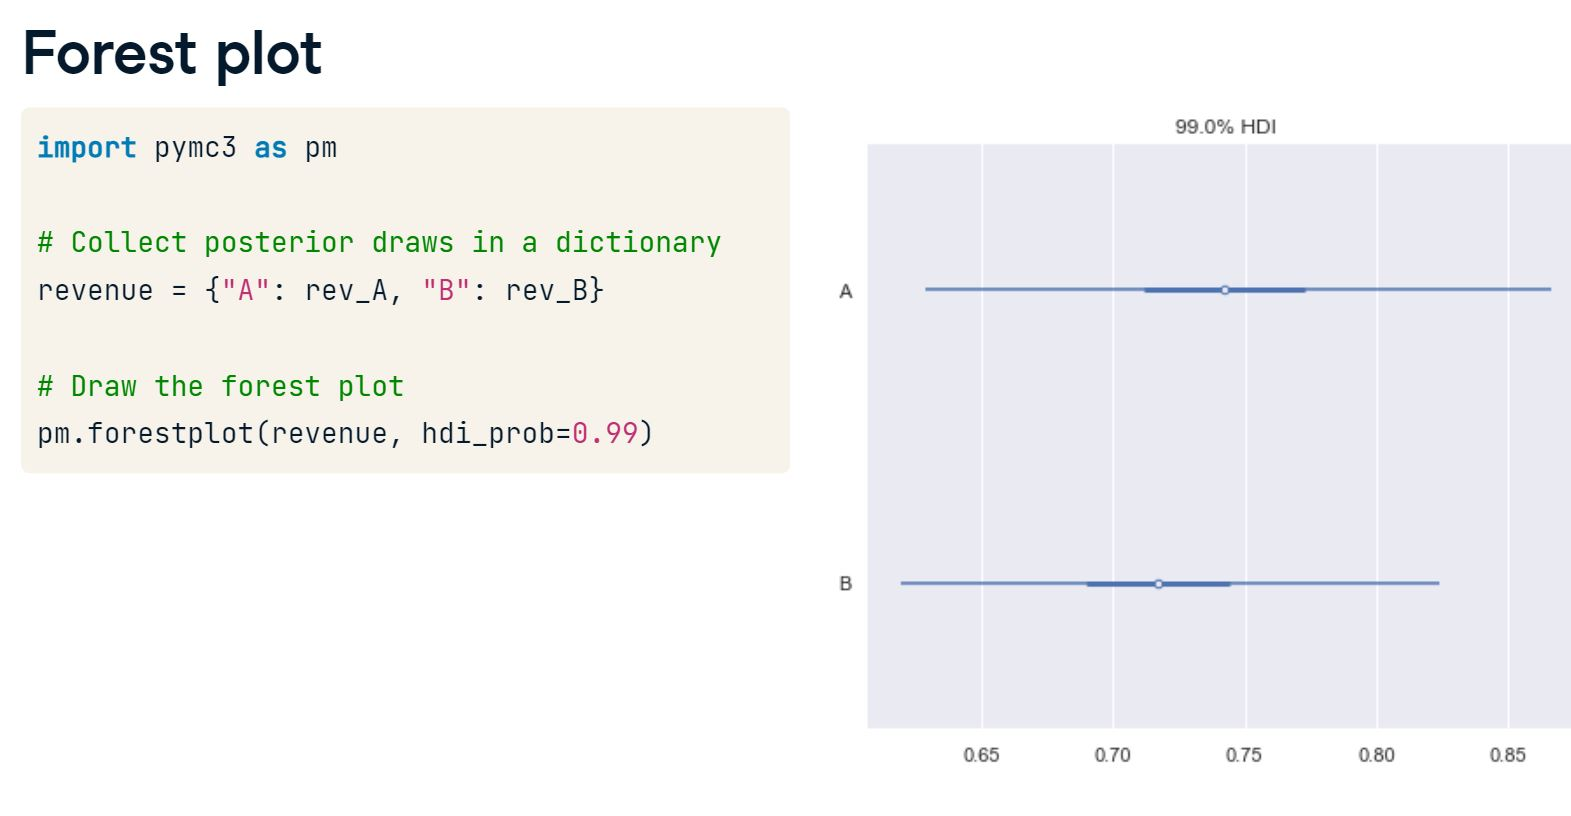

#### 3.2.1 Decision analysis: cost

We have already calculated the posterior click rates for clothes and sneakers ads, however, we would like to quantify the cost of rolling out an ad campaign to 10,000 users. The company's advertising partner charges £2.50 per click on a mobile device and £2 on a desktop device.
We are interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

In [67]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [68]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10_000
sneakers_num_clicks = sneakers_posterior * 10_000

In [69]:
# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

/home/stephen137/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/stephen137/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/stephen137/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/stephen

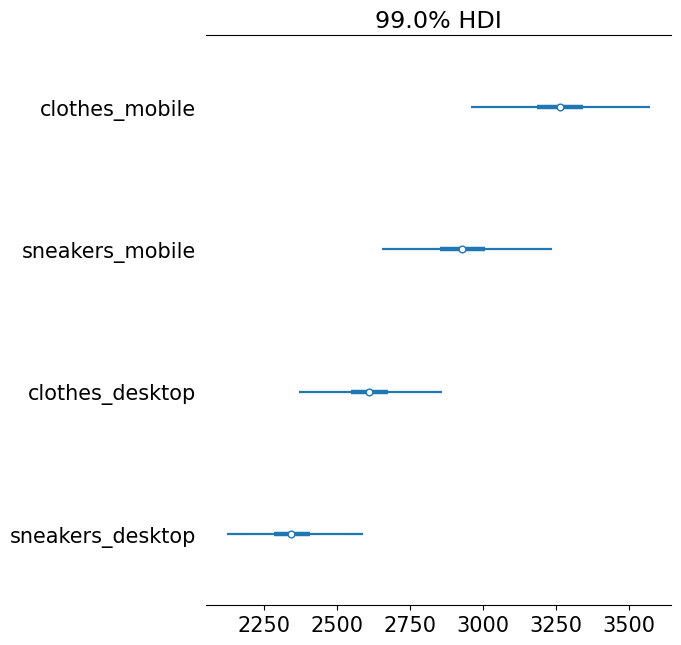

In [71]:
# Draw a forest plot of ads_costs
pm.plot_forest(ads_costs, hdi_prob=0.99, textsize=15)
plt.show()

>**The cost estimate for the clothes campaign on mobile devices is more uncertain than the one for desktop devices.**

>**If the goal was to reduce the costs, then going for the sneakers campaign on desktop devices would be a good decision.**

The ends of the whiskers mark the 99% credible interval, so there is a 1% chance the cost will fall outside of it. It's very, very unlikely, but there is a slim chance that the clothes-mobile cost will turn out lower.

It's important to stay cautious when communicating possible scenarios -- that's the thing with probability, it's rarely the case that something is ***completely impossible***.

#### 3.2.2 Decision analysis: profit

A new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. We need to adjust our findings accordingly, knowing that the expected revenue per click from a mobile ad is £3.40, and the one from a desktop ad is £3. 

/home/stephen137/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/stephen137/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/stephen137/anaconda3/envs/pymc_env/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/forestplot.py:545: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  for _, sub_data in grouped_datum:
/home/stephen

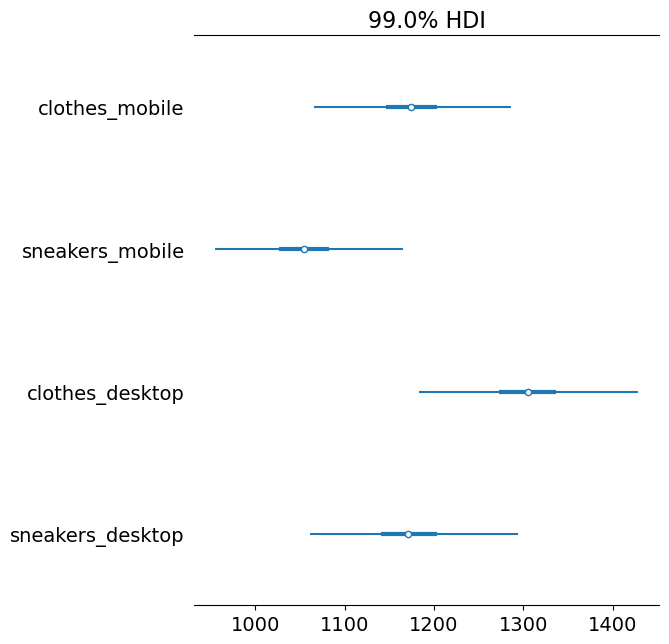

In [72]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 3.4 - ads_costs["clothes_mobile"],
    "sneakers_mobile": sneakers_num_clicks * 3.4 - ads_costs["sneakers_mobile"],
    "clothes_desktop": clothes_num_clicks * 3 - ads_costs["clothes_desktop"],
    "sneakers_desktop": sneakers_num_clicks * 3 - ads_costs["sneakers_desktop"],
}

# Draw a forest plot of ads_profit
pm.plot_forest(ads_profit, hdi_prob=0.99)
plt.show()

Notice how shifting focus from costs to profit has changed the optimal decision. 

>**The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign.**

### 3.3 Regression and forecasting

In a linear regression model we are modeling the response, y, as a linear combination of some predictors, x. We can model sales as a function of marketing spending, for instance. 

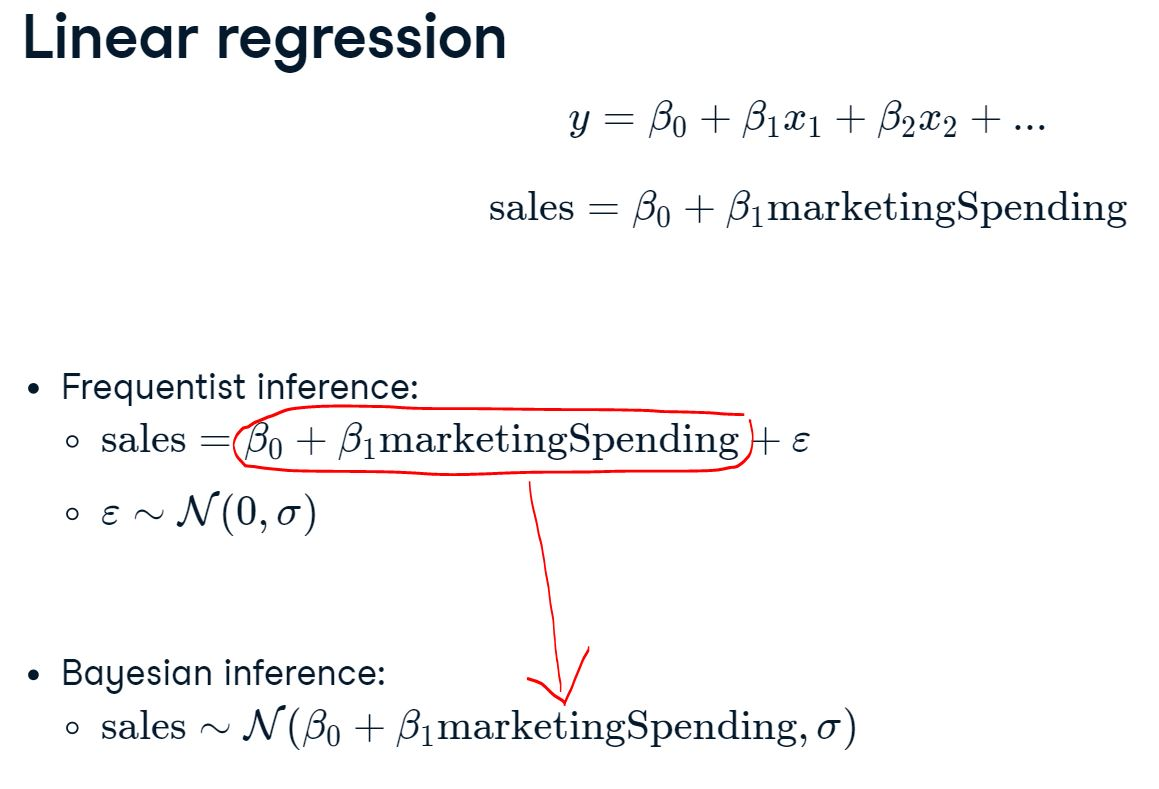

The intercept, $B_0$ is sales level without any spending, and $B_1$ denotes the impact of marketing spending on sales. In the frequentist world, betas are single numbers and we cannot find values for them that would make the equation always hold. Consequently, we add an error term denoted by the Greek letter **$\epsilon$** and say that this error term has a normal distribution with mean zero and some standard deviation, $\sigma$.

In the Bayesian world, we treat the response as a random variable, and assume that it has a normal distribution with the mean defined by the regression equation and some standard deviation. Let's take a closer look at the normal distribution.

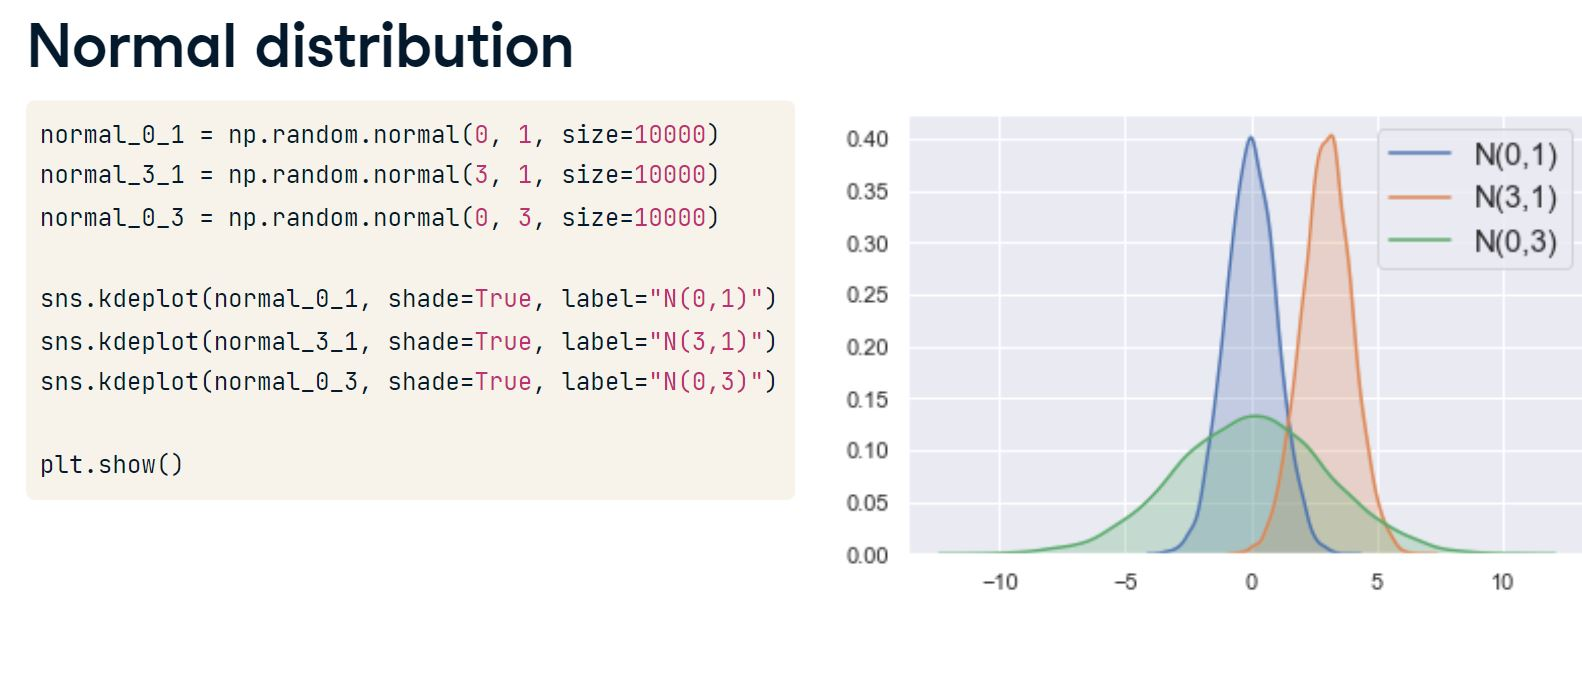

Let's now define our Bayesian regression model. 

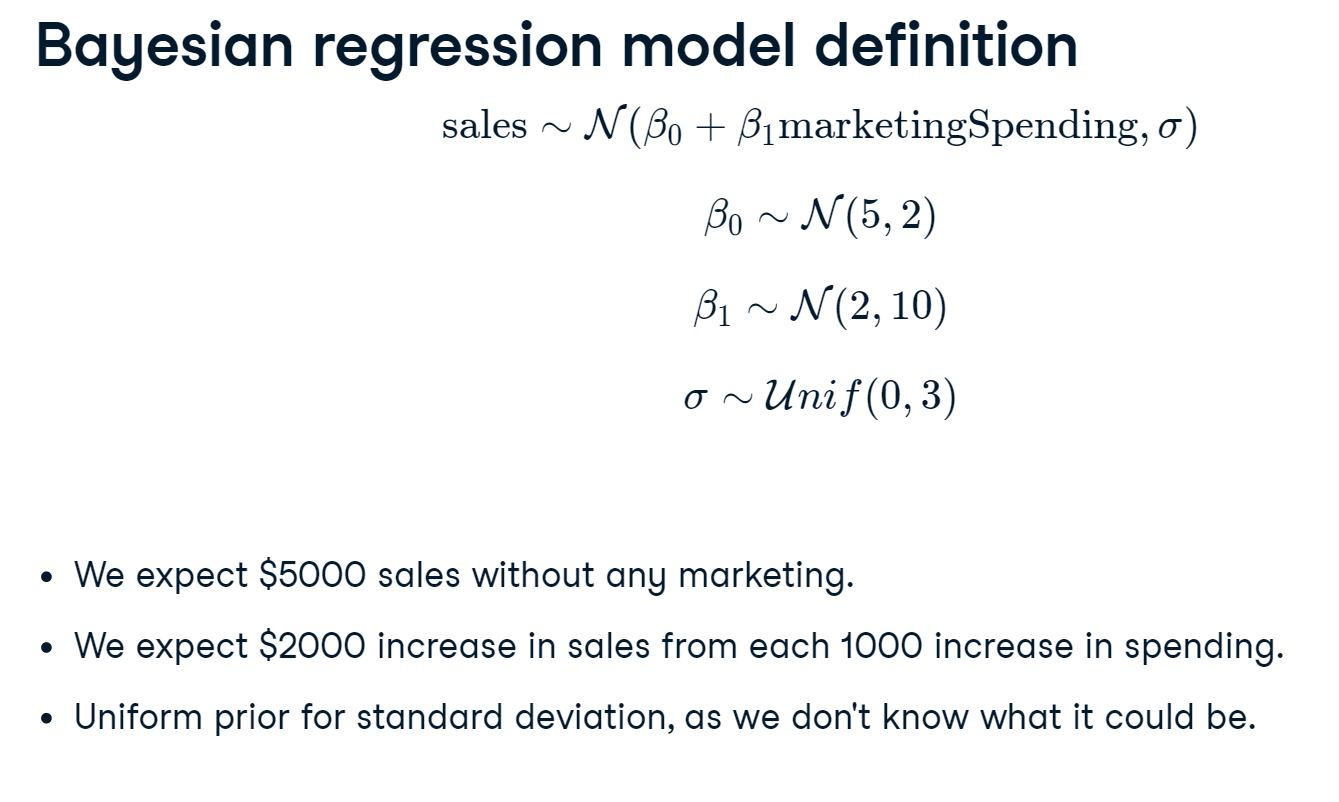

We have already said that sales are normally distributed but a full model specification also requires the priors for all 3 parameters: 

- the intercept $B_0$ (sales without any spending)
- the spending impact $B_1$ (increase in sales due to marketing spend)
- the standard deviation $\epsilon$ (error term (noise) )

We could use many priors, but let's use normal ones for the betas. Assume sales and spendings are in thousands of pounds. First, we expect £5,000 sales without any marketing. Also, we expect £2,000 increase in sales from each £1,000 increase in spending, but are not certain, so we make the prior for $B_1$  wider by setting its standard deviation to 10. We don't have any feelings about the regression standard deviation parameter, sigma, so we use the uniform prior.

How to get the posteriors? Grid approximation could work, but is impractical for more than one parameter. We could choose conjugate priors so that we can simulate from the posterior, but the conjugate priors for linear regression are not very intuitive. And we want our priors. Fortunately, we can simulate from the posterior even with non-conjugate priors using the `Markov Chain Monte Carlo` technique.

A good practice is to analyze the posterior draws visually before we make any predictions with the model. Let's introduce another function from pymc3 called `plot_posterior()`. You pass it the draws and set the credible interval, and it plots the density, marking its mean and the interval.

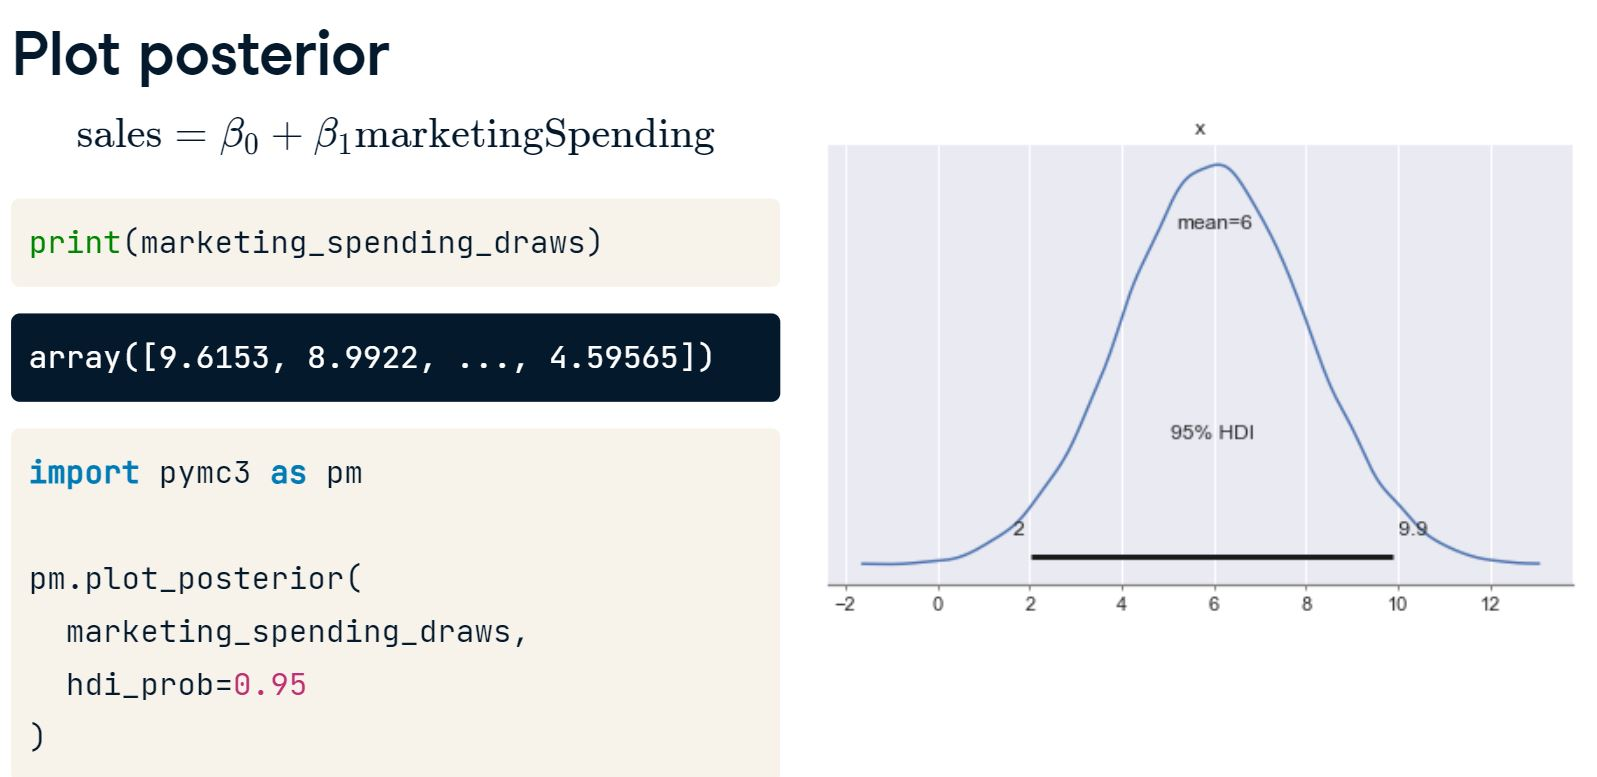

With many parameters, it's convenient to look at all of them at once. Once you have all three parameters sampled, you can collect them in a DataFrame and use the `.describe()` method, which allows us to inspect the descriptive statistics of the posterior draws.


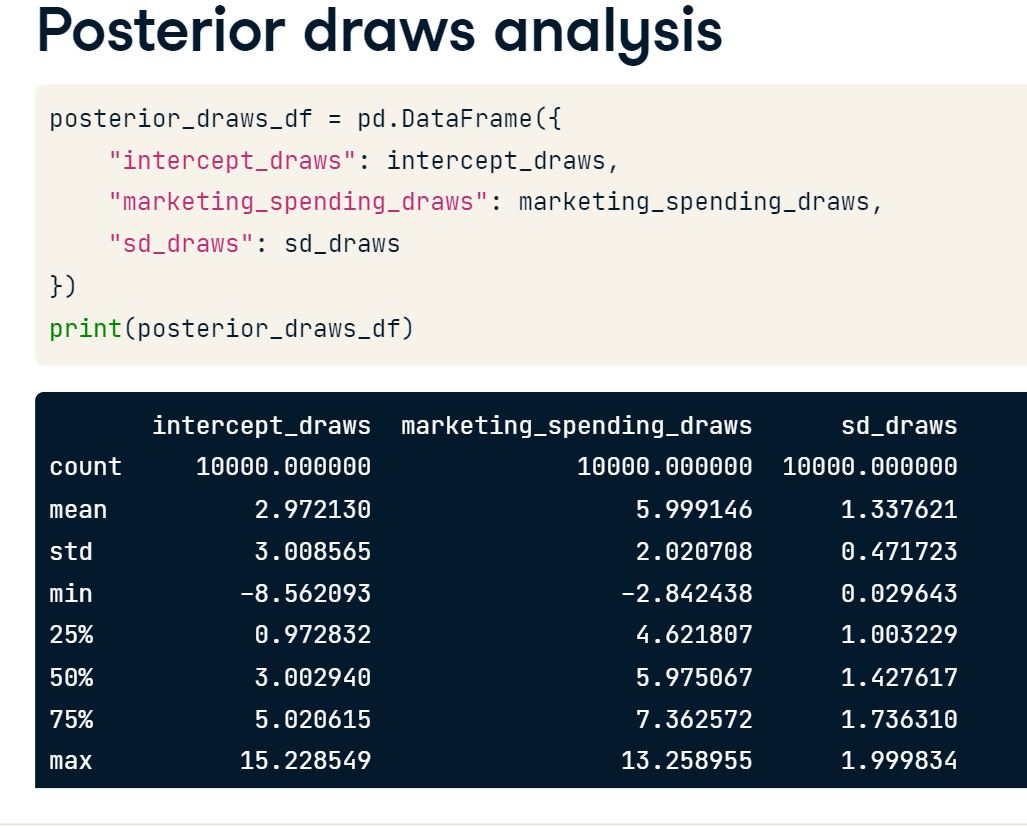

Time to make predictions. 

> **How much sales can we expect if we spend £1,000 on marketing?**

To calculate it, we first get the point estimates of the parameters, in this case the posterior mean. Then, we calculate the mean of the sales distribution according to the regression formula, setting 1,000 as the marketing spending. Finally, we simulate from the predictive distribution to get the sales forecast.

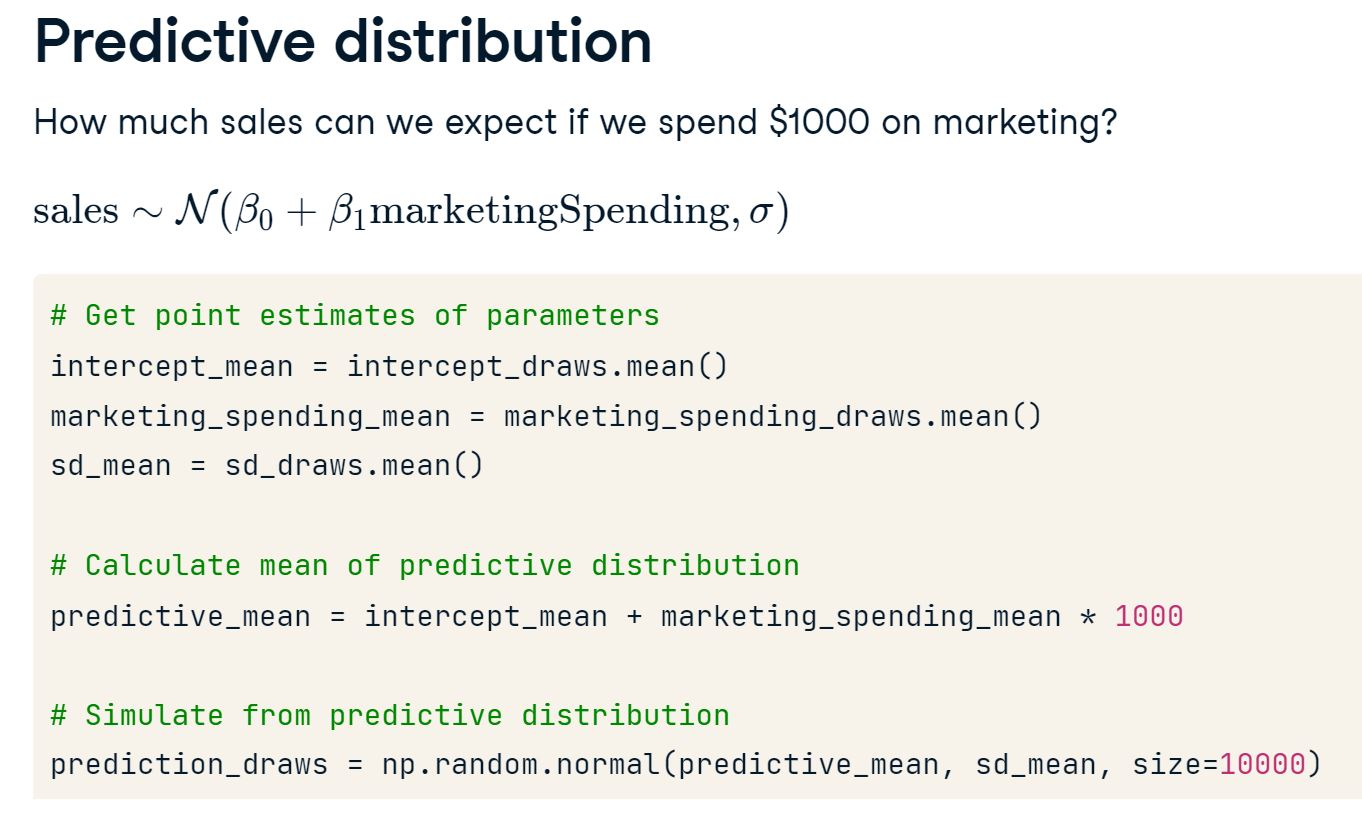

And here is the result. With £1,000 marketing spending, we can expect slightly less than £6,000 in sales.

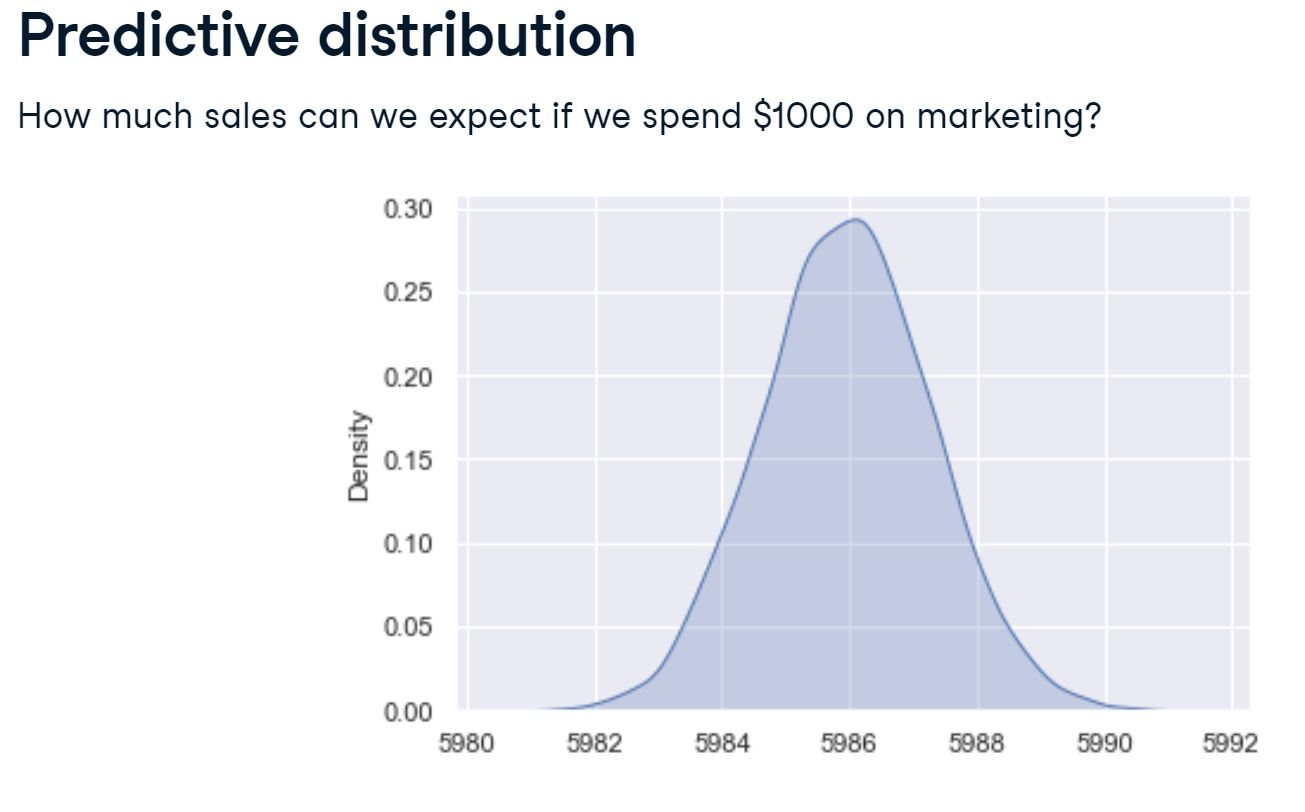

#### 3.3.1 Defining a Bayesian regression model

You have been tasked with building a predictive model to forecast the daily number of clicks based on the numbers of clothes and sneakers ads displayed to the users. You decide to use Bayesian linear regression. You've defined your model as follows:

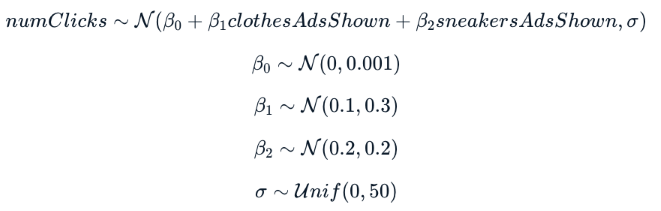

> **With no ads displayed, we don't expect any clicks ($B_0$ = 0)**

> **We expect the sneakers ad to have a higher click rate than the clothes ad ($B_2$ value of 0.2 > $B_1$ value of 0.1)**

> **We are more certain about our prior knowledge of the sneaker's ad's impact on the number of clicks ($B_1$ std deviation value of 0.2 < $B_1$ standard deviation value of 0.3)**


#### 3.3.2 Analyzing regression parameters

Our linear regression model has four parameters:

- the intercept
- the impact of clothes ads
- the impact of sneakers ads
- the variance

Before we make predictions with our model, it's a good practice to analyze the posterior draws visually. Let's first take a look at the descriptive statistics for each parameter's draws, and then visualize the posterior distribution for one of them as an example.

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
posterior_draws_df = pd.read_csv('data/posterior_draws.csv')

In [75]:
# obtain summary statisics
draws_stats = posterior_draws_df.describe()
draws_stats

intercept_draws  clothes_draws  sneakers_draws     sd_draws
count      2000.000000    2000.000000     2000.000000  2000.000000
mean          1.280420       0.104594        0.103594     2.651661
std           0.903845       0.030282        0.031596     0.159491
min          -2.088446      -0.007500        0.001084     2.211899
25%           0.712354       0.085381        0.081577     2.543340
50%           1.288362       0.104680        0.103554     2.639033
75%           1.849244       0.123830        0.125466     2.754714
max           4.343638       0.229886        0.211751     3.278124

In [ ]:
# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob=0.99)
plt.show()

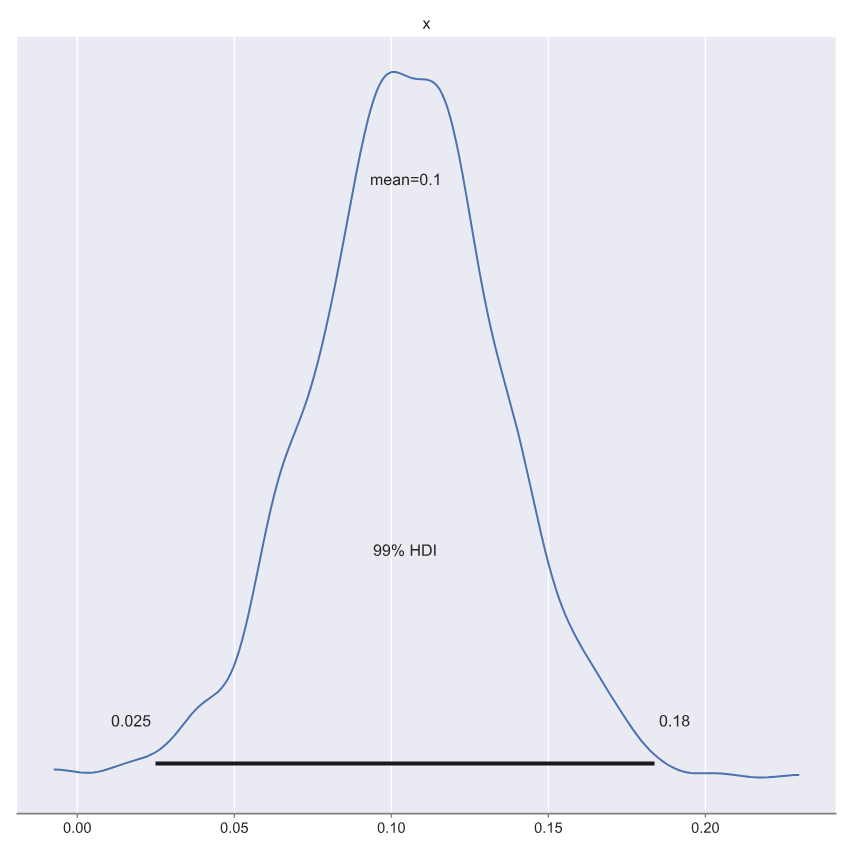

The impact parameters (mean values from the summary statistics) for both clothes and sneakers look okay: they are positive, most likely around 0.1, indicating 1 additional click from 10 ad impressions, which makes sense. Let's now use the model to make predictions!

#### Predictive distribution

Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, we will have to draw from the predictive distribution, a normal distribution with:

- the mean defined by the linear regression formula
- the standard deviation estimated by the model

First, we will summarize each parameter's posterior with its mean, then calculate the mean of the predictive distribution according to the regression equation. Next, we will draw a sample from the predictive distribution and finally, plot its density. 

Here is the regression formula for your convenience:

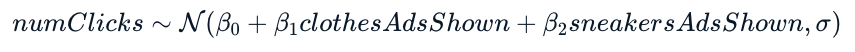

In [ ]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = intercept_draws.mean()
sneakers_coef = sneakers_draws.mean()
clothes_coef = clothes_draws.mean()
sd_coef = sd_draws.mean()

In [ ]:
# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + (clothes_coef * 10) + (sneakers_coef * 10)

In [ ]:
# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

In [ ]:
# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
plt.show()

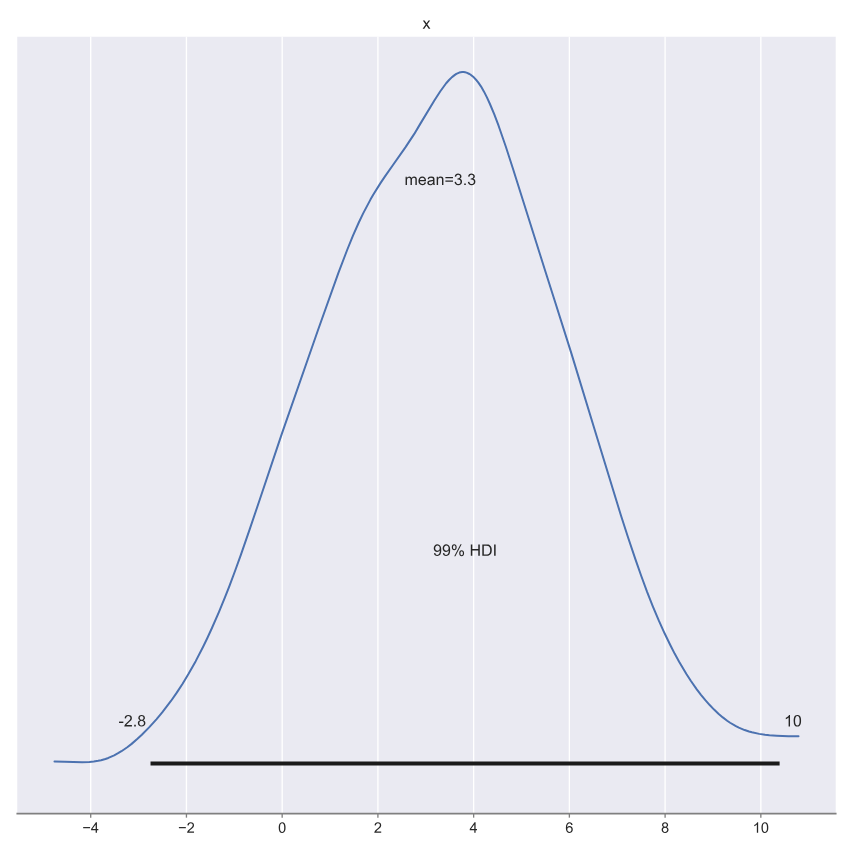

It looks like we can expect more or less three or four clicks if we show 10 clothes and 10 sneaker ads. 

## 4. Bayesian linear regression with pyMC3

In this final section, we will leverage the powerful PyMC3 package to easily fit Bayesian regression models, conduct sanity checks on a model's convergence, select between competing models, and generate predictions for new data. We'll wrap up by applying what we have learned to find the optimal price for avocados in a Bayesian data analysis case study.

### 4.1 Markov Chain Monte Carlo (MCMC) and model fitting

We've seen two ways of sampling posterior draws: grid approximation and choosing conjugate priors and sampling from a known posterior, each with their own limitations. In practice, another method is usually used: `Markov Chain Monte Carlo, or MCMC`, which allows us to sample even from unknown posteriors. All three methods yield the same results, but MCMC is the most flexible - it works with any model and any priors. Let's look at its two building blocks: `Monte Carlo` and `Markov Chains`.

Monte Carlo is a way to approximate a quantity by generating random numbers. Consider a circle with radius 5. From the formula, we know its area to be 78.5. But how might we approximate the area without the formula?

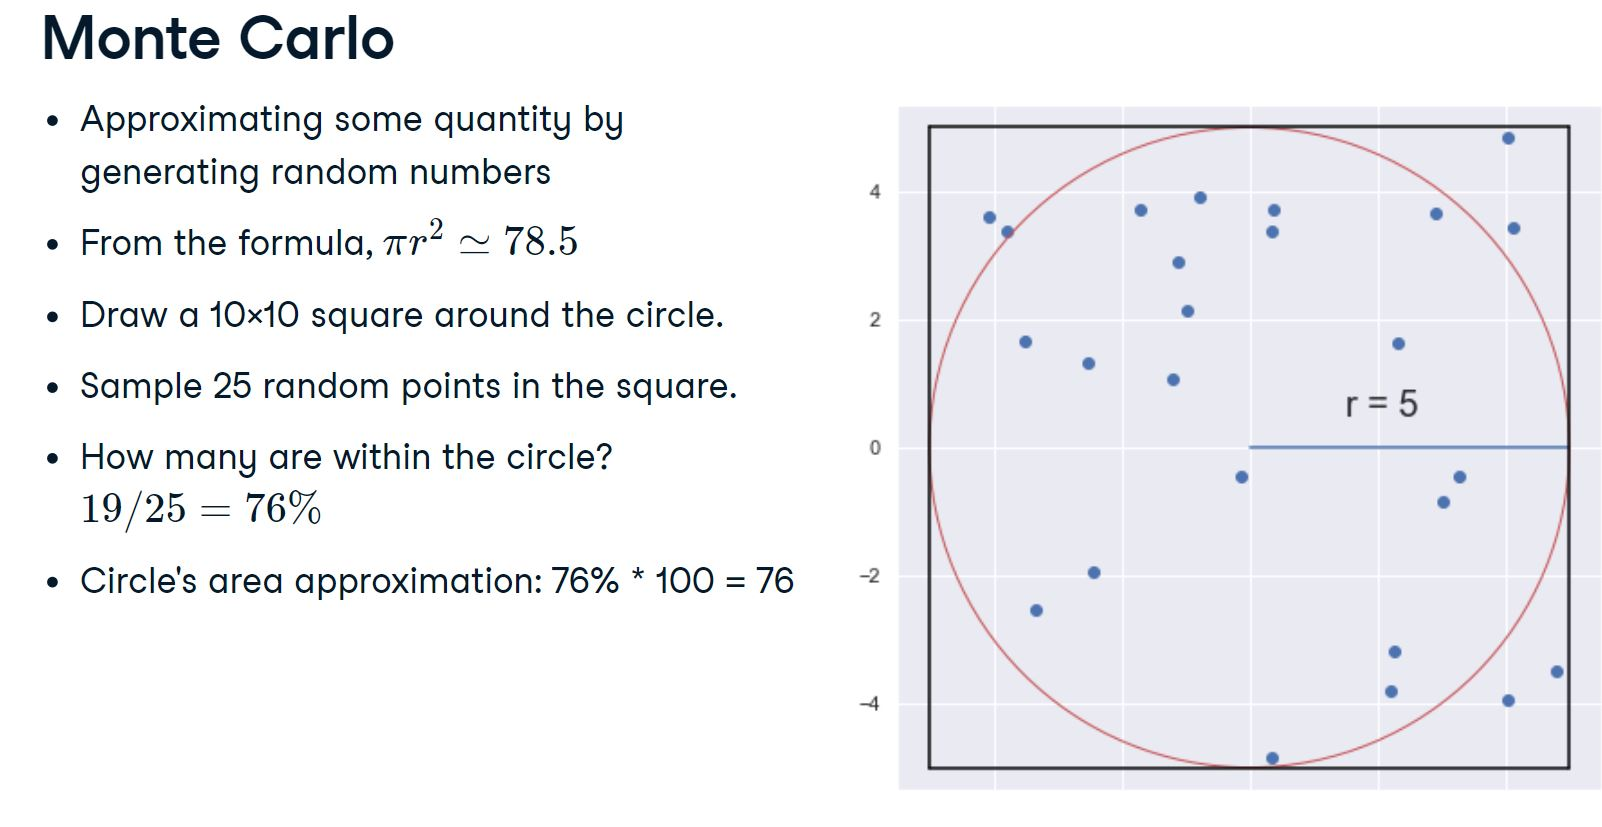

Now, to Markov Chains. They are models of a sequence of states, between which one transitions with given probabilities. Imagine a bear that only hunts, eats and sleeps. The table shows the probabilities of transitioning between these three states. From the first row we see that if the bear is hunting now, there is a 10% probability it will hunt or sleep next, and an 80% probability it will eat.

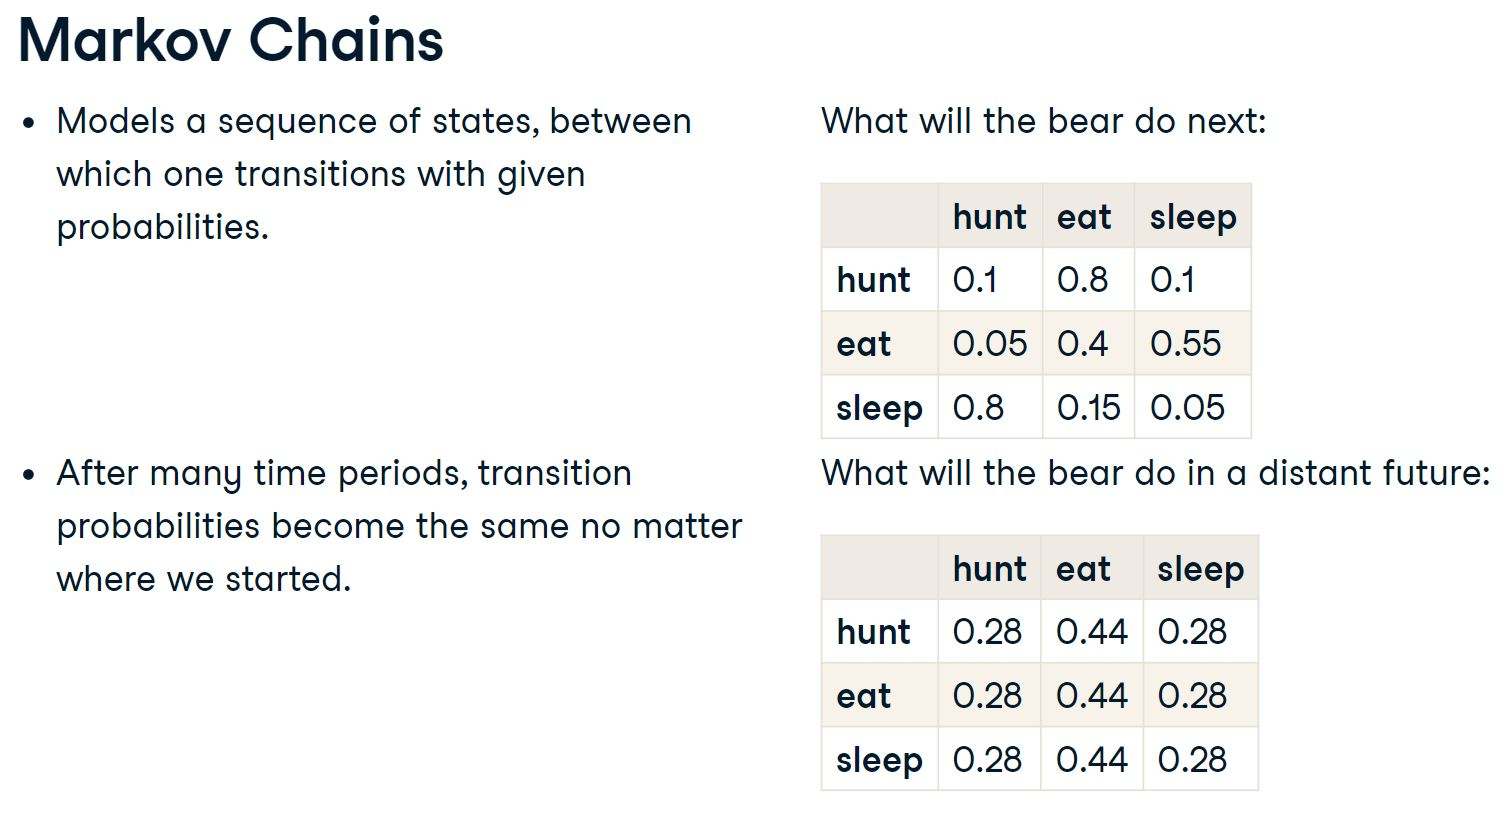

Some Markov Chains have a property that, after transitioning between states many times, they will reach a so-called steady state. This means that no matter where the bear started, the probabilities for it to be in particular states in a distant future are the same.

There are many MCMC samplers, but all work in a similar fashion. 

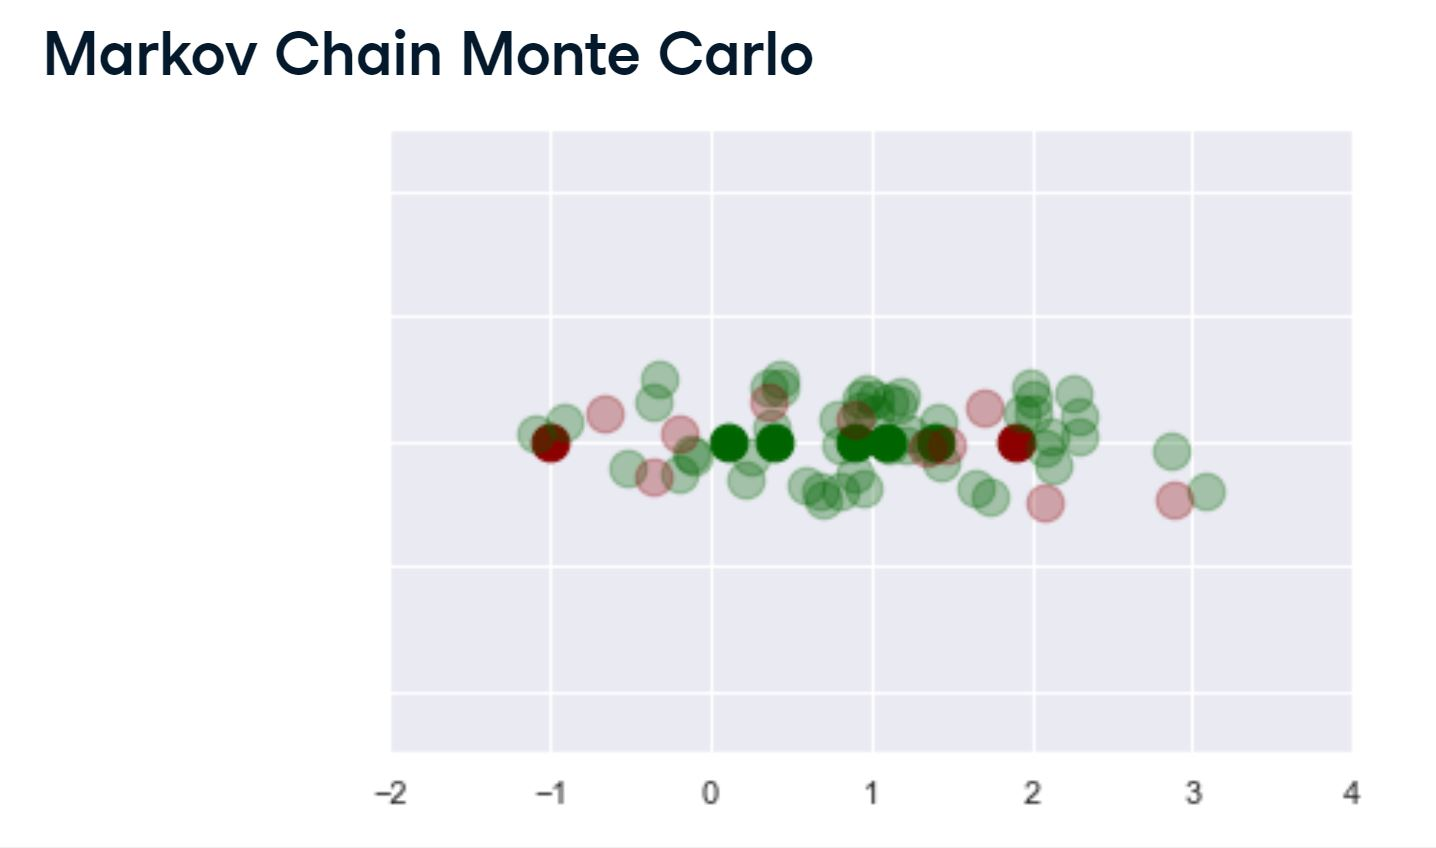

To get posterior draws for a parameter, we start by generating a random point. Then another one, close to the first - that's the `Monte Carlo` part, random generation. Then, we check how well this new point explains our data, or: what's the likelihood with this value of the parameter. Then, we either accept or reject this new point. The better it explains the data, the higher the probability that we accept it. Here, the new point explains our data well, and we accept it, which I denote by green. Next, we sample another point, close to the last accepted point. However, it doesn't explain the data well enough, so we reject it, denoted by red. But we accept the next one. And the next three. 

Eventually we have many accepted points. This generates a `Markov Chain`, and the probabilities of sampling specific values converge to the steady state, which is our ***posterior distribution***. Finally, we discard some number of first draws, called ***burn-in***, sampled before the Markov Chain has converged, since they are simply random. The remaining ones are our posterior draws.

Here is the previous ads data. We want to predict `num_clicks` with a regression model using `clothes_banners_shown` and `sneakers_banners_shown`.

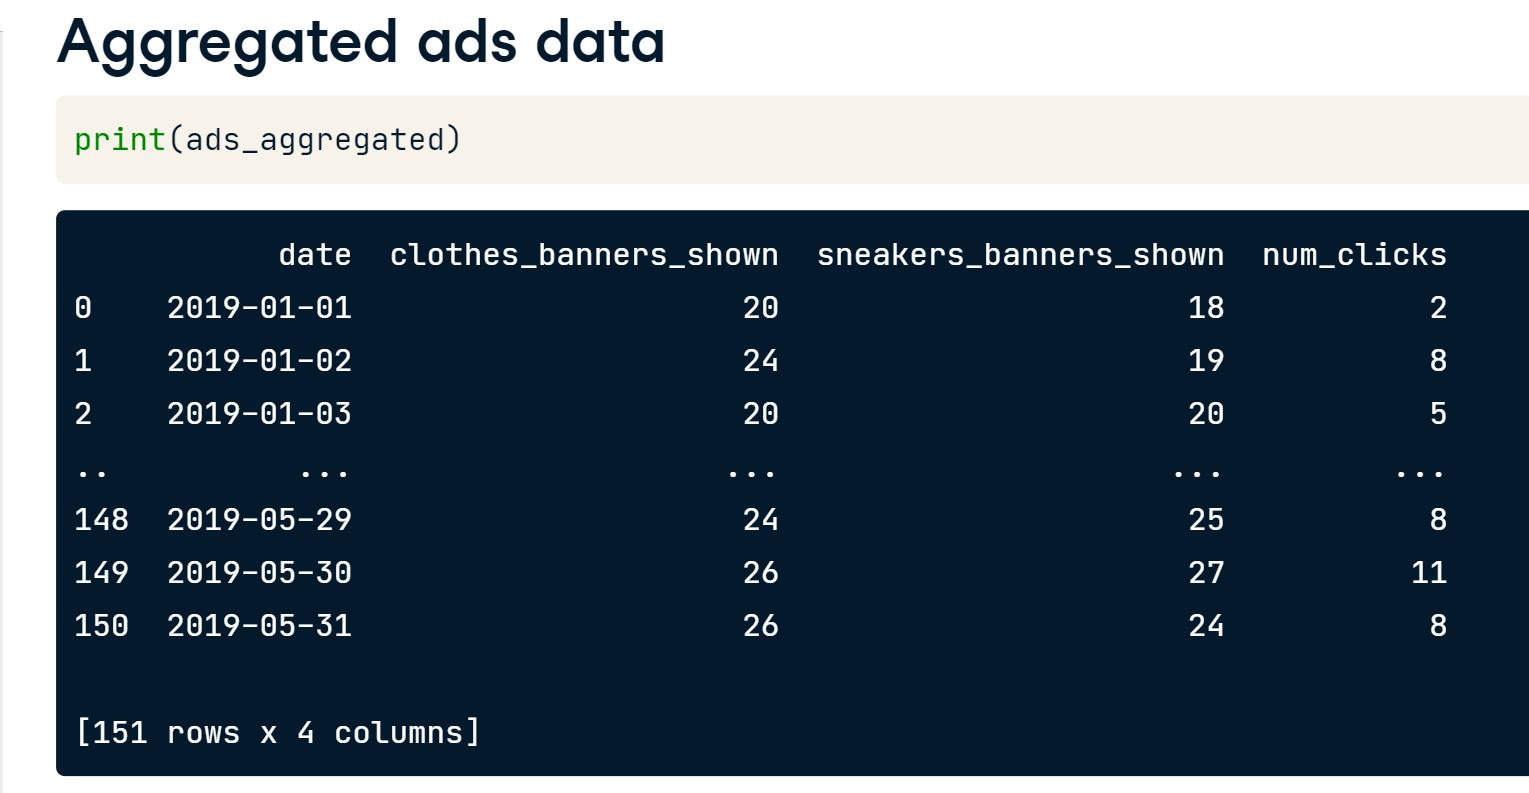

- we start by defining the regression formula, consisting of the response, a `tilde` sign, and the predictors separated with pluses.
- we open the `with` statement with `pymc3.model()` instance as the model.
- inside it, we define the model by calling `pm.GLM.from_formula()` with the formula and the data passed as arguments. GLM stands for generalized linear model, a class of models that includes linear regression. We could define the priors and the likelihood here, but the defaults are good for linear regression. 
- we can print the model to see the priors for the parameters, and at the bottom, the normal likelihood for our target variable. 
- Finally, we call `pm.sample()` to generate 1000 valid draws, and 500 burn-in draws, set by the tune parameter. This output is conventionally called a trace.

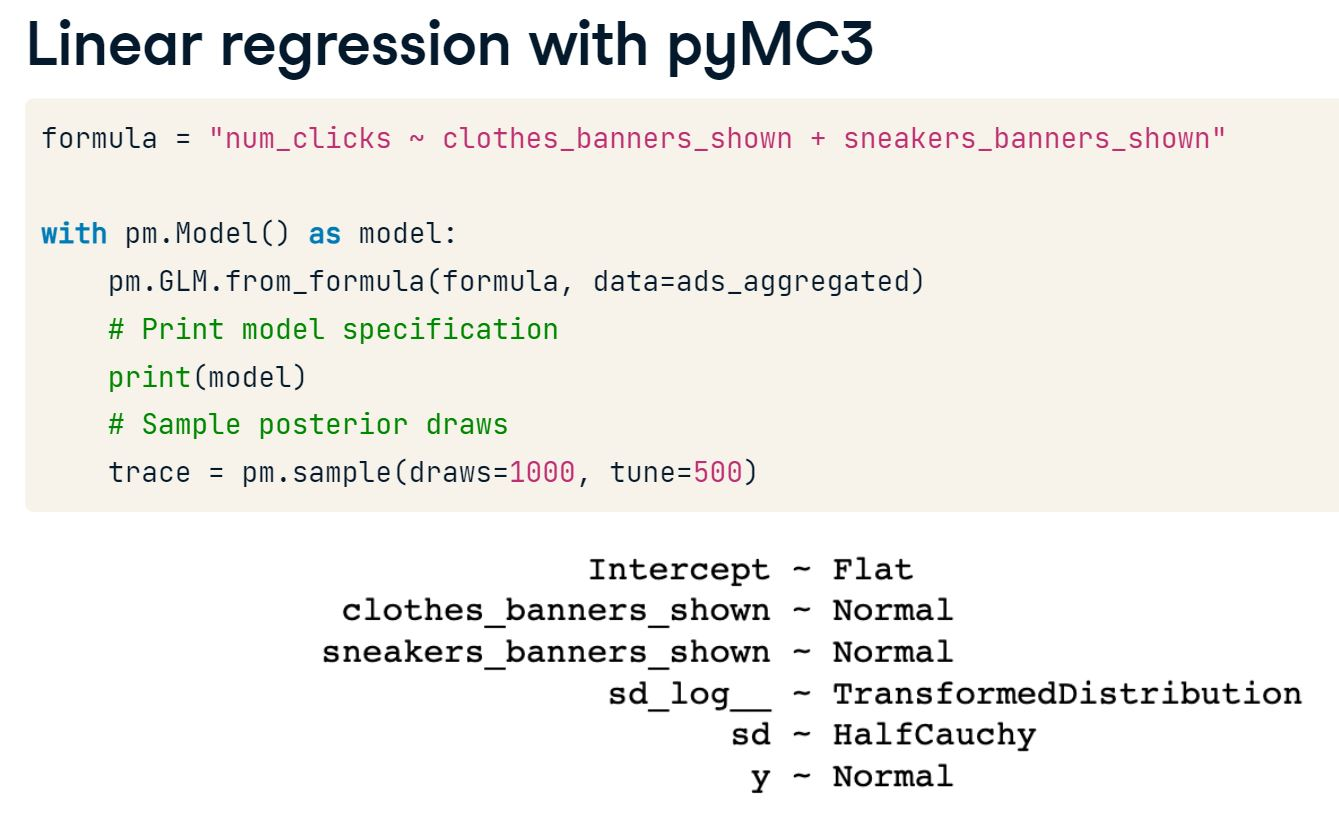



#### 4.1.1 Markov Chain Monte Carlo

Markov Chain Monte Carlo, or MCMC, combines the concepts of Monte Carlo sampling with Markov Chains' property of converging to a steady state. This allows sampling draws from any, even unknown, posterior distribution. 

> **Monte Carlo is a way to approximate some quantity by generating random numbers**

> **Using MCMC to get posterior draws will give the same results as using grid approximation or sampling from the posterior directly (if it's known)**

> **Numbers generated by MCMC become draws from the posterior after many samples thanks to Markov Chains' convergence property**

#### 4.1.2 Sampling posterior draws

We have been given some data on the number of rented vehicles per day, temperature, humidity, wind speed, and whether the day was a working day, and our task is to:

> **Predict the number of bikes rented per day to plan staff and repairs accordingly.**

In [79]:
bikes = pd.read_csv('data/bikes_test.csv')
bikes

work_day      temp  humidity  wind_speed  num_bikes
0         0  0.265833  0.687917    0.175996      2.947
1         1  0.282609  0.622174    0.153800      3.784
2         1  0.354167  0.496250    0.147379      4.375
3         1  0.256667  0.722917    0.133721      2.802
4         1  0.265000  0.562083    0.194037      3.830
5         1  0.280833  0.540000    0.116929      3.831
6         0  0.224167  0.731250    0.289796      2.169
7         0  0.127500  0.464583    0.409212      1.529
8         1  0.222500  0.411250    0.167283      3.422
9         1  0.319167  0.508750    0.141179      3.922

Let's build a regression model.

In [88]:
import pymc as pm
import bambi as bmb

data = pd.read_csv('data/bikes_test.csv')

# define the model
model_1 = bmb.Model("num_bikes ~ temp + work_day", data=data) # GLM stands for generalized linear model
    
print(model_1)
    
# generate 1000 valid draws, and 500 burn-in draws
results = model_1.fit()       

       Formula: num_bikes ~ temp + work_day
        Family: gaussian
          Link: mu = identity
  Observations: 10
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 3.2611, sigma: 10.2121)
            temp ~ Normal(mu: 0.0, sigma: 36.3957)
            work_day ~ Normal(mu: 0.0, sigma: 4.6058)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 0.8443)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [num_bikes_sigma, Intercept, temp, work_day]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


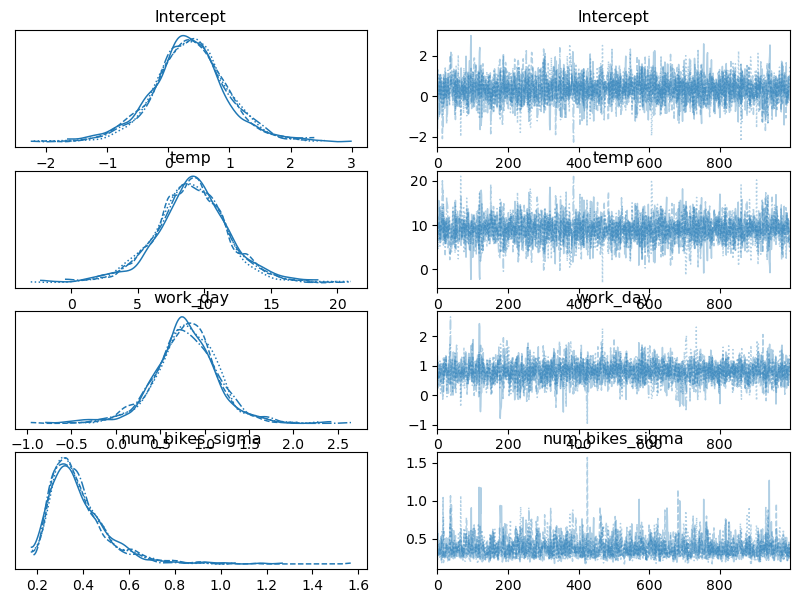

In [91]:
az.plot_trace(results, figsize=(10, 7));

### 4.2 Interpreting results and comparing models

Returning to our ads illustration:
    
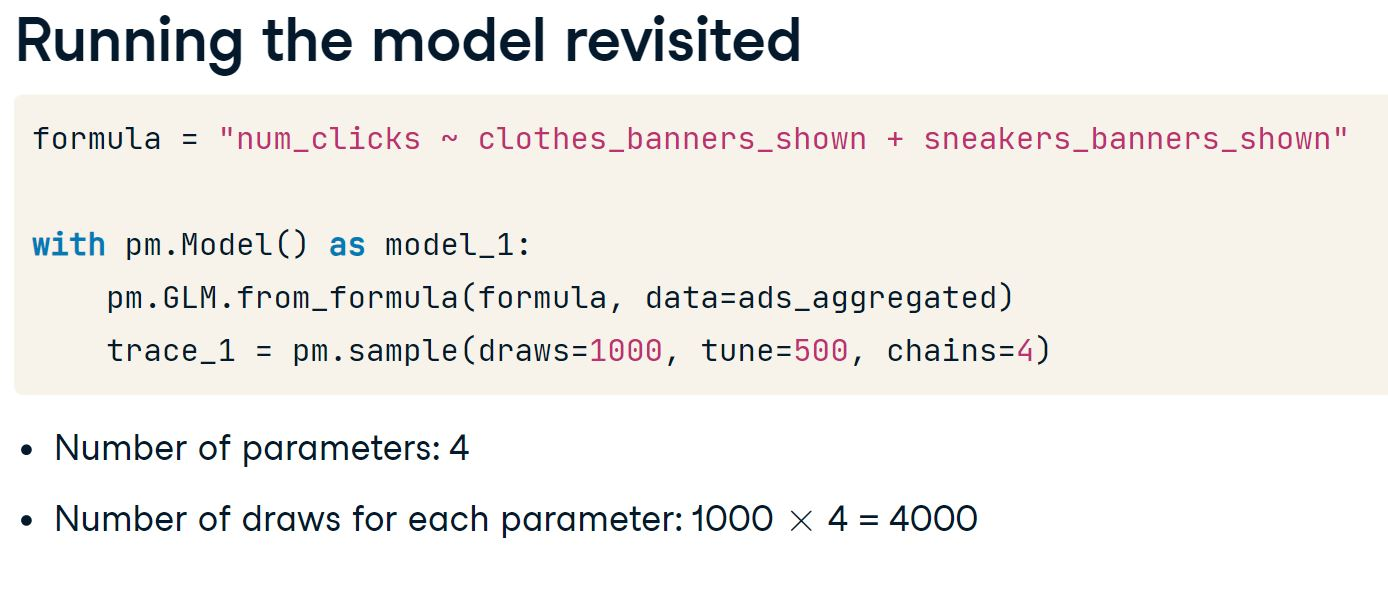

We have 4 parameters in the model: the intercept, two impact parameters, and the standard deviation. For each of them, we have 1000 draws per chain, and so we get 4000 posterior draws in total.

We can visualize our sampled draws by passing the trace to the `pm.traceplot()` function. It produces two subplots per parameter. 

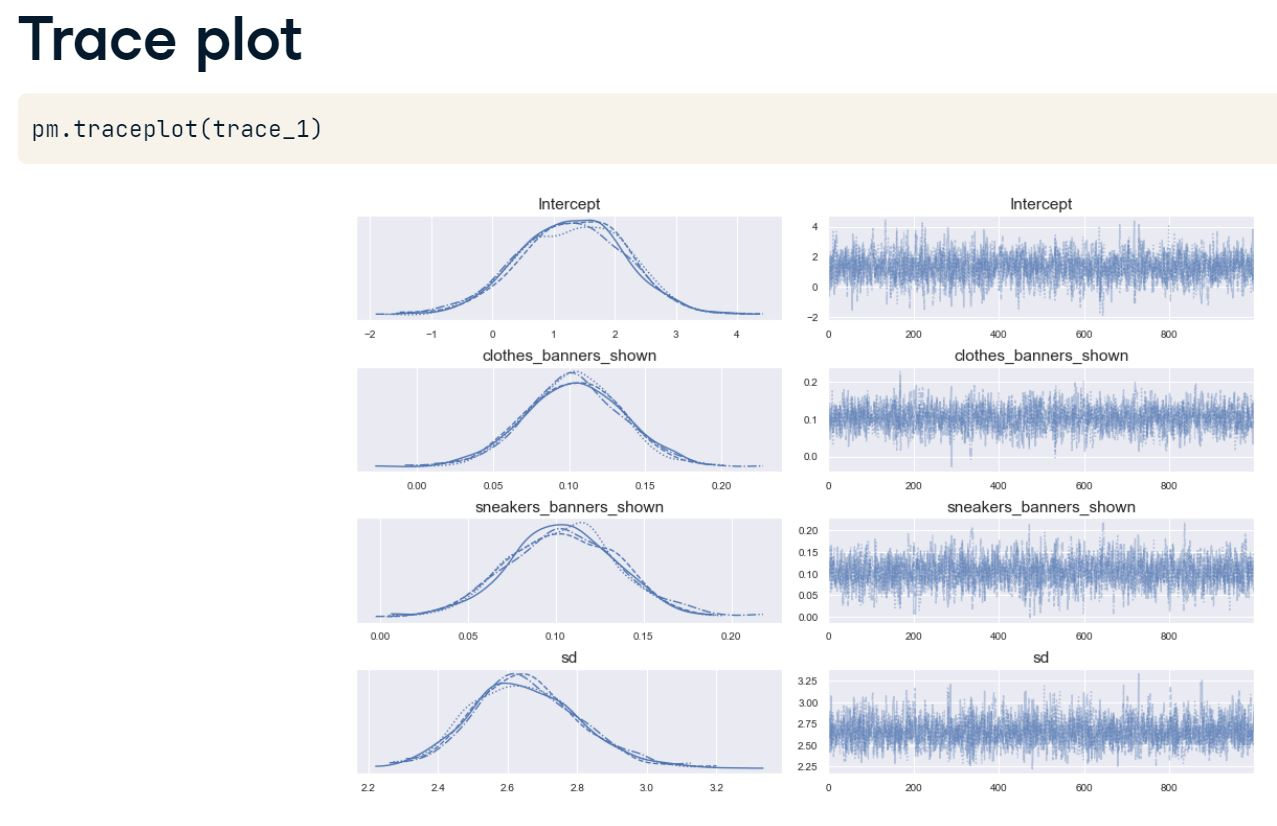

Let's zoom in at one of them:

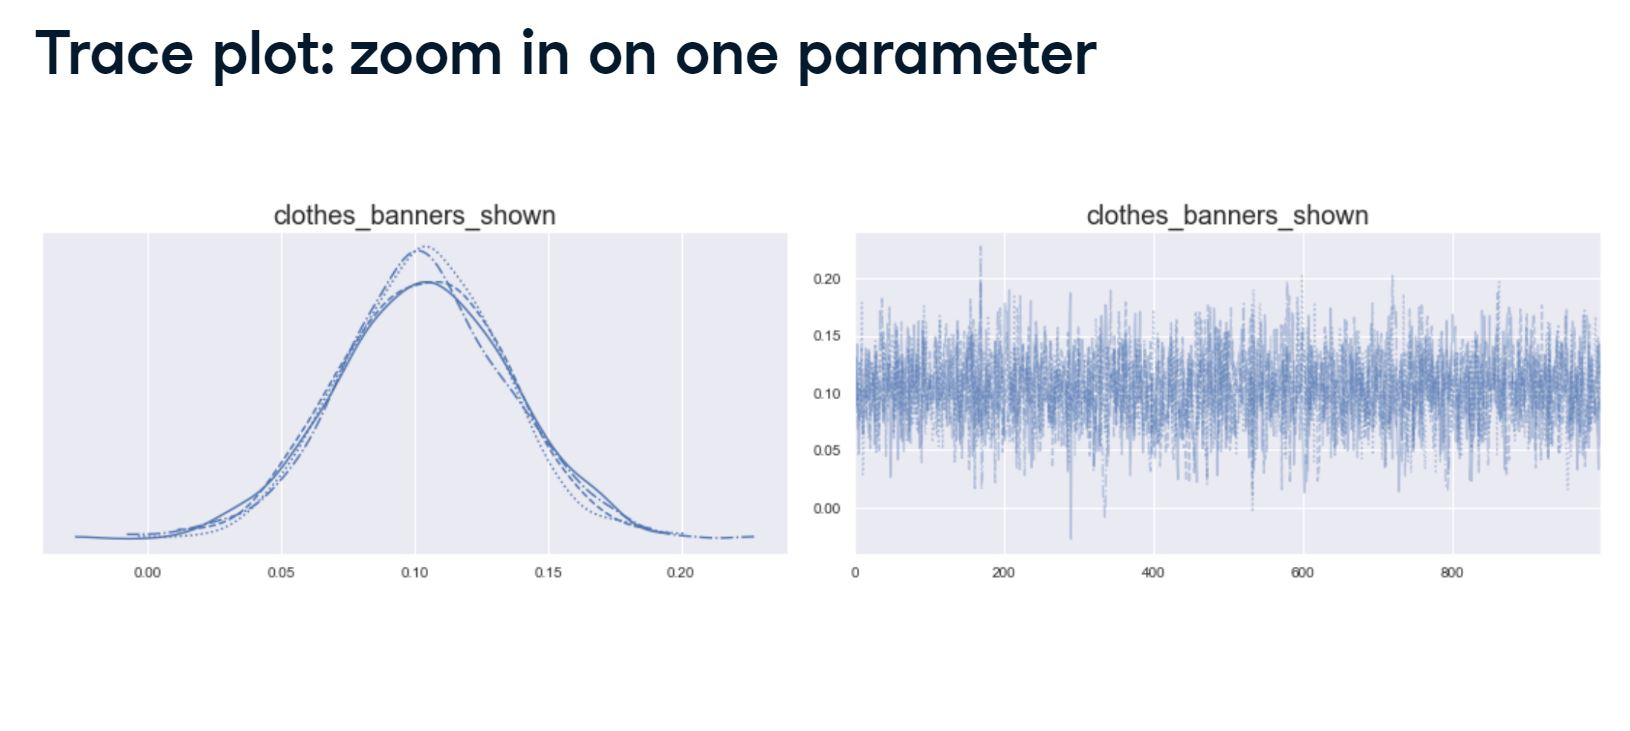

On the left, we have the posterior density plot. There are four lines on the plot, one for each chain. The fact that they are all similar indicates they are truly sampled from the right posterior. On the right, we have a line plot of all 4000 draws, separately for each chain. They oscillate closely around some constant average, which proves good convergence.

We can also pass the trace to the `pm.forestplot()` function. This time, it will show a separate line for each chain of each parameter. We see that except for the intercept, we are pretty confident about the other parameters' values.

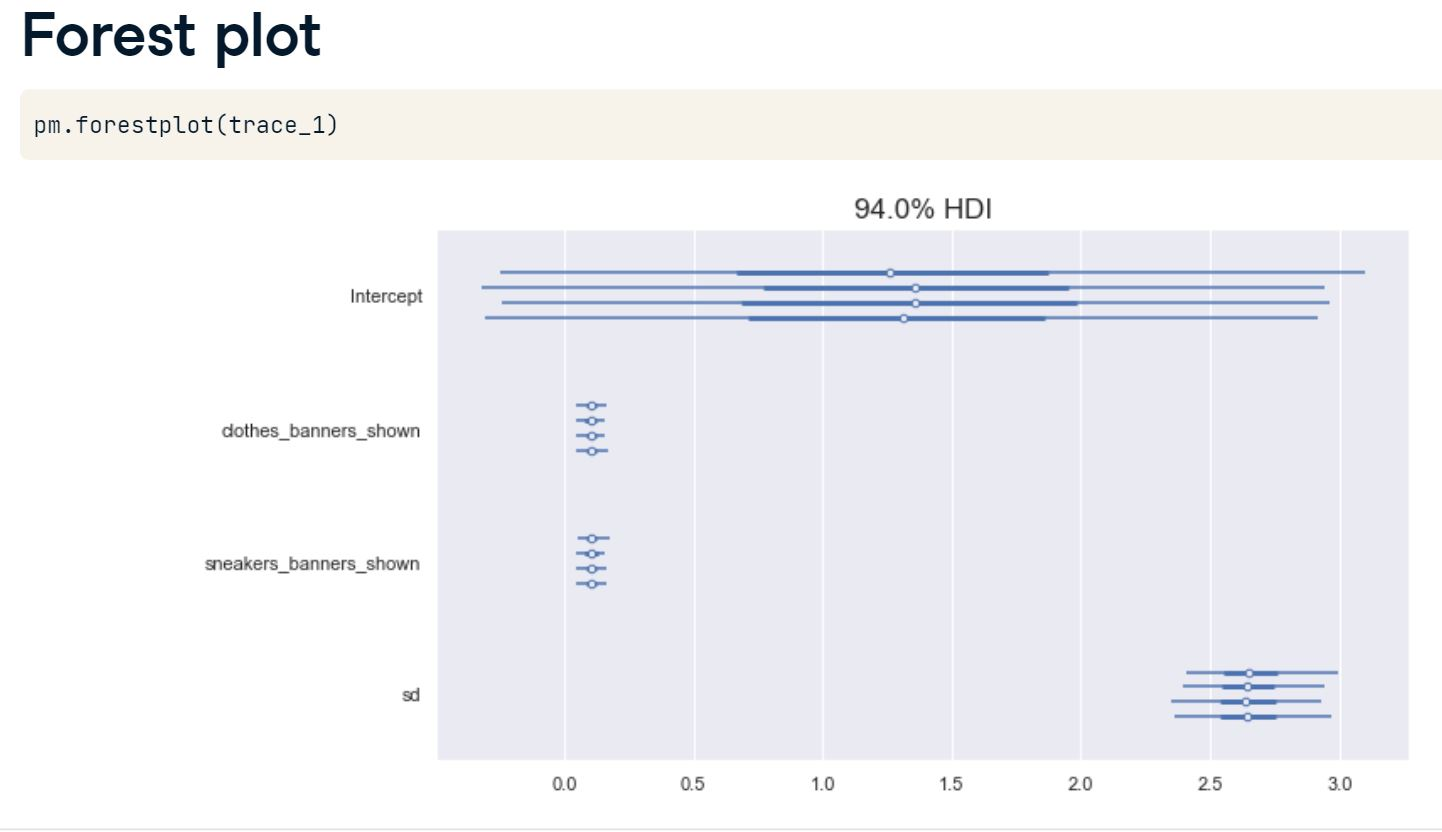

To calculate some summary statistics of the posterior draws, we can call `pm.summary()` with the trace object passed to it. It produces a table with a lot of valuable insights. 

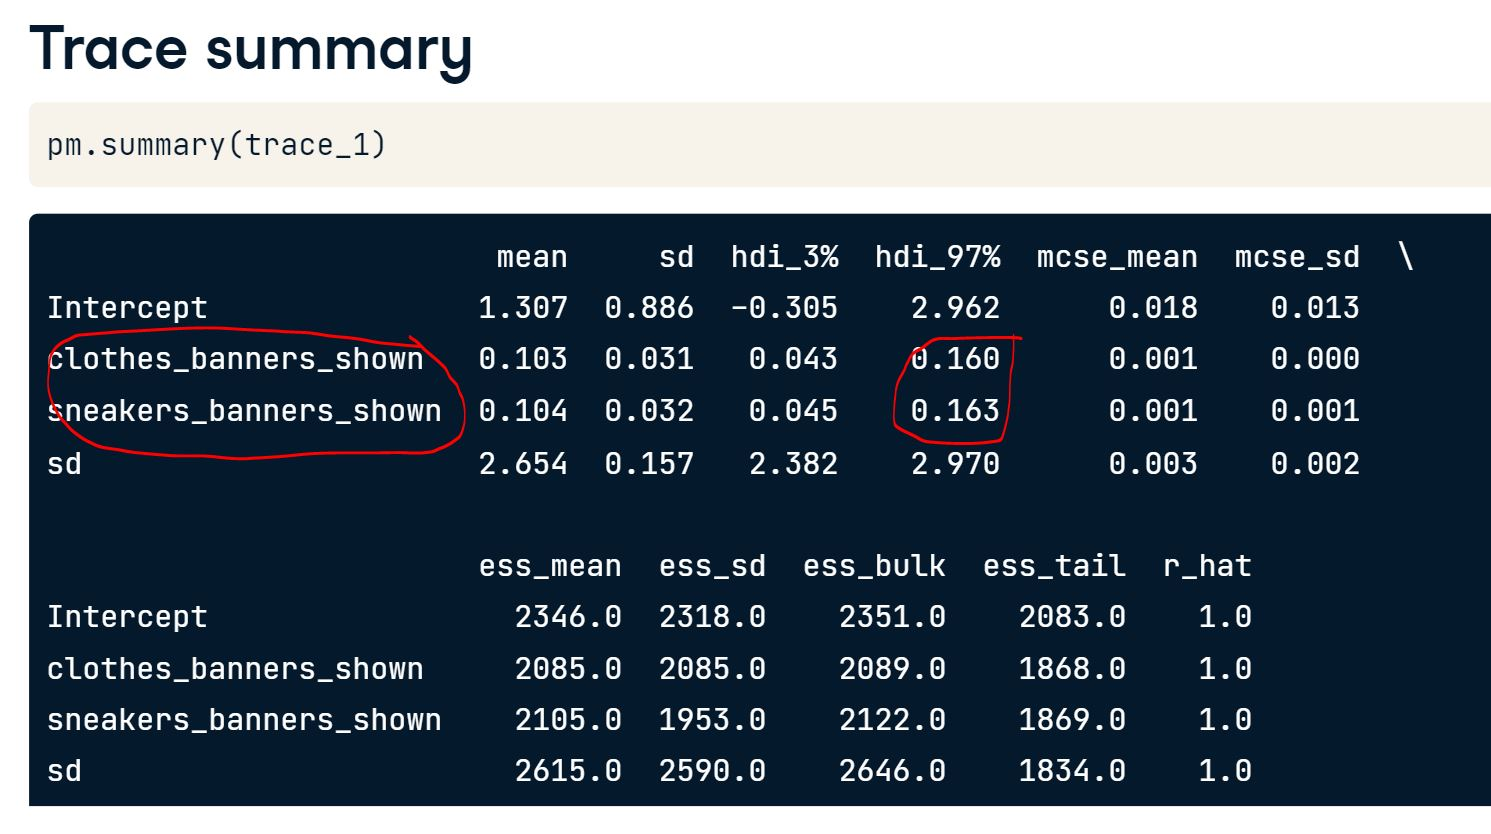

In the first two columns, we can see the mean and the standard deviation of the draws for each parameter. Next, we have the ends of the 97% credible interval. It seems that the impact of clothes and sneakers is very similar! Finally, take a look at the last column labelled `r_hat`. This number is only computed if we run more than one chain. Values of `r_hat` greater than one indicate that some chains have not converged. Here, we have ones top to bottom, so everything's fine.

`Model_2`

Now, consider another model, let's call it model_2. It's similar to the one before. The only difference is that we add one more explanatory variable: weekend, with a 1 denoting a weekend day, and zero otherwise.

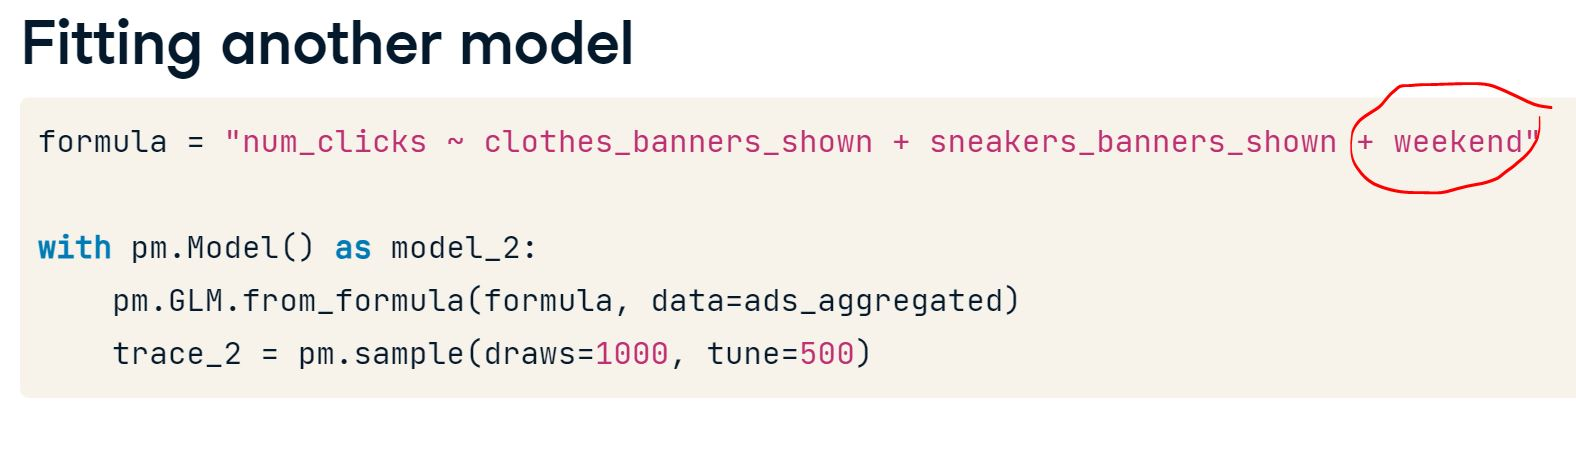

We can compare two models based on the `Widely Applicable Information Criterion`, or WAIC. WAIC is a measure of model fit. The lower it is, the better the model. 

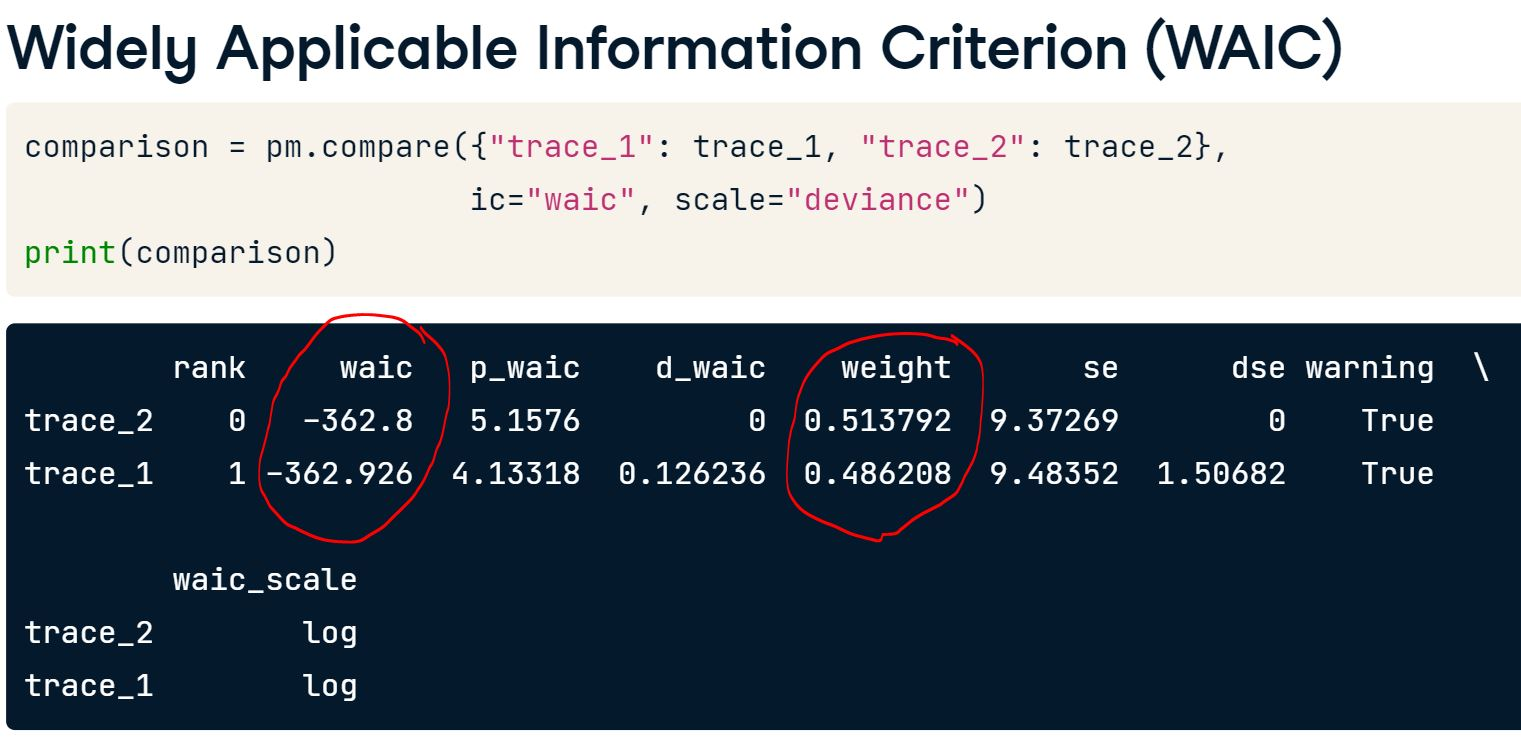


We can also plot the model comparison with `pm.compareplot()`. 

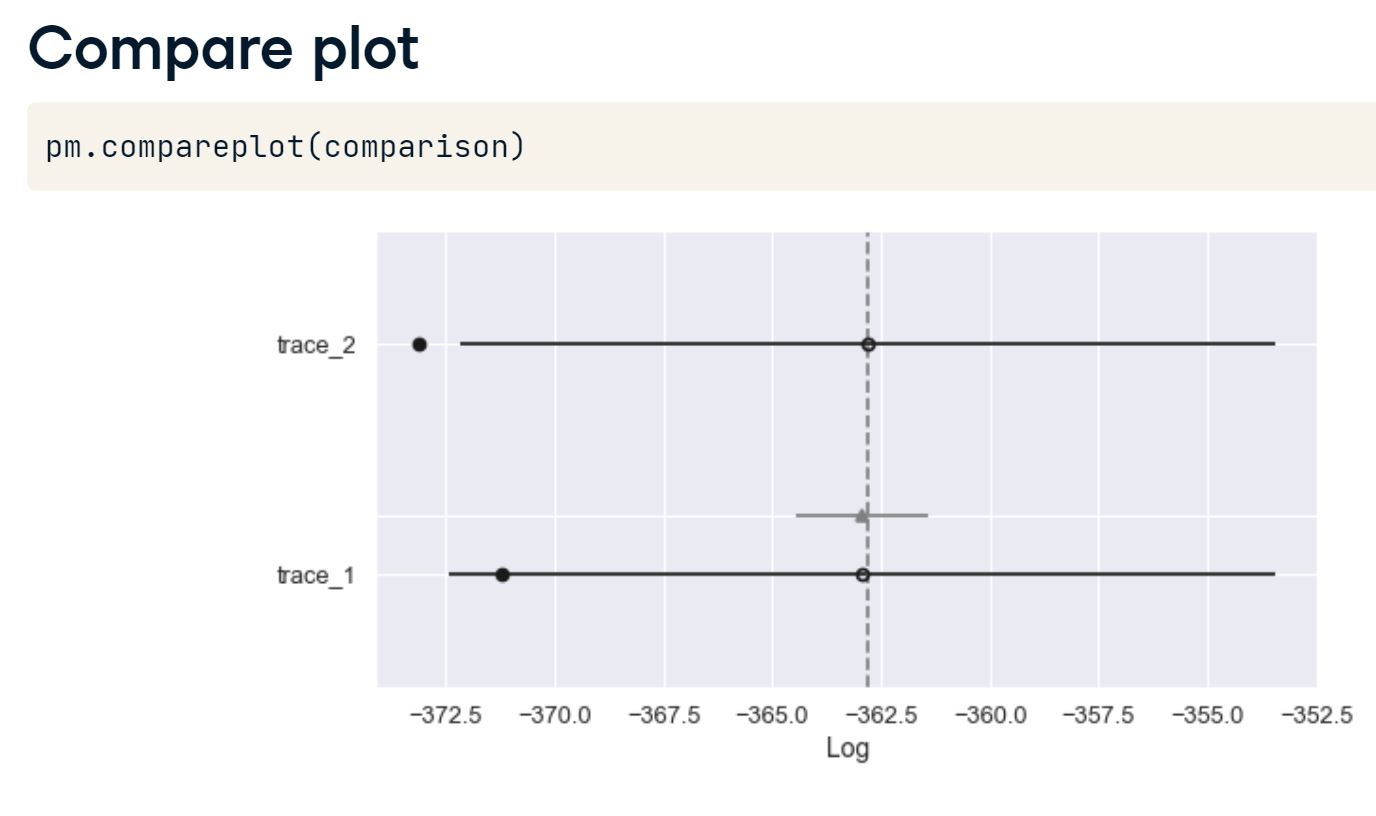

The empty circles show the WAIC values for each model and the black error bars associated with them show their standard deviations. For all but the top model, we also get a gray triangle indicating the difference in WAIC between that model and the top one. The standard deviation error bars show we are not that confident in the superiority of `model_2`.




#### 4.2.1 Inspecting posterior draws

Let's continue with our task of predicting the number of bikes rented per day in a bike-sharing system.

In [1]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()

# Draw a forest plot of trace_1
pm.forestplor(trace_1)
plt.show()

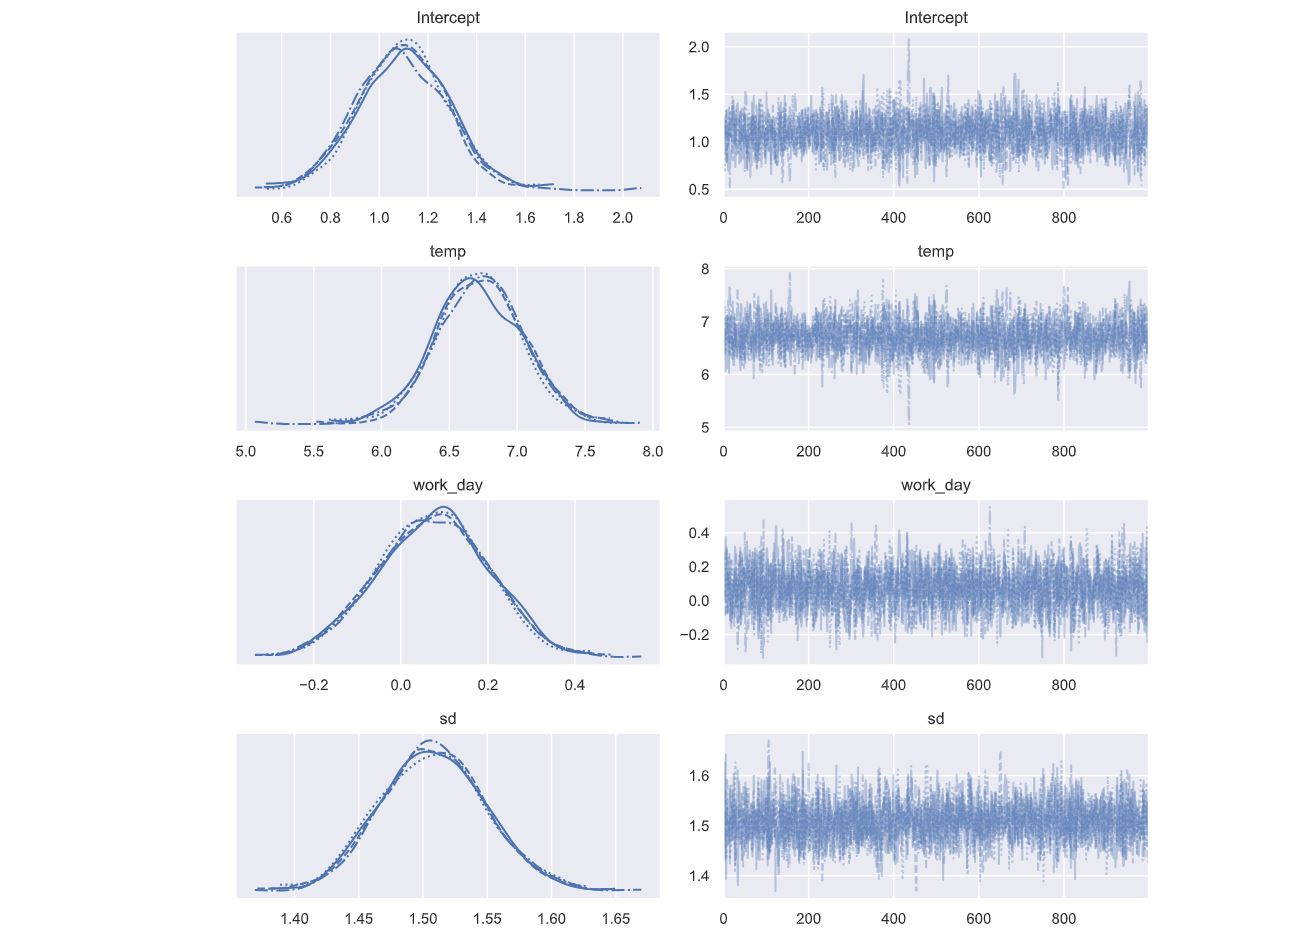

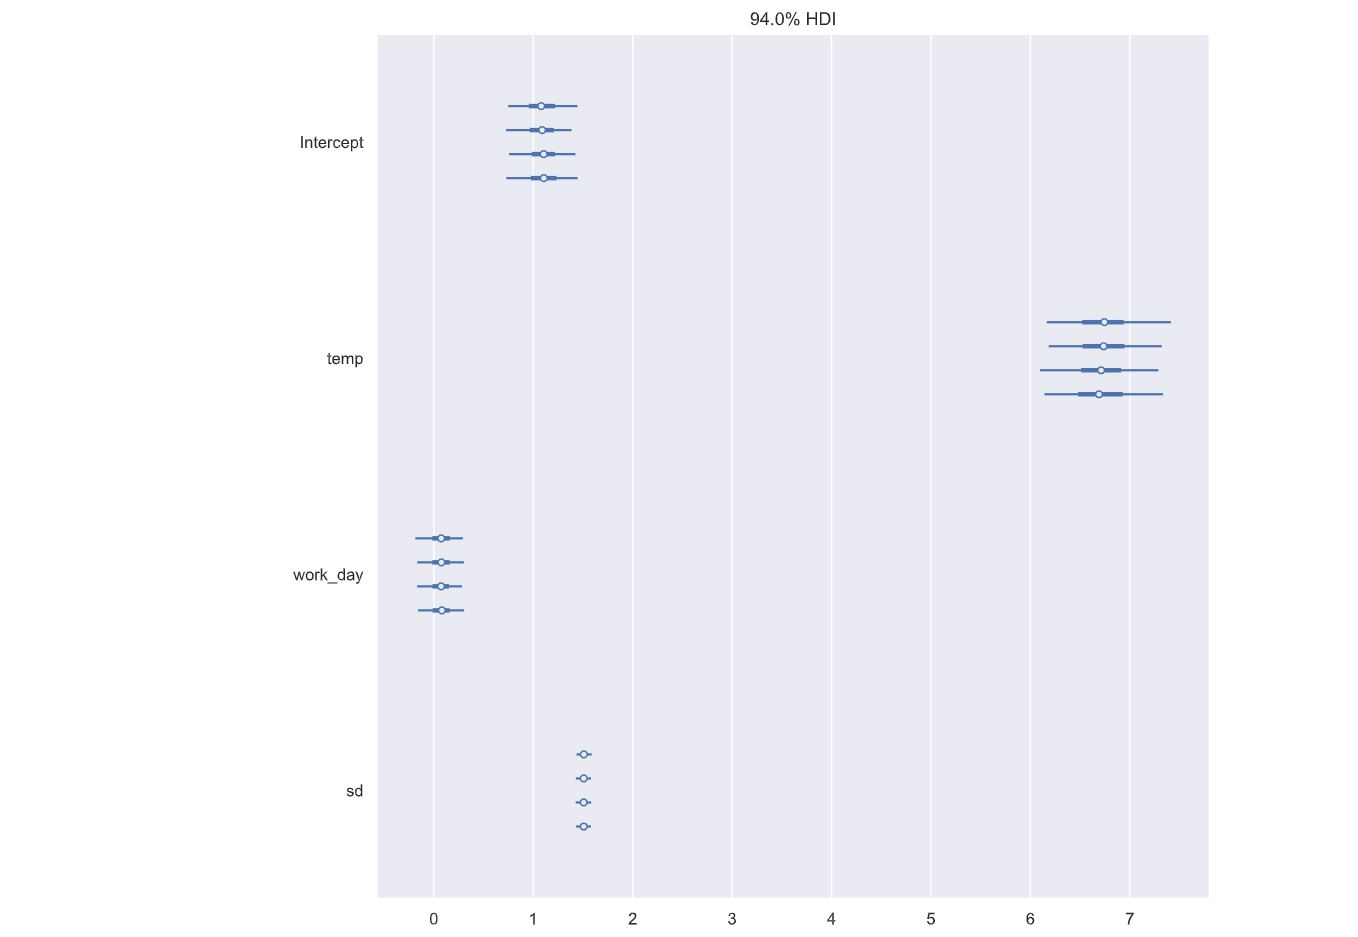

In [ ]:
pm.summary(trace_1)

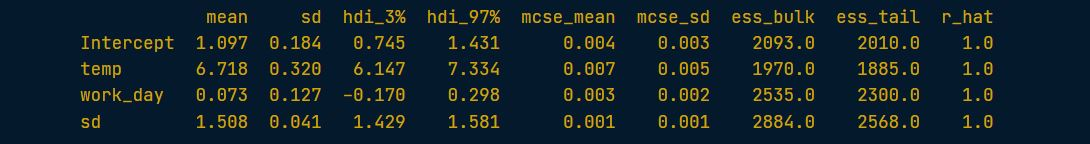

>**Given the 97% credible interval, we are not sure whether more bikes are rented in the working week than in the weekends.**

>**Judging by the trace plot, sampling for all parameters has converged successfully.**


#### 4.2.2 Comparing models with WAIC

Now that you have successfully built the first, basic model, you take another look at the data at your disposal. You notice a variable called wind_speed. This could be a great predictor of the numbers of bikes rented! Cycling against the wind is not that much fun, is it?

You fit another model with this additional predictor:

    formula = "num_bikes ~ temp + work_day + wind_speed"
fas
    with pm.Model() as model_2:
        pm.GLM.from_formula(formula, data=bikes)
        trace_2 = pm.sample(draws=1000, tune=500)

In [ ]:
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {"trace_1": trace_1, "trace_2": trace_2}

In [ ]:
# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic="waic")

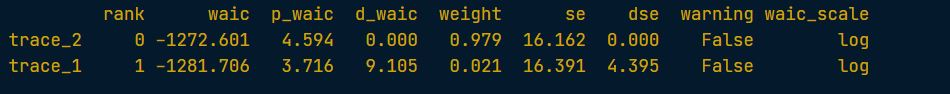

In [ ]:
# Draw a comparison plot
pm.compareplot(comparison, textsize=20)
plt.show()

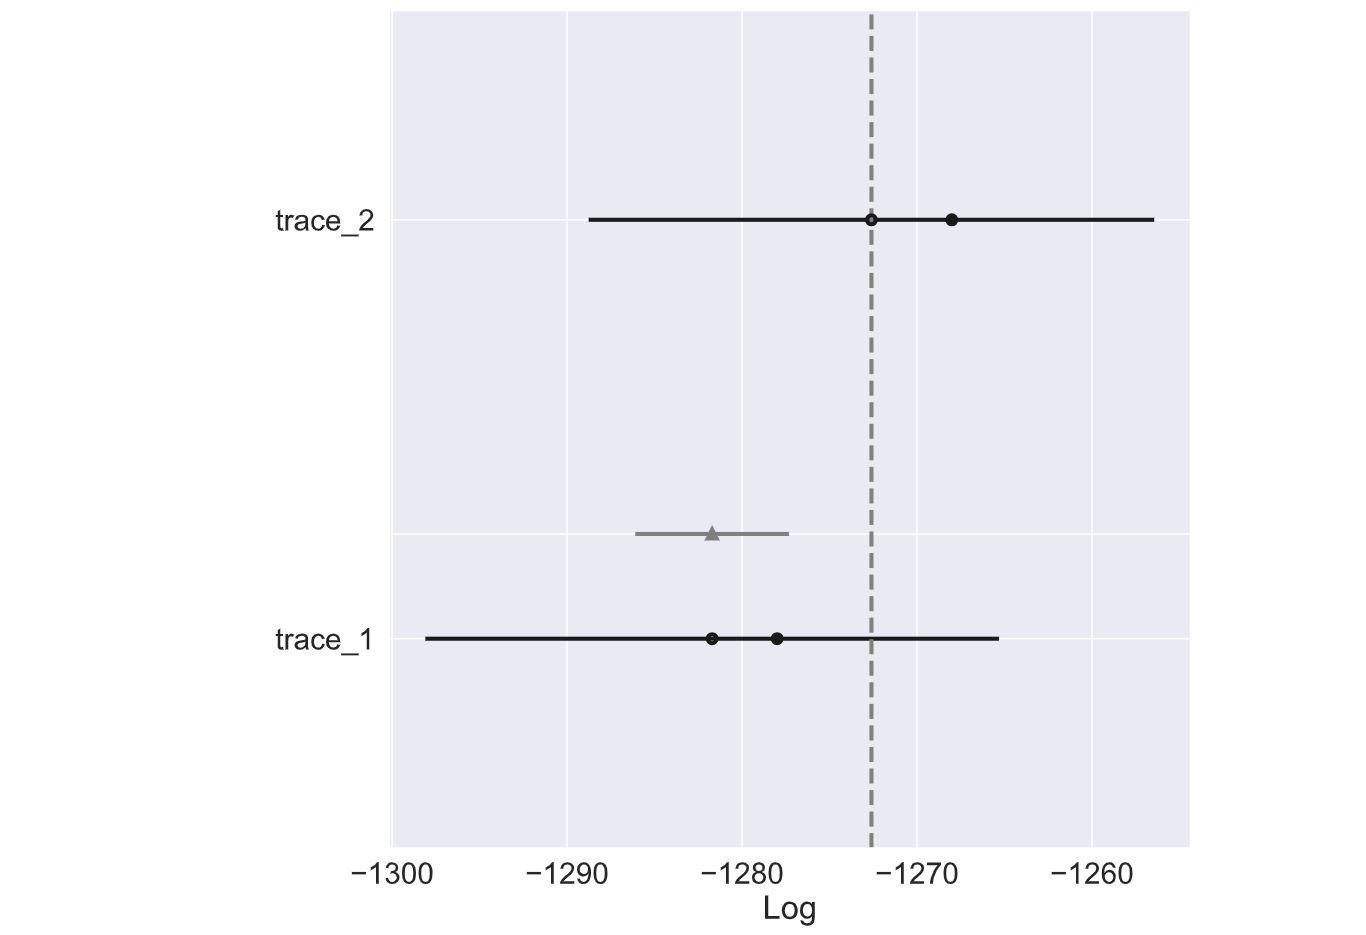

Based on the output, and on the comparison plot you have just drawn:

>**Based only on the WAIC value, model_2 fits the data better than model_1.**

>**The difference in WAIC between the two models, plus/minus one standard deviation, indicates that model_2's WAIC is indeed larger then model_1's.**

### 4.3 Making predictions

Having inspected the posterior draws and verified the model was fitted successfully, we can use the model to make predictions for new data.

Now we have some new data in a variable named `ads_test`: five new observations which were not in the data we used to fit the model. For each of these new observations, we know the true number of clicks, so we can compare it with the model's predictions to see how accurate they are.

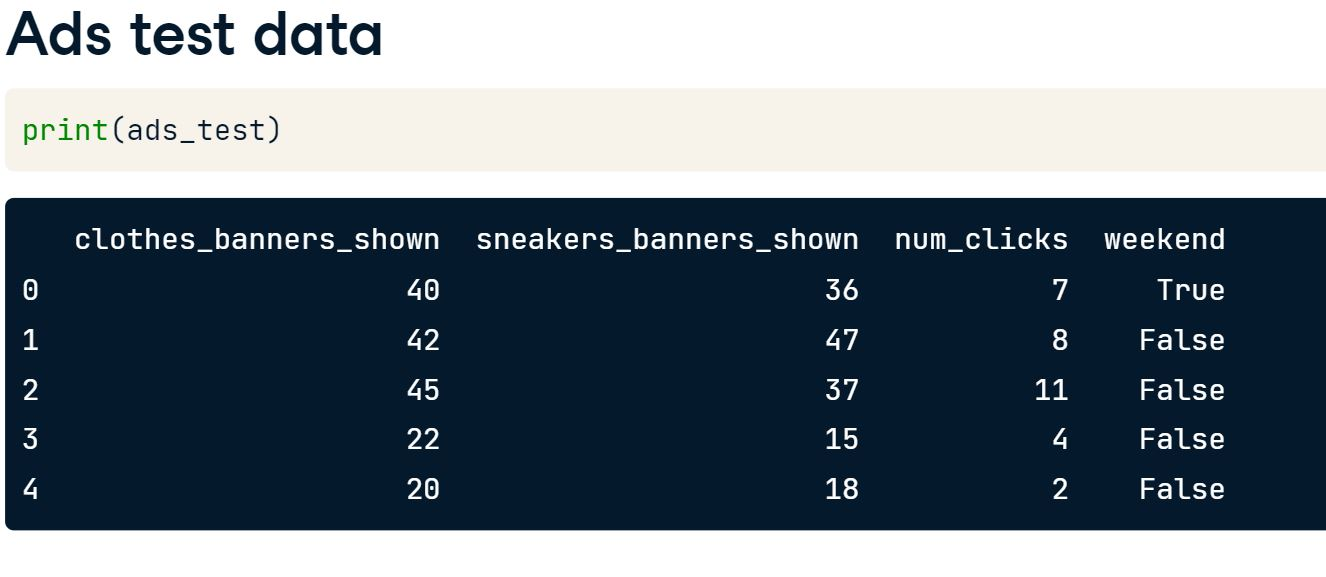


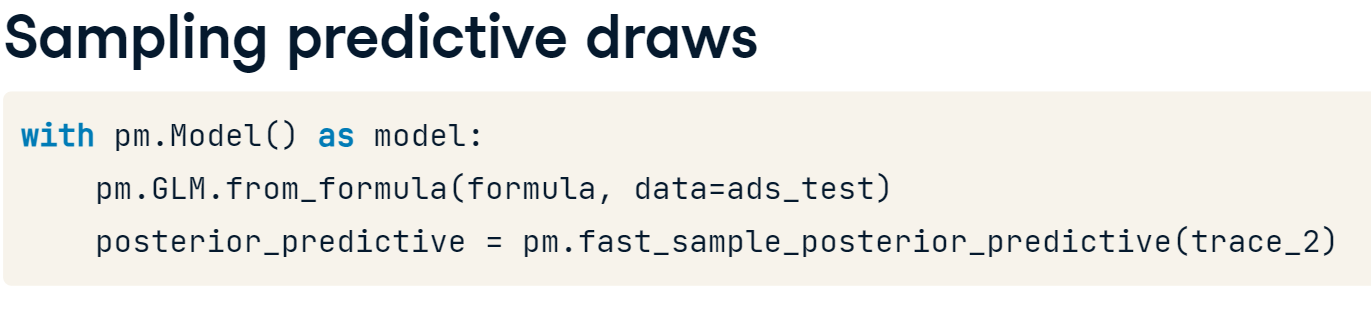

By calling `pm.fast_sample_posterior_predictive` on the trace generated by our model, the `posterior_predictive` variable now holds the predictive distributions for our test data. Let's take a look inside.

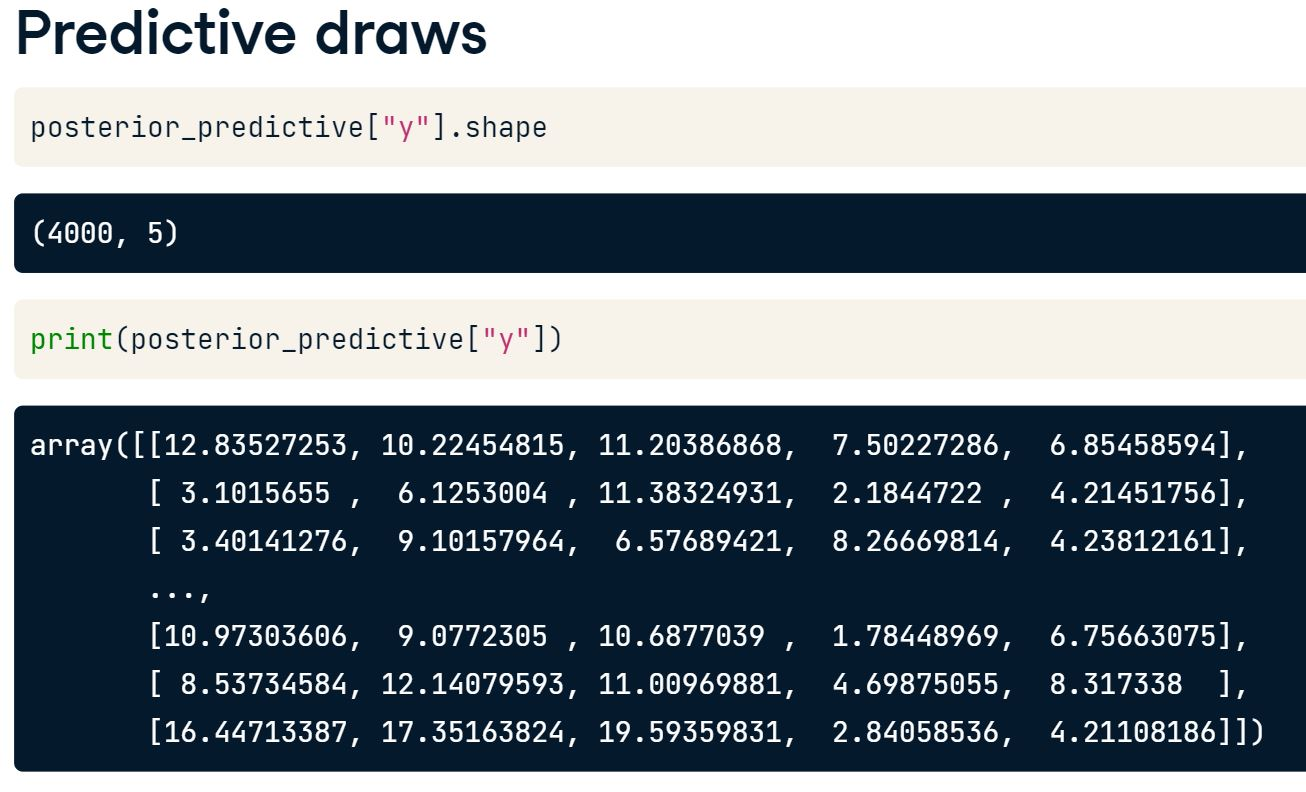

The five columns correspond to the five observations in our test data for which the predictions have been generated. In each column, that is: for each test observation, there are 4000 predictive draws, which corresponds to the settings we chose when fitting the model: 1000 draws and 4 chains.


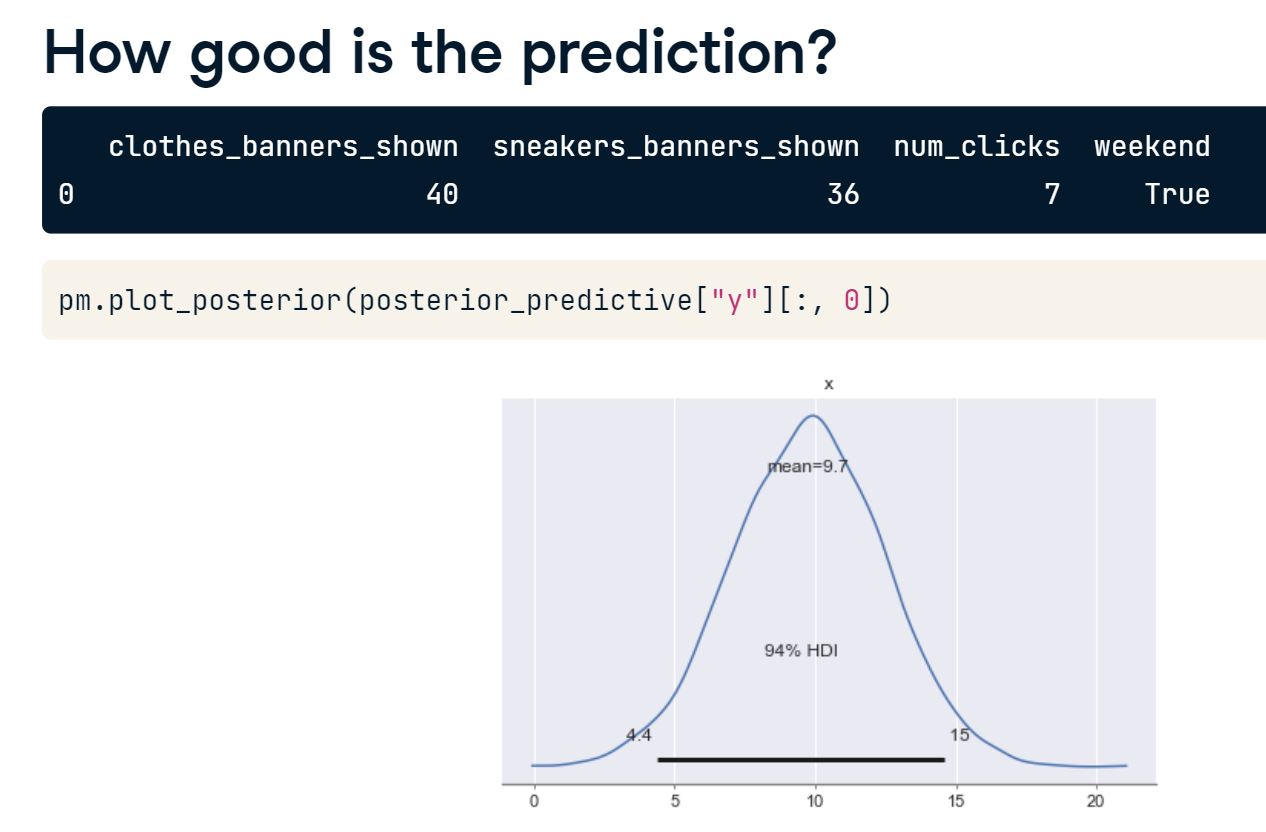

It would be much more useful to estimate the model's error in general, based on many test examples. 

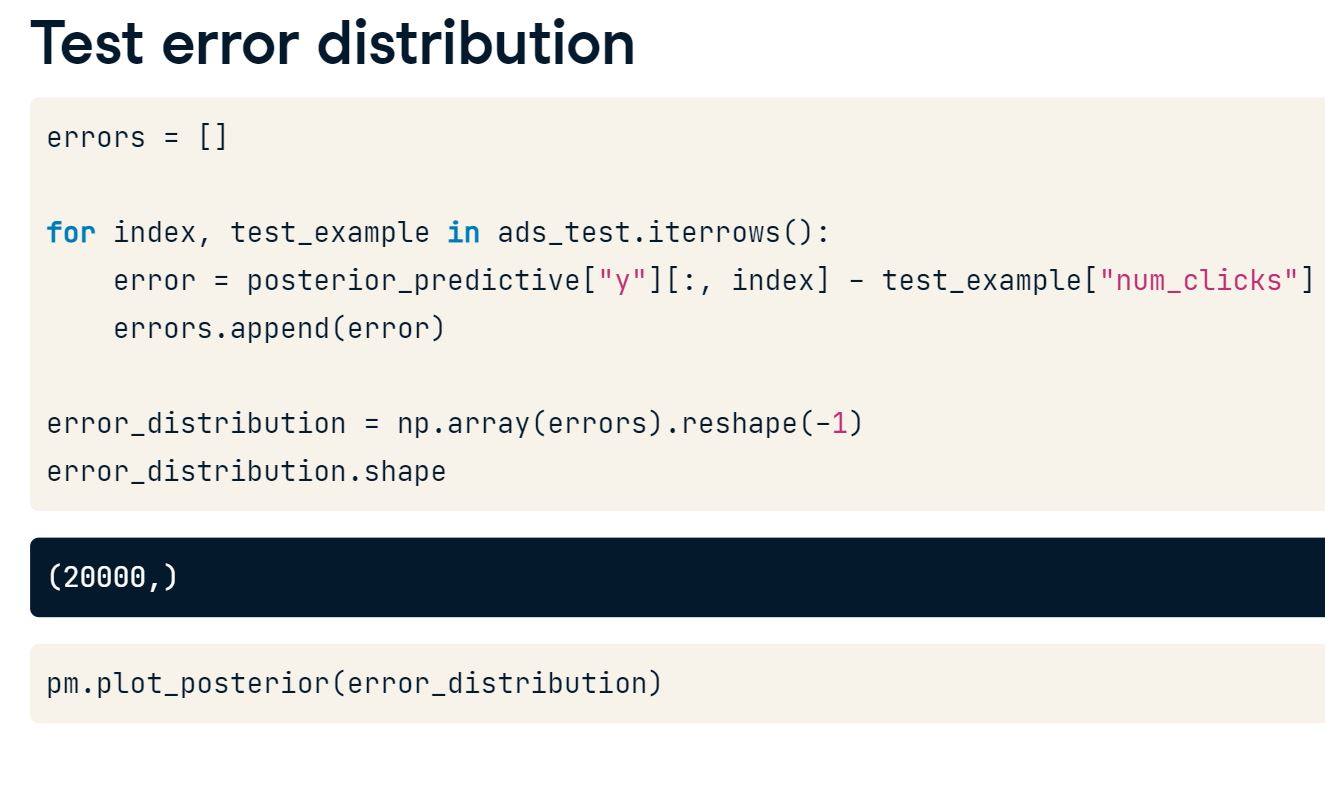

Let's visualise the error distribution :

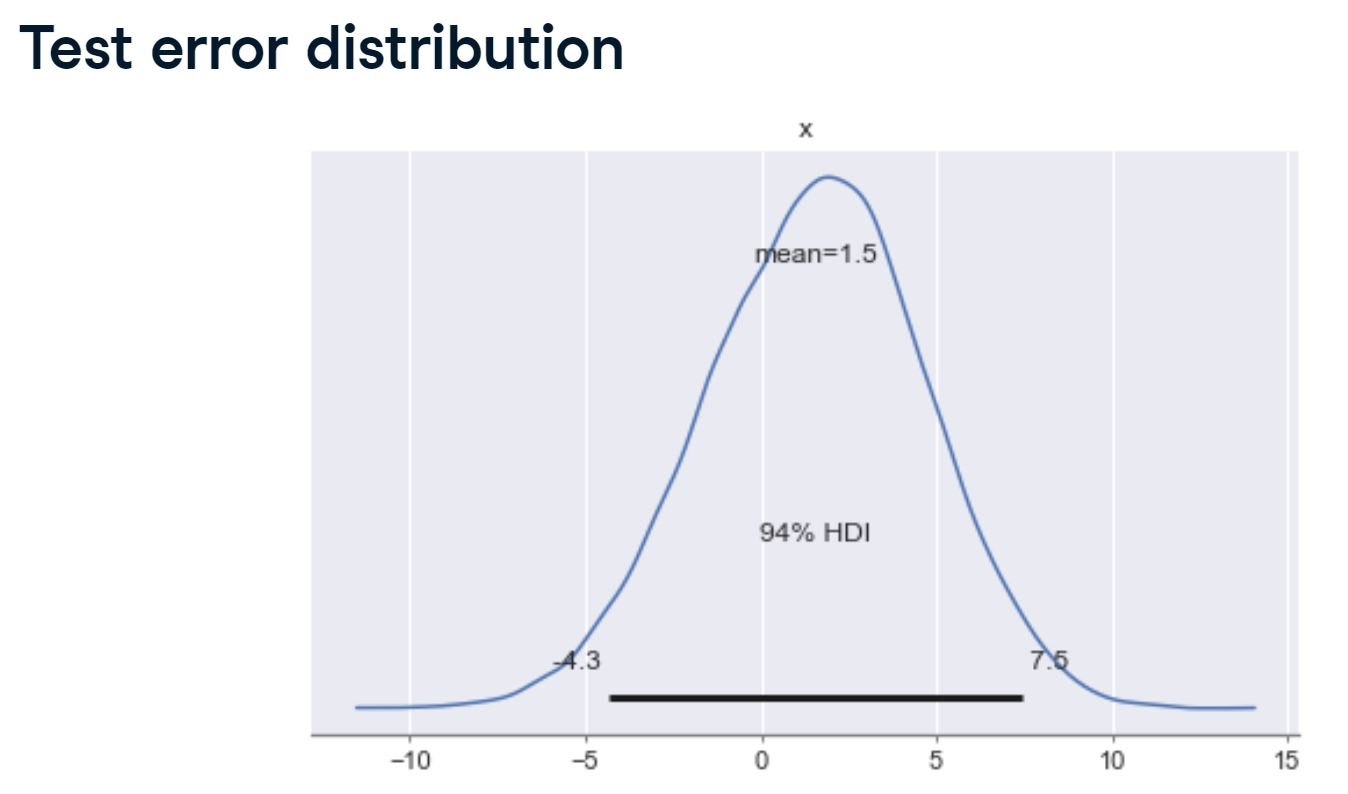

On average, our predictions are off by one point five clicks and we are more likely to predict too many than too few.

#### 4.3.1 Sample from predictive density

A couple of new observations, not seen by the model, have been collected in a DataFrame named bikes_test. For each of them, we know the true number of bikes rented, which will allow us to evaluate model performance. In this exercise, you will get familiar with the test data and generate predictive draws for every test observation.

In [2]:
import pandas as pd

In [3]:
bikes_test = pd.read_csv('data/bikes_test.csv')
bikes_test.head()

work_day      temp  humidity  wind_speed  num_bikes
0         0  0.265833  0.687917    0.175996      2.947
1         1  0.282609  0.622174    0.153800      3.784
2         1  0.354167  0.496250    0.147379      4.375
3         1  0.256667  0.722917    0.133721      2.802
4         1  0.265000  0.562083    0.194037      3.830

In [4]:
# Define the formula to predict num_bikes using temp, work_day and wind_speed as predictors
formula = "num_bikes ~ temp + work_day + wind_speed"

In [7]:
import bambi as bmb
import pymc as pm

In [ ]:
# define the model
model = bmb.Model("num_bikes ~ temp + work_day + wind_speed", data=bikes_test) # GLM stands for generalized linear model
model.fit()

In [ ]:
# Generate predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=bikes_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)

In [ ]:
# Initialize errors
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_test.iterrows():
    error = posterior_predictive["y"][:, index] - test_example["num_bikes"]
    errors.append(error)

# Reshape errors
error_distribution = np.array(errors).reshape(-1)

# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

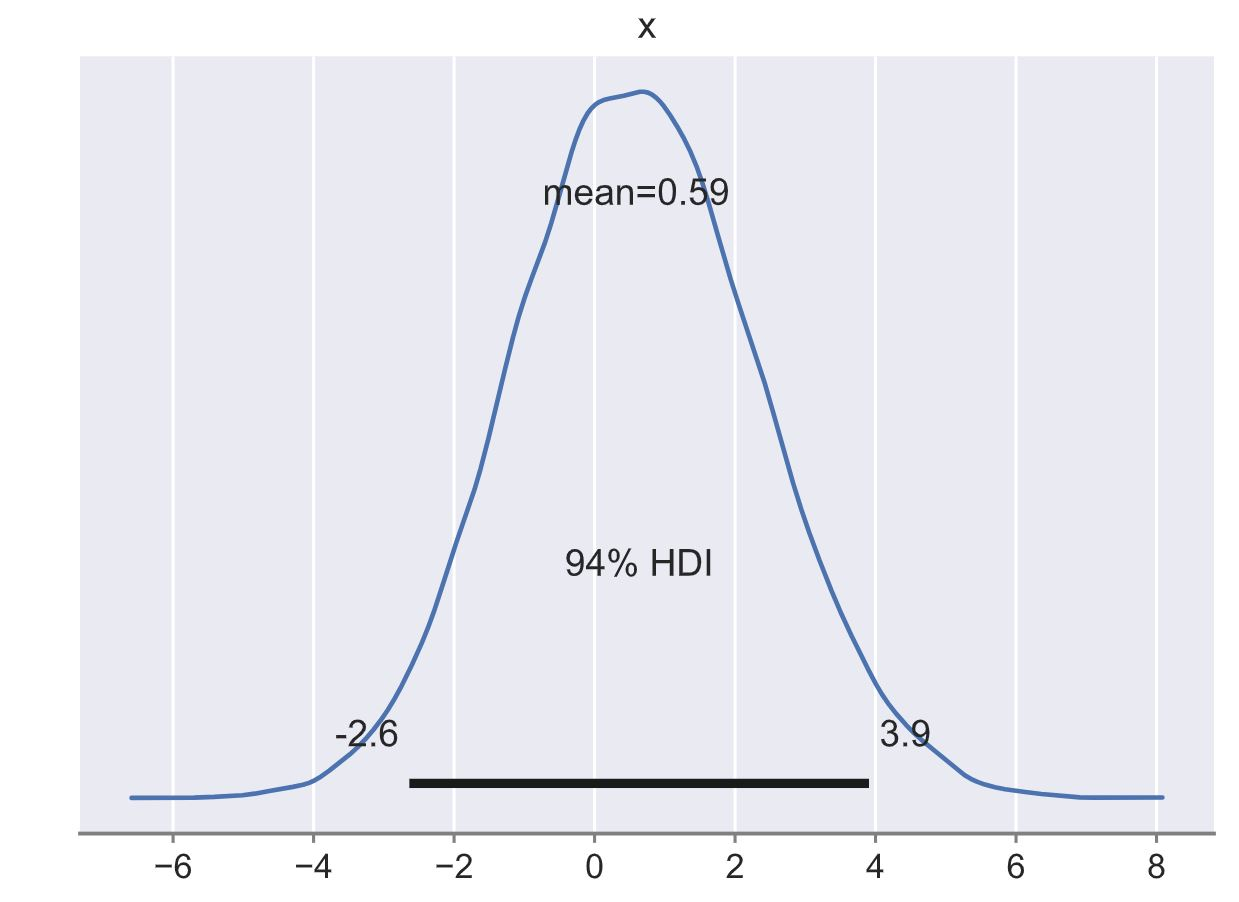

In practice, you might want to compute the error estimate based on more than just 10 observations, but you can already see some patterns. For example, the error is more often positive than negative, which means that the model tends to overpredict the number of bikes rented.

### 4.4 How much is an avocado ?

Our job will be to estimate the price elasticity for avocados and based on the outcome, propose the optimal price. `Price elasticity` is the impact of a price change on the sales volume. It can be estimated with a linear regression model, and this will be our starting point. 

Next, we will verify the model's correctness, and use it to predict sales volumes for different prices. Finally, we will propose the profit-maximizing price and the associated uncertainty.

The company has prepared some data for you. It includes the avocado price per piece, the volume sold for this price (in tens of thousands), and an indicator for whether the particular fruit was organic.

If we don't specify priors, our model will just use default values, however we should specify priors where possible and to do do we just create a dictionary, let's call it priors, with the variable name (wind_speed) as key, and the desired prior distribution as value. Here, we use `pm.Normal.dist`, with the mu parameter, that is the mean, set to -5. Then, we simply pass this dictionary to the priors argument in `from_formula`.

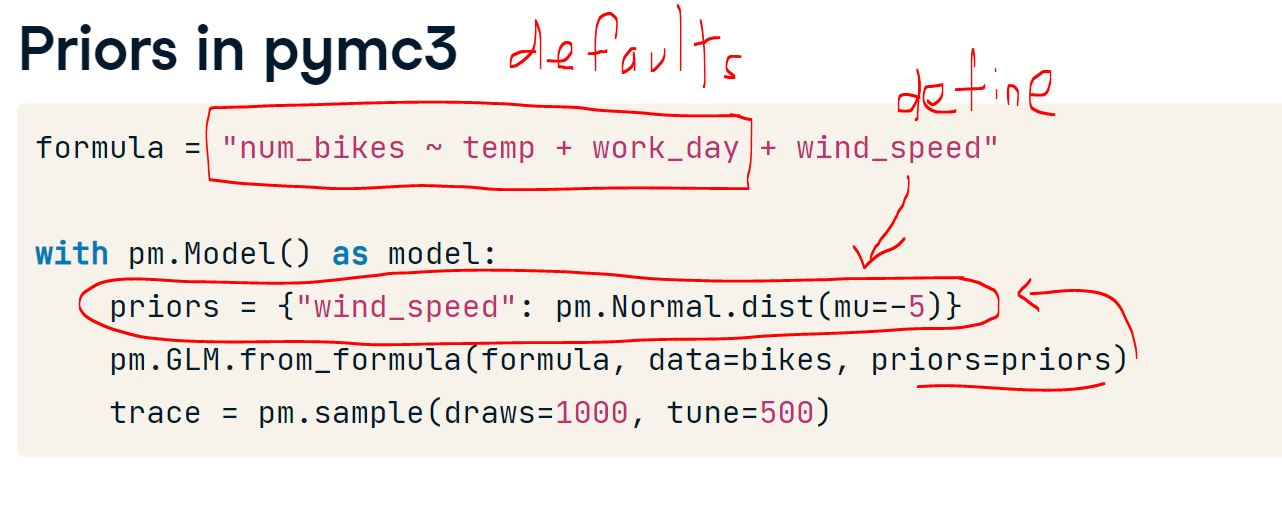

To extract posterior draws from the trace we just call the `get_values()` method on trace with the variable name passed as the argument. This results in a numpy array with posterior draws from all chains combined.

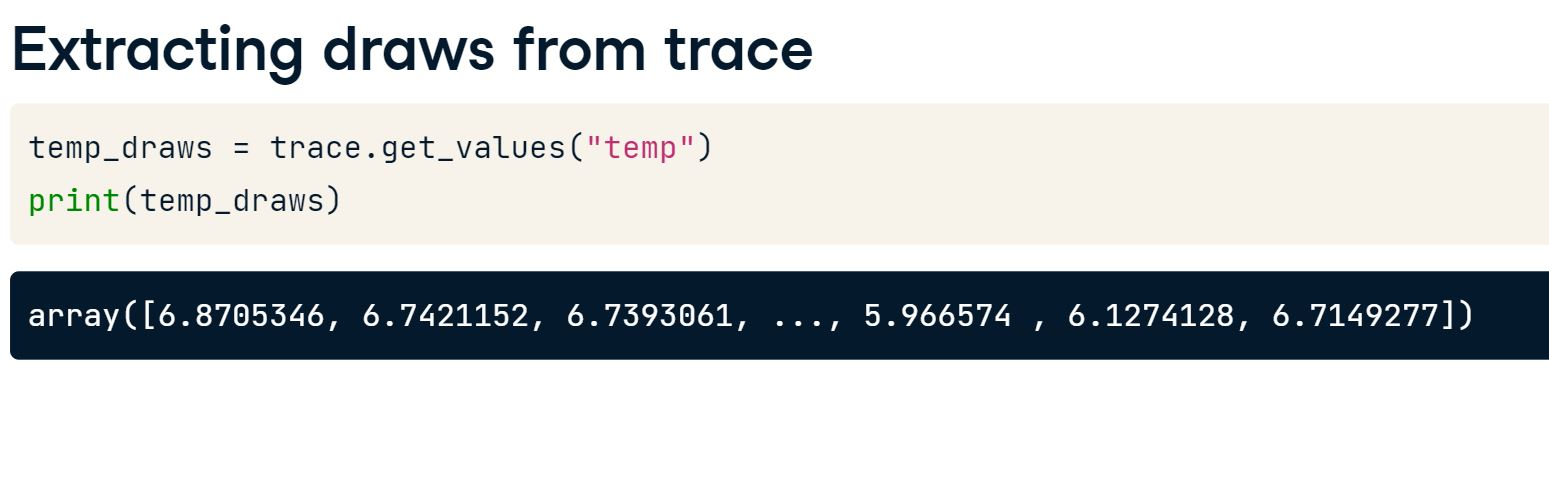


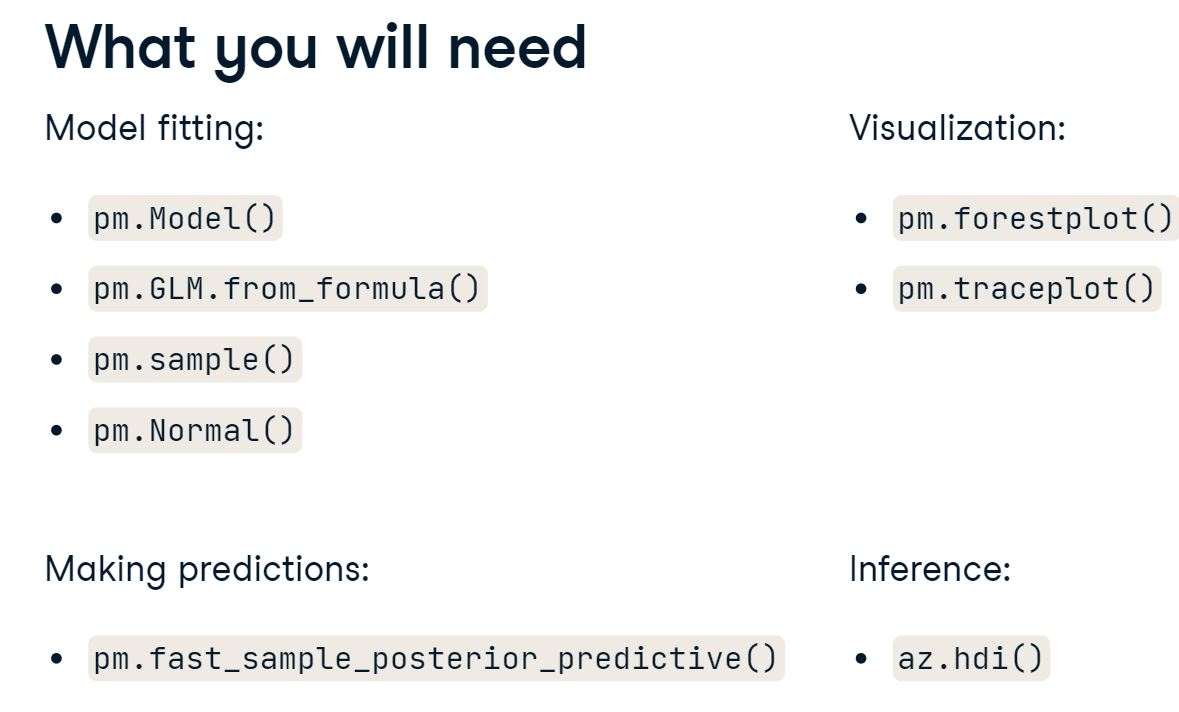



### 4.1 Fitting the model

In [12]:
avocados = pd.read_csv('data/avocado.csv')
avocados

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

You can use a linear regression model to estimate the avocado price elasticity. The regression formula should be:

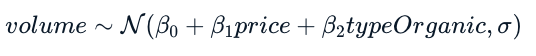





Let's build our model. We will create a prior for the avocado price which we estimate to have a normal didtribution with a mean price of -80. The higher the price, the lower the sales, that's the case for most goods :

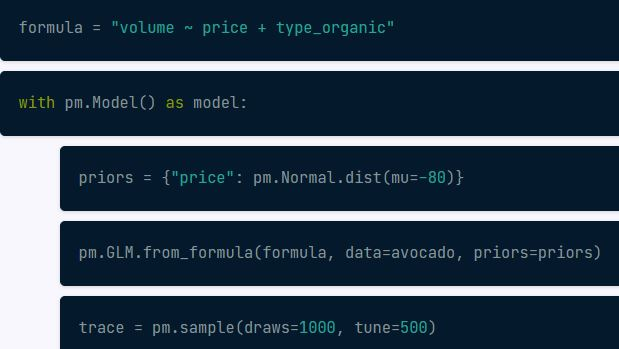

### 4.2 Inspecting the model

In [ ]:
# Draw a trace plot of trace
pm.traceplot(trace)
plt.show()

# Print a summary of trace
summary = pm.summary(trace)
print(summary)

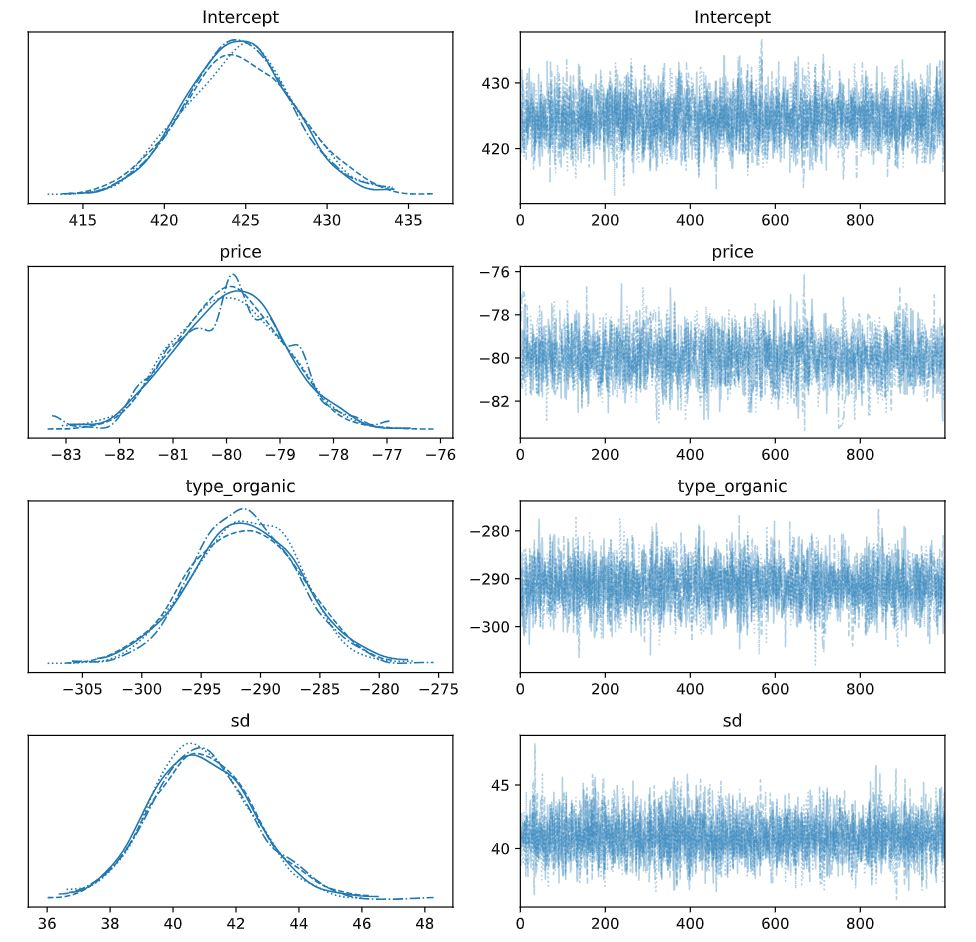

Look at the left part of the trace plot for `price`: the density of one of the chains is slightly wobbly, which might indicate some Monte Carlo Markov Chain (MCMC) convergence issues. Luckily, it's only one chain and its density is still quite close to the densities of other chains. So, all in all, we don't need to worry about it and we can safely use the model to optimize the price.

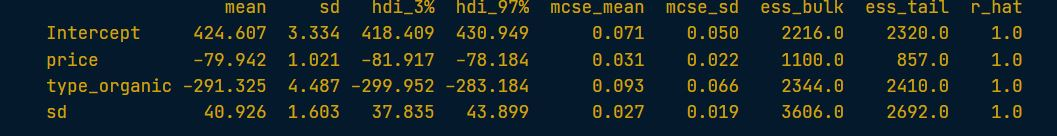

In [ ]:
# Get each parameter's posterior mean
intercept_mean = np.mean(trace.get_values('Intercept')) 

In [ ]:
organic_mean = np.mean(trace.get_values('type_organic')) 

In [ ]:
price_mean = np.mean(trace.get_values('price'))

In [ ]:
sd_mean = np.mean(trace.get_values('sd')) 

### 4.3 Optimizing the price

# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = intercept_mean - (80 * price_mean) + (price * organic_mean) # this is our linear models mean values
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = volume_pred * pred_mean
    predicted_profit_per_price.update({price: profit_pred})We have been asked to provide the avocado price that would yield the largest profit, and state what profit can be expected. Also, the price should be divisible by 0.25 so that the customers can easily pay with quarters.

Let's use our model to predict the volume and the profit for a couple of sensible prices. Next, we will visualize the predictive distributions to pick the optimal price. Finally, we will compute the credible interval for our profit prediction.

In [ ]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = (intercept_mean + price_mean * price + organic_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = price * volume_pred
    predicted_profit_per_price.update({price: profit_pred})

In [ ]:
# Draw a forest plot of predicted profit for all prices
pm.forestplot(predicted_profit_per_price)
plt.show()

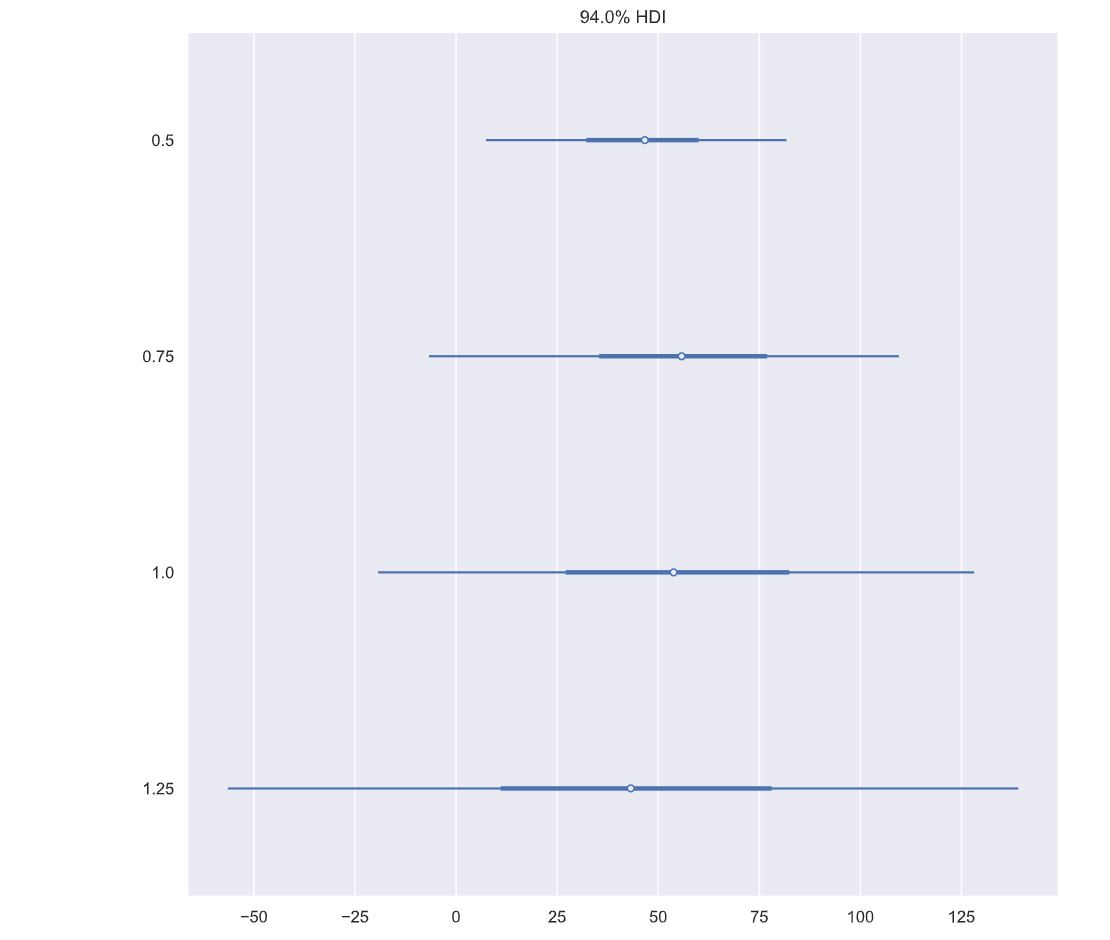

Based on the above plot the optimal price is 0.75 as this has the highest predicted mean profit. The `predicted_profit_per_price` dictionary holds the `price:profit_pred` key:value pairs, so we can pass in our optimal price 0.75 to `az.hdi` along with a confidence interval :

In [ ]:
# Calculate and print HPD of predicted profit for the optimal price
opt_hpd = az.hdi(predicted_profit_per_price[0.75],credible_interval=0.99)
print(opt_hpd)

>**With a higher or lower price, our company would lose profit, but thanks to our modeling skills, they were able to set the best possible price. Furthermore, knowing the uncertainty in the profit prediction, they can prepare for the worst-case scenario (in which the profit is negative).**